# PROYECTO INTEGRADOR 4 - MARÍA DE LOS ÁNGELES PÁEZ

## AVANCE 1

IMPORTAR LAS LIBRERÍAS NECESARIAS

In [ ]:
import numpy as np
import pandas as pd

LEER EL ARCHIVO CSV Y MOSTRAR LAS PRIMERAS FILAS PARA CORROBORAR QUE SE CARGÓ CORRECTAMENTE

Por una cuestión de memoria, debí trabajar y realizar la limpieza de datos en google colab.
en vsc sería de la siguiente manera:

**Leer el archivo CSV:*

  df = pd.read_csv('data_latinoamerica.csv')

**Muestra las primeras filas para verificar que se cargó correctamente:*

  print(df.head())

In [ ]:
# establezco la conexion entre el notebook y google drive ('monta' google drive en el entorno de colab)

from google.colab import drive

drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
# defino la ruta al archivo que quiero leer de Google Drive
file_path = '/content/drive/My Drive/Proyecto_Integrador_4/data_latinoamerica.csv'

#establezco el numero de filas que se leeran en cada fragmento
chunk_size = 100000

# Utilizo la funcion pd.read de pandas para leer el archivo en fragmentos de 100.000 filas cada uno
df_chunks = pd.read_csv(file_path, chunksize=chunk_size)
# El resultado es un objeto iterador 'df_chunks' donde cada elemento es un DataFrame que contiene un fragmento del archivo original.


# Combino todos los fragmentos en un solo DataFrame
data = pd.concat(df_chunks)

# Verifico el DataFrame combinado
print(data.head())

  location_key        date country_code country_name  new_confirmed  \
0           AR  2020-01-01           AR    Argentina            3.0   
1           AR  2020-01-02           AR    Argentina           14.0   
2           AR  2020-01-03           AR    Argentina            3.0   
3           AR  2020-01-04           AR    Argentina            7.0   
4           AR  2020-01-05           AR    Argentina            5.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           0.0                   3.0                  0.0   
1           0.0                  17.0                  0.0   
2           0.0                  20.0                  0.0   
3           0.0                  27.0                  0.0   
4           0.0                  32.0                  0.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                    NaN  44938712.0  ...   
1                                    NaN  44938712.0  ...   
2                

In [ ]:
# Corroboro que el archivo contiene la cantidad de columnas y registros que establecía la consigna para verificar que se cargó correctamente.

data.shape

(12216057, 50)

Selecciono y filtro los paises que serán objeto de la expansión estratégica de Biogénesys.
Este filtrado inicial se realizó para asegurar que los datos seleccionados correspondieran únicamente a los países de interés (Argentina, Colombia, Chile, Perú, México y Brasil)

In [ ]:
# creo una lista con los nombres de los paises que quiero seleccionar
paises_seleccionados = ['Colombia', 'Argentina', 'Chile', 'Mexico', 'Peru', 'Brazil']

# crea una serie booleana del mismo tamaño que el dataframe. para cada fila, si el pais seleccionado esta presente= true. si no fasle.
# filtra el df para crear uno nuevo solo con los paises que se encuentran presentes en la lista que establecí y en la columna de paises del ddf original
data_latinoamerica = data [data ['country_name'].isin (paises_seleccionados)]

Como parte de la limpieza premilinar de datos, tomamos el DF y solicitamos que devuelva una serie que contenga las columnas donde hay más de 4,000,000 valores nulos junto con el conteo de estos valores nulos para cada columna. Esto nos  permite identificar rápidamente cuáles son las columnas con muchos datos faltantes, para luego tomar decisiones sobre cómo manejarlas (por ejemplo, eliminarlas columnas o imputar los valores faltantes).

In [ ]:
# identificamos las columnas que tienen una cantidad significativa de valores faltantes (NaNs)
data_latinoamerica.isnull().sum() [data_latinoamerica.isnull().sum()>4000000]
# data_latinoamerica.isnull: verifica si hay nulos en df
# .sum(): suma los valores nulos por columna
# [data_latinoamerica.isnull().sum()>4000000]: selecciona solo las columnas cuya cantidad de valores nulos sea superior a 4.000.000

new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
gdp_usd                                  11963352
gdp_per_capita_usd                       11962361
smoking_prevalence                       11964343
diabetes_prevalence                      11964343
infant_mortality_rate                    11964343
nurses_per_1000                          11964343
physicians_per_1000                      11964343
population_largest_city                  11964343
area_rural_sq_km                         11964343
area_urban_sq_km                         11964343
life_expectancy                          11964343
adult_male_mortality_rate                11964343
adult_female_mortality_rate              11964343
pollution_mortality_rate                 11964343
comorbidity_mortality_rate               11964343
new_recovered                             9873535
cumulative_recovered                      9874368
dtype: int64

Se realiza un segundo filtrado, que podría también haber sido por la columna "country_code". Al ser un identificador único nos ayuda a detectar y corregir posibles errores de ingreso de datos o inconsistencias que podrían no ser evidentes al filtrar solo por country_name. Este doble filtrado nos permite tener un control más riguroso sobre la calidad del conjunto de datos.

In [ ]:
# creo otro df para almacenar el resultado del filtrado. Compara cada valor de la columna 'location_key' con la lista de códigos de países proporcionados.
# crea una mascara boleana: true si coincide con el codigo que le di, false si no coincide.
# crea el df solo con los true
data_latinoamerica_paises = data_latinoamerica [data_latinoamerica ['location_key'].isin (['AR', 'CL', 'CO', 'MX', 'PE', 'BR'])]

Constatamos las nuevas dimensiones del DF

In [ ]:
data_latinoamerica_paises.shape

(5946, 50)

Filtramos a partir del 01/01/2021, tal como indica la consigna

In [ ]:
# creo un nuevo df para almacenar el resultado del filtrado. tomo el df creado anteriormente para filtrar por fecha posterior al 01/01/2021
data_latinoamerica_paises_fecha = data_latinoamerica_paises [data_latinoamerica_paises ['date']> '2021-01-01']

Volvemos a constatar las dimensiones del DF, luego del filtrado por fecha

In [ ]:
data_latinoamerica_paises_fecha.shape
# resultado : (3744, 50)

(3744, 50)

Guardamos el archivo filtrado

In [ ]:

# guardo el archivo para trabajarlo localmente
# output_path = '/content/drive/My Drive/Proyecto_Integrador_4/data_latinoamerica_filtrada.csv'

# Guardar el DataFrame filtrado como un nuevo archivo CSV
# data_latinoamerica_paises_fecha.to_csv(output_path, index=False)

# print(f"Archivo guardado en: {output_path}")


Ahora, DATA = ARCHIVO FILTRADO

In [ ]:
#en vsc lo leeria asiç:
# data_latinoamerica_filtrada = pd.read_csv('data_latinoamerica_filtrada.csv')


# establezco la ruta al archivo en Google Drive
file_path = '/content/drive/My Drive/Proyecto_Integrador_4/data_latinoamerica_filtrada.csv'

# leo el archivo CSV en un DataFrame
data_latinoamerica_filtrada = pd.read_csv(file_path)

# verifico si se cargo correctamente
print(data_latinoamerica_filtrada.head())



  location_key        date country_code country_name  new_confirmed  \
0           AR  2021-01-02           AR    Argentina         7767.0   
1           AR  2021-01-03           AR    Argentina         4934.0   
2           AR  2021-01-04           AR    Argentina        13953.0   
3           AR  2021-01-05           AR    Argentina        14085.0   
4           AR  2021-01-06           AR    Argentina        14496.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0         166.0             1670634.0              46688.0   
1         157.0             1675568.0              46845.0   
2         157.0             1689521.0              47002.0   
3         160.0             1703606.0              47162.0   
4         131.0             1718102.0              47293.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                20334.0  44938712.0  ...   
1                                20529.0  44938712.0  ...   
2                

In [ ]:
data_latinoamerica_filtrada.shape

(3744, 50)

COMPARA A NIVEL DE PAÍS PARA LLENAR VALORES FALTANTES.

Algunas columnas se rellenarán con la media y otras con el valor "0".

El valor medio refleja una tendencia general en los datos y permite que las observaciones incompletas sigan la distribución esperada de la variable. Ayuda a mantener la coherencia en el análisis, evitando picos o caídas bruscas causadas por valores faltantes.
La media representa el valor "típico" de la columna, lo que hace que sea un buen sustituto para los valores faltantes cuando no hay una tendencia clara o un patrón en los datos que se pueda usar para imputarlos.

Por el contrario, en las columnas a reemplazar por '0', un valor faltante podría significar que no hubo nuevos recuperados o que no se administraron nuevas dosis de vacunas en una fecha determinada. Rellenar con 0 es coherente con la idea de "ausencia de eventos".
Si se rellenara con la media, se introducirían eventos en fechas o lugares donde no ocurrió ninguna actividad, lo que podría distorsionar los análisis posteriores, como el cálculo de tendencias o promedios.
Cada decisión se basa en la naturaleza de los datos y en cómo estos valores faltantes impactarían en el análisis si no se tratan adecuadamente.

In [ ]:
# Rellenar valores faltantes (NaN) con la media en cada columna específica


# .fillna(): se utiliza para rellenar los valores faltantes (NaN) en una serie (en este caso las columnas).
# Calcula el promedio (media) de todos los valores no faltantes en cada columna.
# Reemplaza todos los valores faltantes por el valor promedio calculado.
# poniendo el nombre del df + la columna = asigna el resultado del paso anterior (la columna con los valores faltantes rellenados) de vuelta a la columna original new_confirmed del df.
data_latinoamerica_filtrada ['new_confirmed'] = data_latinoamerica_filtrada ['new_confirmed'].fillna(data_latinoamerica_filtrada['new_confirmed'].mean())
data_latinoamerica_filtrada ['new_deceased'] = data_latinoamerica_filtrada ['new_deceased'].fillna(data_latinoamerica_filtrada['new_deceased'].mean())
data_latinoamerica_filtrada ['cumulative_confirmed'] = data_latinoamerica_filtrada ['cumulative_confirmed'].fillna(data_latinoamerica_filtrada['cumulative_confirmed'].mean())
data_latinoamerica_filtrada ['cumulative_deceased'] = data_latinoamerica_filtrada ['cumulative_deceased'].fillna(data_latinoamerica_filtrada ['cumulative_deceased'].mean())
data_latinoamerica_filtrada ['rainfall_mm'] = data_latinoamerica_filtrada ['rainfall_mm'].fillna(data_latinoamerica_filtrada ['rainfall_mm'].mean())
data_latinoamerica_filtrada ['relative_humidity'] = data_latinoamerica_filtrada ['relative_humidity'].fillna(data_latinoamerica_filtrada ['relative_humidity'].mean())
data_latinoamerica_filtrada ['average_temperature_celsius'] = data_latinoamerica_filtrada ['average_temperature_celsius'].fillna(data_latinoamerica_filtrada ['average_temperature_celsius'].mean())
data_latinoamerica_filtrada ['minimum_temperature_celsius'] = data_latinoamerica_filtrada ['minimum_temperature_celsius'].fillna(data_latinoamerica_filtrada ['minimum_temperature_celsius'].mean())
data_latinoamerica_filtrada ['maximum_temperature_celsius'] = data_latinoamerica_filtrada ['maximum_temperature_celsius'].fillna(data_latinoamerica_filtrada ['maximum_temperature_celsius'].mean())

# Rellenar valores faltantes con 0 en columnas específicas para no alterar los resultas. (se asume que la ausencia de datos significa que no hubo ningún caso nuevo, ningun recuperado o ninguna dosis de vacuna administrada.)

data_latinoamerica_filtrada ['new_recovered'] = data_latinoamerica_filtrada ['new_recovered'].fillna(0)
data_latinoamerica_filtrada ['cumulative_recovered'] = data_latinoamerica_filtrada ['cumulative_recovered'].fillna(0)
data_latinoamerica_filtrada ['cumulative_vaccine_doses_administered'] = data_latinoamerica_filtrada ['cumulative_vaccine_doses_administered'].fillna(0)

# Imprimir las primeras filas para verificar los cambios
print(data_latinoamerica_filtrada.head())


  location_key        date country_code country_name  new_confirmed  \
0           AR  2021-01-02           AR    Argentina         7767.0   
1           AR  2021-01-03           AR    Argentina         4934.0   
2           AR  2021-01-04           AR    Argentina        13953.0   
3           AR  2021-01-05           AR    Argentina        14085.0   
4           AR  2021-01-06           AR    Argentina        14496.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0         166.0             1670634.0              46688.0   
1         157.0             1675568.0              46845.0   
2         157.0             1689521.0              47002.0   
3         160.0             1703606.0              47162.0   
4         131.0             1718102.0              47293.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                20334.0  44938712.0  ...   
1                                20529.0  44938712.0  ...   
2                

IMPRIMIR LAS ESTADÍSTICAS PRINCIPALES COLUMNA POR COLUMNA, USANDO UN CICLO FOR.


In [ ]:
# Inicio un bucle for que itera sobre cada columna en el DF 'data latinoamerica filtrada.
# La variable (i) tomará el nombre de cada columna en cada iteración.
# Imprimo cada columna (i), luego la descripción y, por último, los guiones que funcionarán como la separación.

for i in data_latinoamerica_filtrada.columns:
    print(f'Column: {i}')
    print(data_latinoamerica_filtrada [i].describe())
    print('--------------------------')


Column: location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
--------------------------
Column: date
count           3744
unique           624
top       2021-01-02
freq               6
Name: date, dtype: object
--------------------------
Column: country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
--------------------------
Column: country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
--------------------------
Column: new_confirmed
count      3744.000000
mean      13936.279613
std       24205.428991
min        -573.000000
25%        1536.750000
50%        5227.000000
75%       14812.750000
max      298408.000000
Name: new_confirmed, dtype: float64
--------------------------
Column: new_deceased
count     3744.000000
mean       277.164115
std        507.021038
min          0.000000
25%         26.000000
50% 

### ¿Qué implican estas métricas? ¿Cómo ayudan en el análisis de datos?

las métricas proporcionadas por el método .describe () ofrecen un resumen útil del comportamiento de cada columna en términos de su distribución y características clave:

1. **Columnas Numéricas*:
Para las columnas que contienen valores numéricos (por ejemplo, enteros o flotantes), el método .describe() devuelve las siguientes estadísticas principales:

count: Indica cuántos valores no nulos tiene una columna, lo que ayuda a identificar problemas de valores faltantes.

mean: El promedio de los valores, que permite entender el centro de la distribución de los datos.

std: (desviación estándar): Mide la dispersión de los datos respecto a la media. Una desviación estándar alta sugiere una mayor variabilidad, lo que puede indicar la existencia de valores atípicos.

min y max: ayudan a detectar el rango de los datos, y a veces, posibles valores extremos o errores.

Percentiles (25%, 50%, 75%): Estos percentiles indican la distribución de los datos en diferentes puntos clave. El 50% es la mediana, que da una visión del centro de los datos sin verse afectado por valores extremos.


2. **Columnas de Texto (Strings)*:
Para las columnas que contienen valores de texto (strings), el método .describe() proporciona un resumen estadístico diferente, ya que no se pueden calcular estadísticas numéricas como la media o la desviación estándar. En su lugar, devuelve:

unique: Número de valores únicos que pueden ayudar a entender la variedad de datos en esa columna.

top: El valor más frecuente, lo que permite identificar las tendencias o modos más comunes.

freq: La frecuencia del valor más común, lo que puede ayudar a identificar la prevalencia de ciertos valores.

#### **Estas métricas permiten:**

**Detectar outliers*: Valores extremadamente altos o bajos pueden ser observados rápidamente en el min, max y la std.

**Evaluar la distribución*: Percentiles como el 25%, 50% y 75% ayudan a entender cómo se distribuyen los datos y si están sesgados.

**Analizar tendencias*: En el caso de columnas de texto, conocer el valor más frecuente (moda) puede ayudar a identificar patrones o categorías dominantes.

### ¿Se muestran todas las estadísticas en todas las columnas durante el análisis?

No. La salida de .describe() varía dependiendo del tipo de datos que contenga la column.a

### ¿Cuál es la razón de la respuesta anterior y cómo podría afectar la interpretación de los resultados obtenidos?

La razón por la que no se muestran todas las estadísticas para todas las columnas es que diferentes tipos de datos requieren diferentes tipos de análisis.

Este comportamiento tiene algunas implicaciones en la interpretación de los resultados:

Datos mixtos: Si tengo un conjunto de datos con columnas numéricas y categóricas, debes tener cuidado de cómo interpretas las estadísticas de cada una.

Completitud de las métricas: Algunas columnas pueden no ser analizadas completamente si no aplico las métricas correctas.

Por lo tanto, es importante aplicar las métricas adecuadas según el tipo de columna para asegurar que los análisis sean relevantes y evitar interpretaciones incorrectas.

Crea una función que permita obtener la mediana, varianza y el rango.

In [ ]:
# defino una funcion llamada 'describir_datos' que toma un df al que llama 'data'.
def describir_datos (data):
  #itera sobre cada columna del ddf
    for i in data.columns:
      # si la columna contiene un tipo de dato flotante o entero (columna numerica) imprime i, la mediana, la varianza, el rango, la moda y guiones que separan el analisis de cada columna
        if data [i].dtype == 'float64' or data [i].dtype == 'int64':
            print (i)
            print ('Mediana: ', data [i].median ())
            print ('Varianza: ', data [i].var ())
            print ('Rango: ', data [i].max () - data [i].min ())
            print ('Moda: ', data [i].mode ())
            print ('----------------------------')

describir_datos (data_latinoamerica_filtrada)

new_confirmed
Mediana:  5227.0
Varianza:  585902792.6176658
Rango:  298981.0
Moda:  0    0.0
Name: new_confirmed, dtype: float64
----------------------------
new_deceased
Mediana:  101.0
Varianza:  257070.33308195538
Rango:  11447.0
Moda:  0    0.0
Name: new_deceased, dtype: float64
----------------------------
cumulative_confirmed
Mediana:  3648782.0
Varianza:  63634969089051.95
Rango:  34567862.0
Moda:  0    6.784382e+06
Name: cumulative_confirmed, dtype: float64
----------------------------
cumulative_deceased
Mediana:  139727.0
Varianza:  33309233461.821102
Rango:  685202.0
Moda:  0    193136.784045
Name: cumulative_deceased, dtype: float64
----------------------------
cumulative_vaccine_doses_administered
Mediana:  32445756.5
Varianza:  8551958275078892.0
Rango:  347868481.0
Moda:  0    0.0
Name: cumulative_vaccine_doses_administered, dtype: float64
----------------------------
population
Mediana:  47910798.0
Varianza:  4507478439615793.0
Rango:  194985406.0
Moda:  0     17574003.

### ¿Qué representa la mediana?

 la **MEDIANA** es el **valor central** en un conjunto de datos **ordenado**. Representa el valor que divide los datos en dos partes iguales, de modo que el 50% de los valores están por debajo de ella y el otro 50% por encima. Es útil porque no se ve afectada por valores extremos o atípicos, por lo que ofrece una representación más robusta del "valor típico" que el promedio, especialmente cuando los datos tienen distribuciones asimétricas.

### ¿Cómo varía la dispersión de los datos en el conjunto de datos analizado, en términos de la varianza y el rango?
**VARIANZA**: Mide la **dispersión de los datos en relación con su media**. Específicamente, es el promedio de los cuadrados de las diferencias entre cada valor y la media. Una varianza alta indica que los datos están muy dispersos, mientras que una baja sugiere que están más concentrados cerca de la media.

En este caso, podemos observar que los datos como cumulative_vaccine_doses_administered y population tienen una varianza extremadamente alta, lo que indica una gran dispersión en los valores.


**RANGO**: Es la **diferencia entre el valor máximo y el valor mínimo**.

En las columnas como gdp_usd y population, el rango también es alto, lo que refuerza la idea de que los valores están muy dispersos. Un rango alto significa que hay una gran diferencia entre los valores más pequeños y más grandes en el conjunto de datos.

**MODA**: Es el **valor más frecuente** en el conjunto de datos.

### ¿Qué nos puede indicar esto sobre la consistencia o la variabilidad de los datos en relación con la mediana?

Cuando el rango y la varianza son altos, indica que los datos presentan una alta variabilidad. Esto puede significar que hay grandes diferencias entre los valores de los datos, lo que podría reflejar diversidad o desigualdad en las mediciones (por ejemplo, en la población o en el PIB entre países). En contraste, la mediana, al no verse afectada por valores extremos, proporciona una referencia de tendencia central más "consistente". Sin embargo, la alta dispersión en varianza y rango nos indica que no todos los valores se agrupan cerca de la mediana, lo que señala que los datos no son uniformes y tienen una variabilidad significativa.

In [ ]:
#Corroboro cómo quedó el df
data_latinoamerica_filtrada

location_key        date country_code country_name  new_confirmed  \
0              AR  2021-01-02           AR    Argentina    7767.000000   
1              AR  2021-01-03           AR    Argentina    4934.000000   
2              AR  2021-01-04           AR    Argentina   13953.000000   
3              AR  2021-01-05           AR    Argentina   14085.000000   
4              AR  2021-01-06           AR    Argentina   14496.000000   
...           ...         ...          ...          ...            ...   
3739           PE  2022-09-13           PE         Peru    1150.000000   
3740           PE  2022-09-14           PE         Peru   13936.279613   
3741           PE  2022-09-15           PE         Peru   13936.279613   
3742           PE  2022-09-16           PE         Peru   13936.279613   
3743           PE  2022-09-17           PE         Peru   13936.279613   

      new_deceased  cumulative_confirmed  cumulative_deceased  \
0       166.000000          1.670634e+06         46688.000000   
1       157.000000          1.675568e+06         46845.000000   
2       157.000000          1.689521e+06         47002.000000   
3       160.000000          1.703606e+06         47162.000000   
4       131.000000          1.718102e+06         47293.000000   
...            ...                   ...                  ...   
3739     22.000000          4.127612e+06        216173.000000   
3740    277.164115          6.784382e+06        193136.784045   
3741    277.164115          6.784382e+06        193136.784045   
3742    277.164115          6.784382e+06        193136.784045   
3743    277.164115          6.784382e+06        193136.784045   

      cumulative_vaccine_doses_administered  population  ...  \
0                                   20334.0  44938712.0  ...   
1                                   20529.0  44938712.0  ...   
2                                   25164.0  44938712.0  ...   
3                                   29852.0  44938712.0  ...   
4                                   34162.0  44938712.0  ...   
...                                     ...         ...  ...   
3739                                    0.0  29381884.0  ...   
3740                                    0.0  29381884.0  ...   
3741                                    0.0  29381884.0  ...   
3742                                    0.0  29381884.0  ...   
3743                                    0.0  29381884.0  ...   

      population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0                  15057273.0         2690269.0           55032.0   
1                  15057273.0         2690269.0           55032.0   
2                  15057273.0         2690269.0           55032.0   
3                  15057273.0         2690269.0           55032.0   
4                  15057273.0         2690269.0           55032.0   
...                       ...               ...               ...   
3739               10554712.0         1256339.0           16425.0   
3740               10554712.0         1256339.0           16425.0   
3741               10554712.0         1256339.0           16425.0   
3742               10554712.0         1256339.0           16425.0   
3743               10554712.0         1256339.0           16425.0   

      life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0              76.520                    147.086                       79.483   
1              76.520                    147.086                       79.483   
2              76.520                    147.086                       79.483   
3              76.520                    147.086                       79.483   
4              76.520                    147.086                       79.483   
...               ...                        ...                          ...   
3739           76.516                    146.370                       84.815   
3740           76.516                    146.370                       84.815   
3741    

# AVANCE 2

Importamos las librerías necesarias

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# utilizo un metodo de pandas para obtener informacion resumida dle df
data_latinoamerica_filtrada.info ()

#vemos que date es de tipo object (str). hay que convertirlo a formato datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3744 non-null   object 
 1   date                                   3744 non-null   object 
 2   country_code                           3744 non-null   object 
 3   country_name                           3744 non-null   object 
 4   new_confirmed                          3744 non-null   float64
 5   new_deceased                           3744 non-null   float64
 6   cumulative_confirmed                   3744 non-null   float64
 7   cumulative_deceased                    3744 non-null   float64
 8   cumulative_vaccine_doses_administered  3744 non-null   float64
 9   population                             3744 non-null   float64
 10  population_male                        3744 non-null   float64
 11  popu

Debemos cambiar el Dtype de la columna "date" a fecha y hora. Para ello utilizamos datetime, **lo que facilita el análisis temporal**.

Además, utilizando las fechas como indices, cada fila quedará referenciada por una fecha en lugar de un número entero. En este caos, los datos se analizarán en función del tiempo, como por ejemplo, la incidencia de COVID-19 o tasas de vacunación a lo largo de diferentes días.

In [ ]:
# convertimos la columna "date" del df a formato datetime
data_latinoamerica_filtrada ['date'] = pd.to_datetime(data_latinoamerica_filtrada['date'])

#establece la columna de fechas como indice para realizar el analisis temporal
data_latinoamerica_filtrada.set_index('date', inplace=True)


In [ ]:
# verificamos el nuevo indice
data_latinoamerica_filtrada.info ()

# antes la columna 'date' era una columna como cualquier otra.
# Ahora, sus valores se utilizan para identificar de forma única cada fila del DataFrame. Esto es similar a una clave primaria en una base de datos.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3744 entries, 2021-01-02 to 2022-09-17
Data columns (total 49 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3744 non-null   object 
 1   country_code                           3744 non-null   object 
 2   country_name                           3744 non-null   object 
 3   new_confirmed                          3744 non-null   float64
 4   new_deceased                           3744 non-null   float64
 5   cumulative_confirmed                   3744 non-null   float64
 6   cumulative_deceased                    3744 non-null   float64
 7   cumulative_vaccine_doses_administered  3744 non-null   float64
 8   population                             3744 non-null   float64
 9   population_male                        3744 non-null   float64
 10  population_female                      3744 non-null  

**Un primer acercamiento será realizar una matriz de correlación para ver si existe alguna relación entre las variables.**

Las correlaciones solo tienen sentido entre variables numéricas, y no se puede calcular una correlación entre variables categóricas o texto, por lo que seleccionaremos sólo las columnas que contengan números flotantes o números enteros.
Esto nos permite trabajar luego solo con las columnas relevantes para el análisis de correlación.

**La correlación es una medida estadística que indica el grado en que dos variables se mueven en conjunto. Los valores de correlación pueden ir de -1 a 1:
1 significa una correlación positiva perfecta (cuando una variable sube, la otra también sube).
0 significa que no hay relación entre las variables.
-1 significa una correlación negativa perfecta (cuando una variable sube, la otra baja)*

In [ ]:
sns.set_palette ("bright")

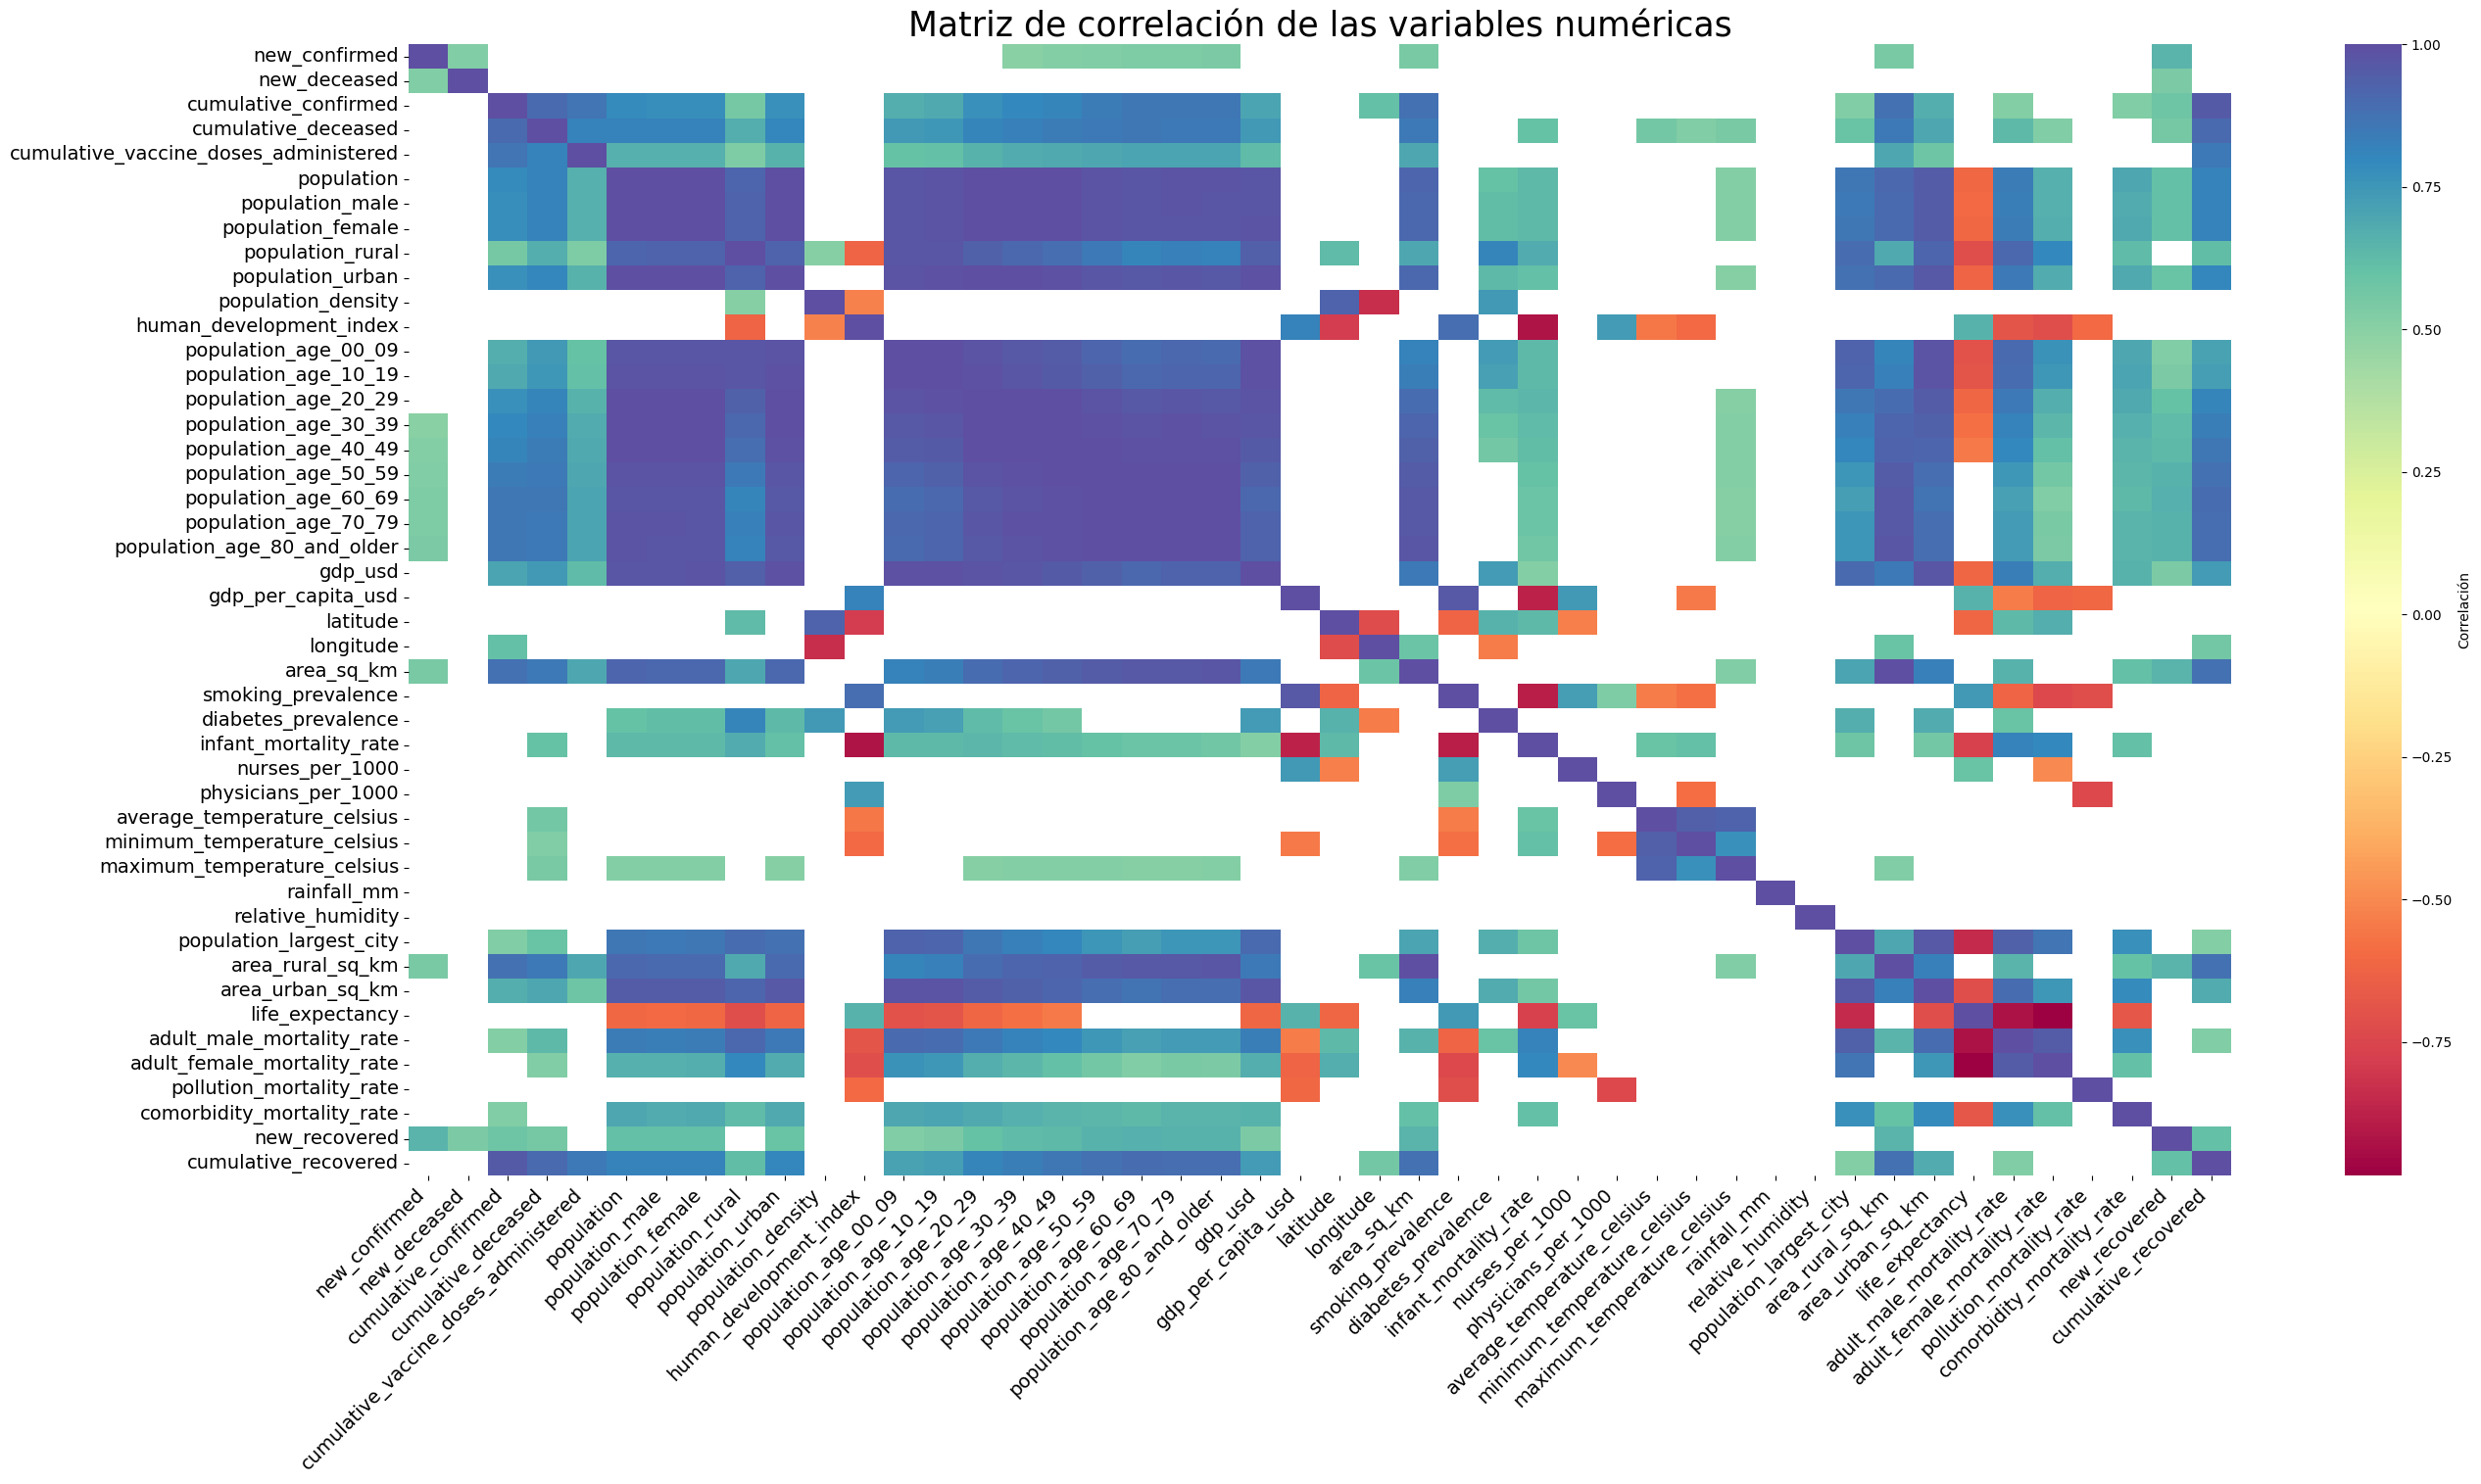

In [ ]:
#Se crea la matriz de correlación de las variables numéricas para identificar cuáles están más relacionadas entre sí

# selecciono las columnas que contienen datoas numericos
numeric_columns = data_latinoamerica_filtrada.select_dtypes(include=['float64', 'int64']).columns

# calculo la matriz de correlacion entre las columnas numericas seleccionadas anteriormente
correlation_matrix = data_latinoamerica_filtrada [numeric_columns].corr()

# creo una máscara para el triángulo superior
# mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Esta función toma la matriz booleana y la convierte en una máscara triangular superior. "enmascara" la parte superior de la matriz de correlación para que no sea visualizada.

# Vamos a mostrar valores superiores a 0.5 (que haya una correlación fuerte (absoluta)) pero tambien se muestran valores negativos.
correlation_matrix = correlation_matrix[abs(correlation_matrix) > abs(0.5)]

# utilizando la biblioteca matplotlib, creamos una figura de tamaño: 30 pulgadas de ancho y 15 de alto.
plt.figure(figsize=(30, 15))

#creamos un mapa de calor usando la matriz de correlacion
heatmap = sns.heatmap(correlation_matrix, cmap='Spectral', fmt=".2f", annot_kws={"size": 15},
                      cbar_kws={'label': 'Correlación'})

#correlation_matrix: Es la matriz filtrada con las correlaciones fuertes.
# mask=mask: La máscara creada antes enmascara la parte superior de la matriz.
# cmap='spectral': Utiliza un esquema de colores que va del púrpura al amarillo, pasando por el azul y el verde.
# fmt=".2f": Formatea los valores de correlación mostrados con dos decimales.
# annot_kws: Cambia el tamaño de las anotaciones (etiquetas), estableciendo la fuente en 15
# cbar_kws={'label': 'Correlación'}: Agrega una etiqueta a la barra de color para indicar qué representa la fuerza de la correlación.

# Cambiar el tamaño de los labels de los ejes X e Y
# heatmap.get_xticklabels(): Obtiene las etiquetas actuales del eje x del mapa de calor.
# heatmap.set_xticklabels(...): Establece nuevas etiquetas para el eje x, usando las mismas etiquetas pero con modificaciones:
# rotation=45: Rota las etiquetas 45 grados para evitar que se superpongan.
# horizontalalignment='right': Alinea las etiquetas a la derecha para que sean más legibles.
# fontsize=14: Establece el tamaño de la fuente de las etiquetas en 14 puntos.
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=14)

# heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=14): igual pero para el eje y
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=14)

# asigno un titulo al grafico. tamaño de la fuente:325
plt.title('Matriz de correlación de las variables numéricas', fontsize=25)

#muestro el grafico
plt.show()



En la gráfica anterior se muestran las variables con mayor correlación entre sí. Para facilitar su identificación, se estableció un umbral de correlación, tomando en cuenta únicamente aquellas relaciones cuyo valor absoluto sea superior a 0.5. Estas correlaciones fuertes se visualizaron mediante un heatmap, lo que permite observar de manera clara y visual las relaciones positivas y negativas más significativas entre las variables.

Con esta información preliminar podremos realizar un análisis más profundo. Este análisis podría incluir la identificación de las causas de estas correlaciones y su relevancia en el contexto del problema que se está investigando. Además, dicha información es clave para la toma de decisiones en etapas posteriores del análisis de datos, como la construcción de un modelo de Machine Learning (ML), donde variables altamente correlacionadas podrían impactar en el rendimiento y la interpretación del modelo.

No obstante, antes de avanzar a ese nivel de análisis detallado, es útil realizar una revisión gráfica de las columnas presentes en el conjunto de datos para obtener una mejor comprensión del comportamiento de los valores individuales. Para ello, podemos recurrir a visualizaciones como gráficos de barras (barplots) que nos permitirán observar las distribuciones y tendencias de las diferentes variables de manera individual. A fin de automatizar y optimizar este proceso, se utilizará un ciclo for junto con la librería Seaborn para generar estas visualizaciones de manera eficiente y consistente para todas las columnas relevantes.

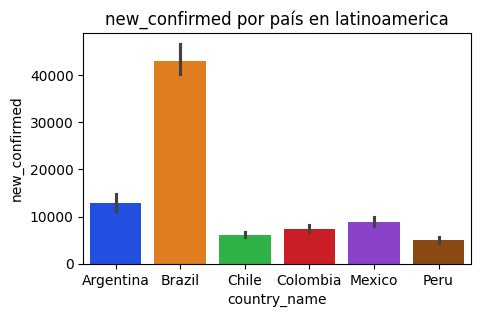

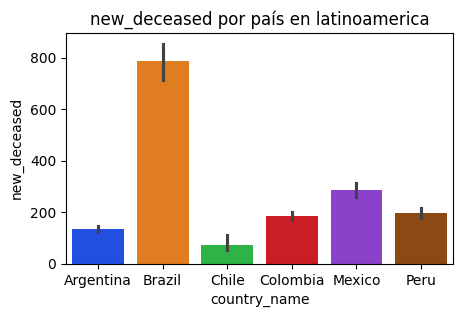

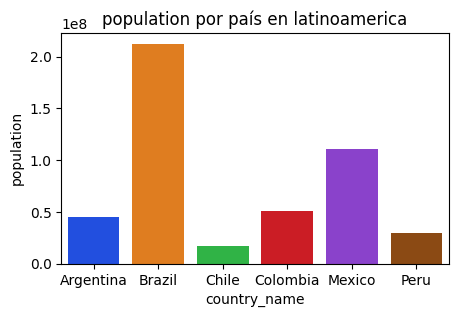

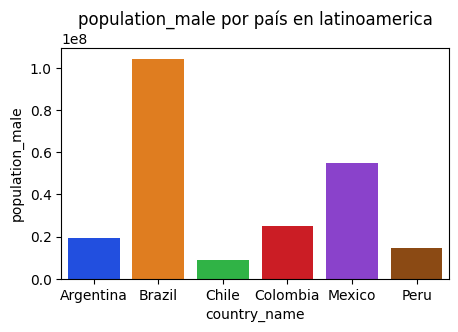

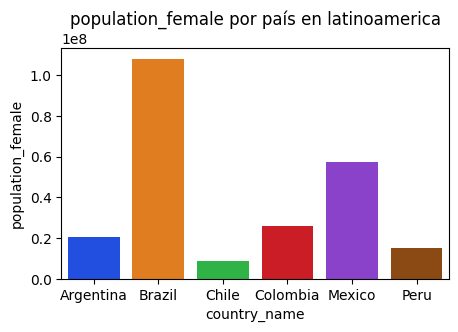

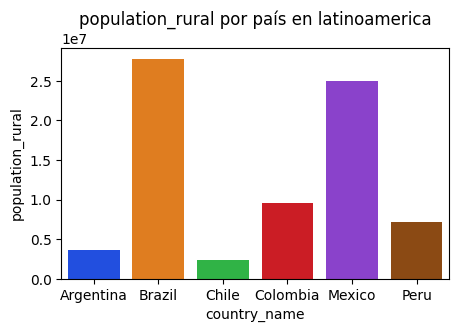

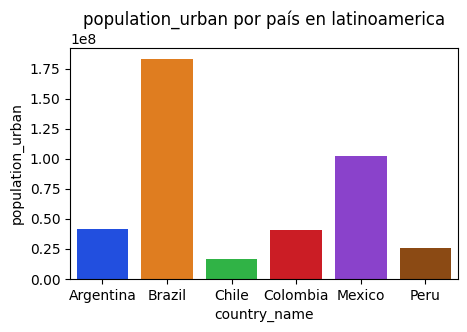

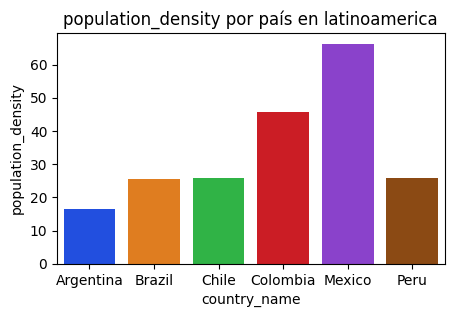

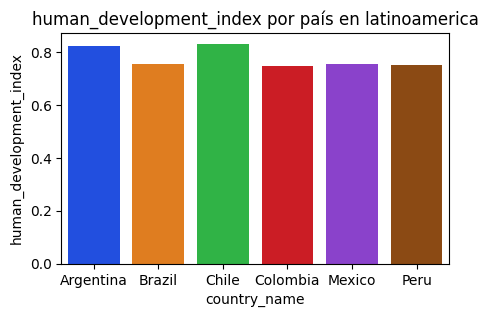

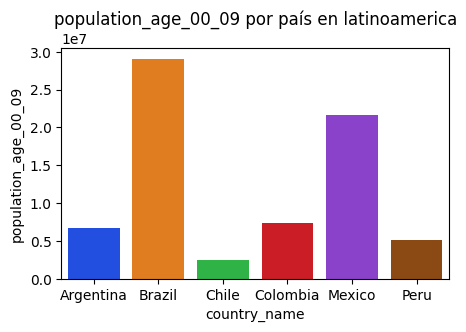

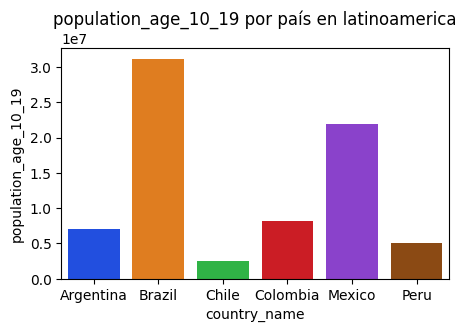

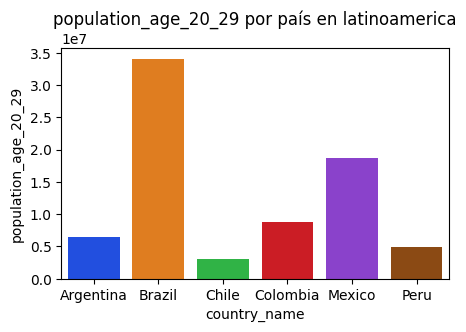

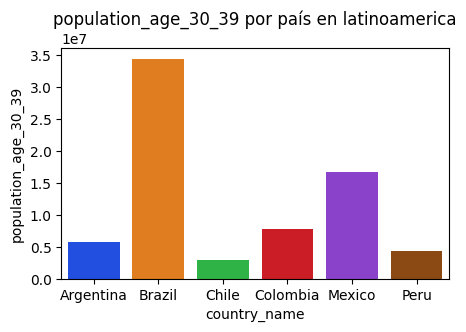

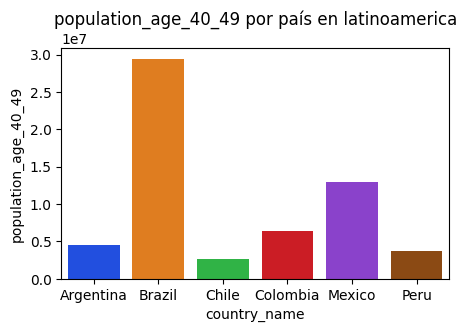

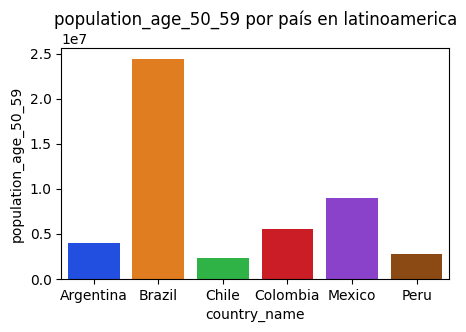

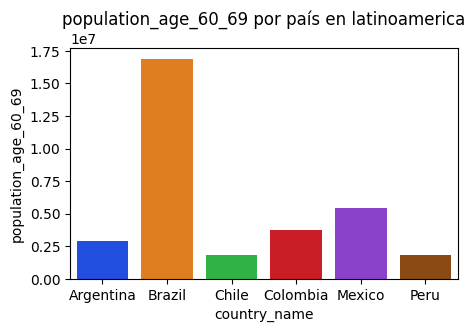

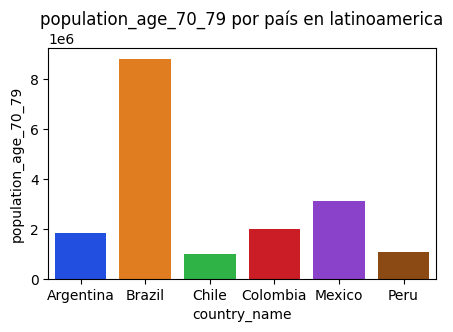

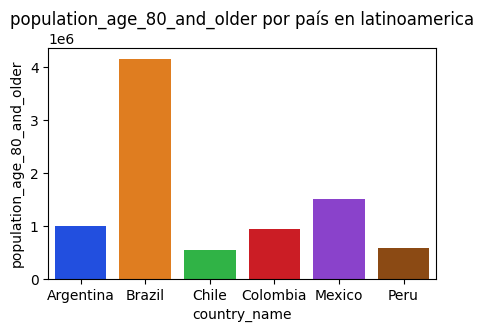

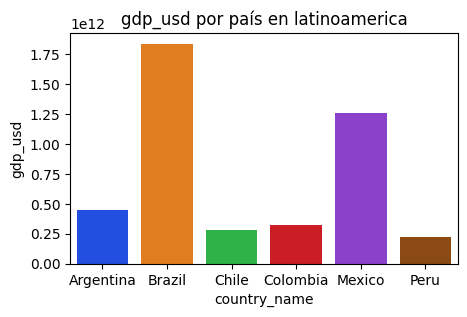

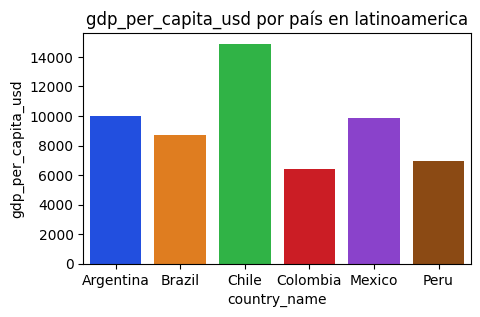

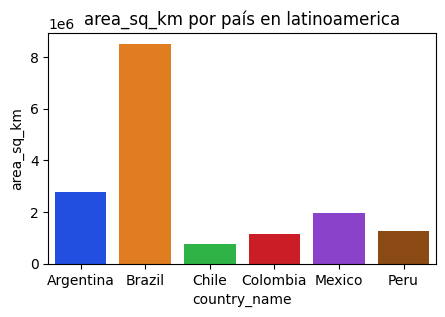

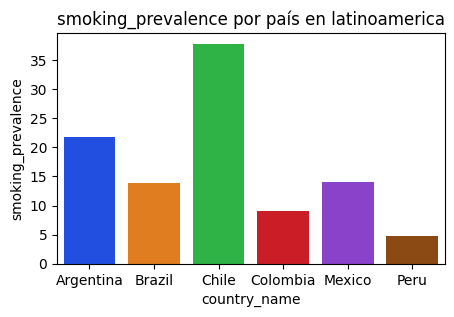

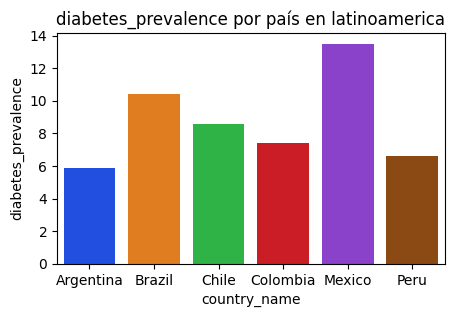

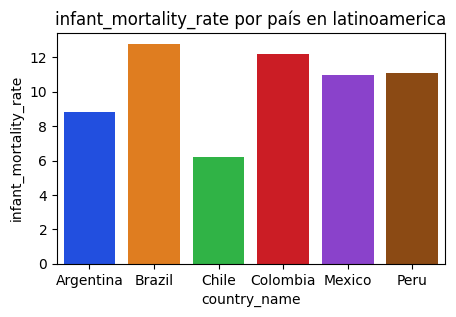

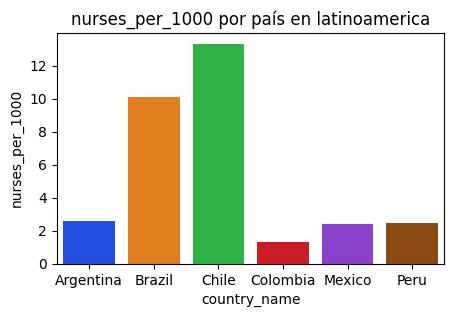

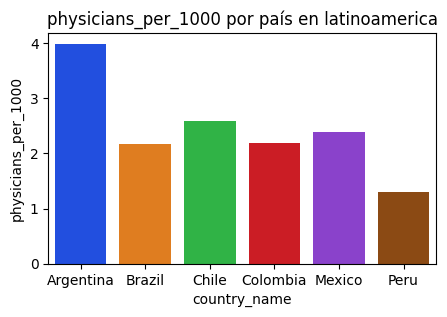

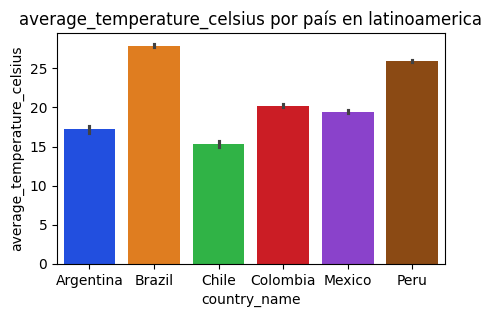

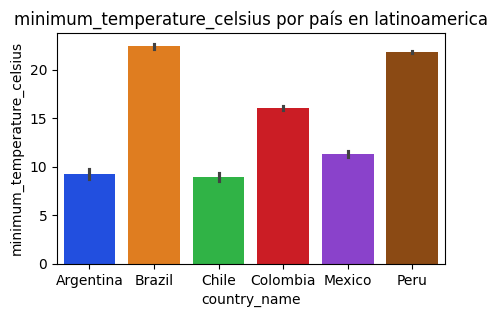

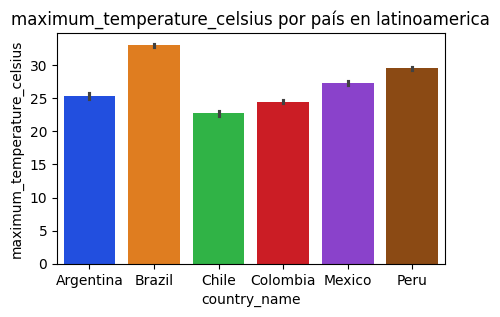

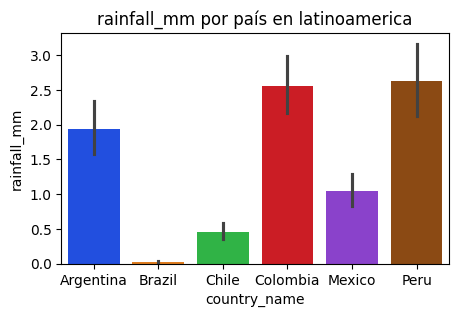

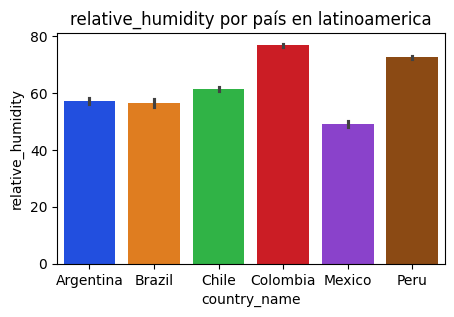

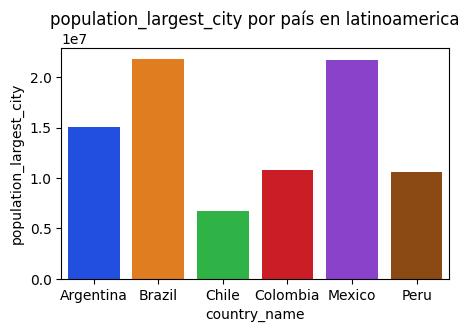

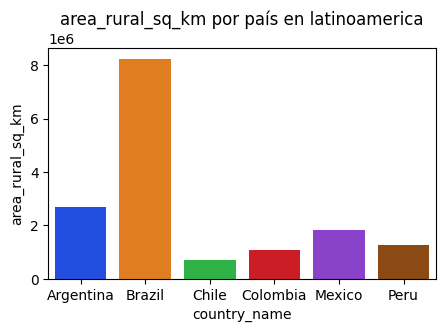

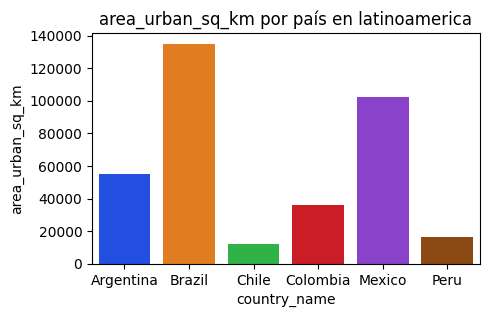

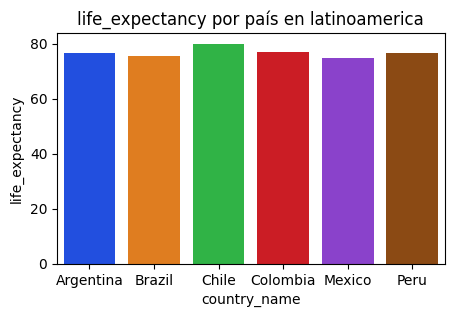

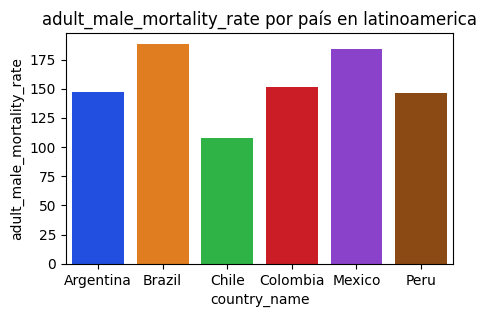

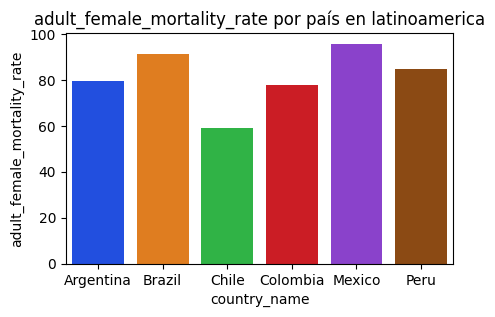

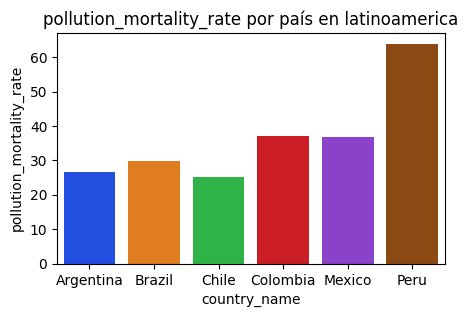

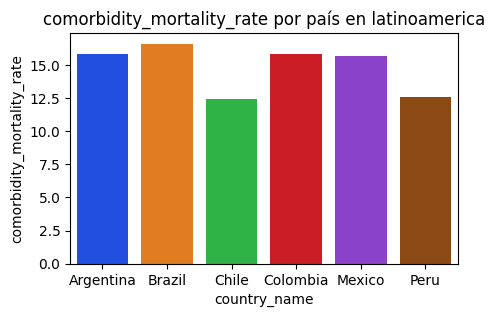

In [ ]:
# Grafico de barras

for i in data_latinoamerica.columns:
  # el bucle for itera sobre todas las columnas del df.

     if i not in ['location_key','date','country_code','country_name','latitude','longitude','cumulative_confirmed', 'cumulative_deceased',
       'cumulative_recovered', 'cumulative_vaccine_doses_administered','new_recovered']:
       # la variable i se utiliza para representar a cada columnas a medida que el bucle avanza
       # el código solo generará gráficos para las columnas que no están incluidas en esta lista de excepciones

        fig, ax = plt.subplots(figsize=(5, 3))
        # crea una nueva figura y un eje para cada gráfico.



        sns.barplot(x='country_name', y=i, data=data_latinoamerica_filtrada, ax=ax,hue='country_name')
        # x='country_name': El eje x representa los nombres de los países.
        # y=i: El eje y representa el valor de la columna actual (i), es decir, el indicador que se está visualizando.
        # data=data_latinoamerica_filtrada: Se utiliza el DataFrame filtrado como fuente de datos
        # ax=ax: Se especifica el eje donde se dibujará el gráfico.
        # hue='country_name': Este parámetro añade una separación visual basada en la categoría country_name. Seaborn los diferenciará por color.

        # titulo: formateo a string 'valor de i (columna) por pais en latinoamerica'
        plt.title(f'{i} por país en latinoamerica')

        #muestro el grafico
        plt.show()



Se repite el proceso con un ciclo for pero ahora vamos a realizar histogramas para ver la distribución de algunos de los datos.

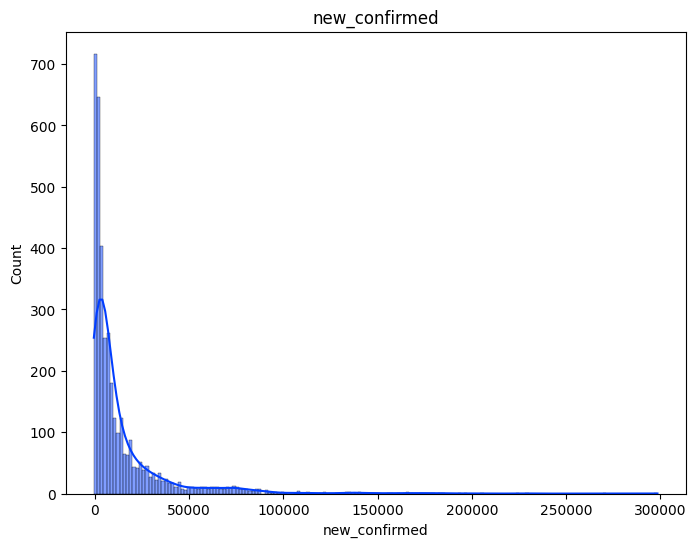

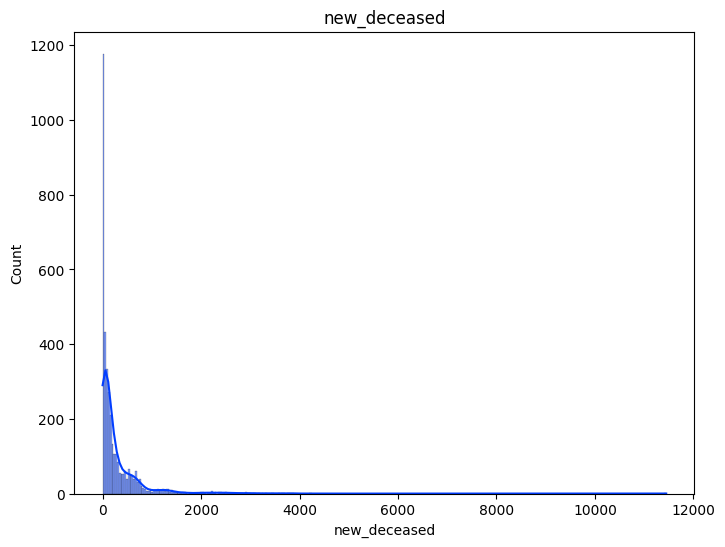

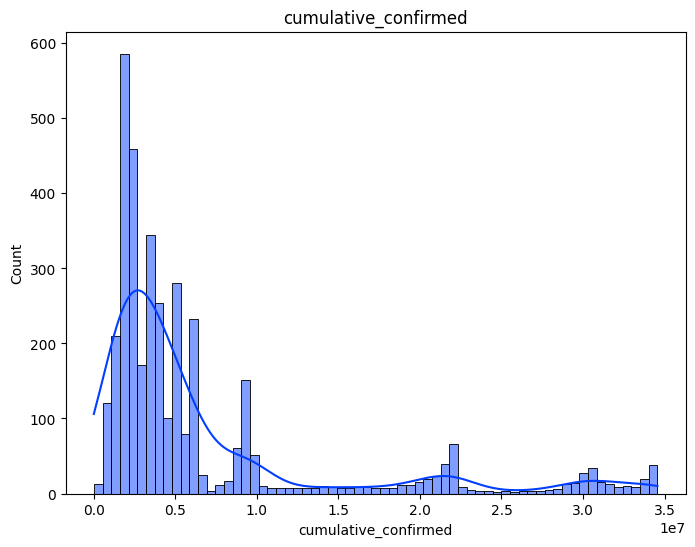

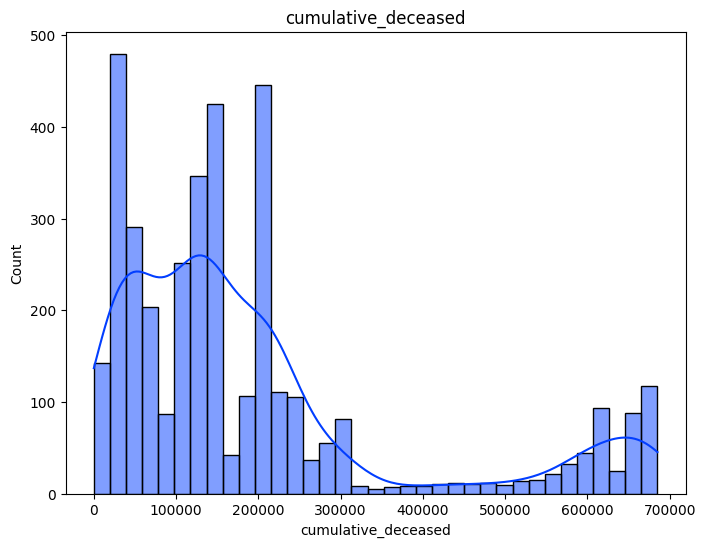

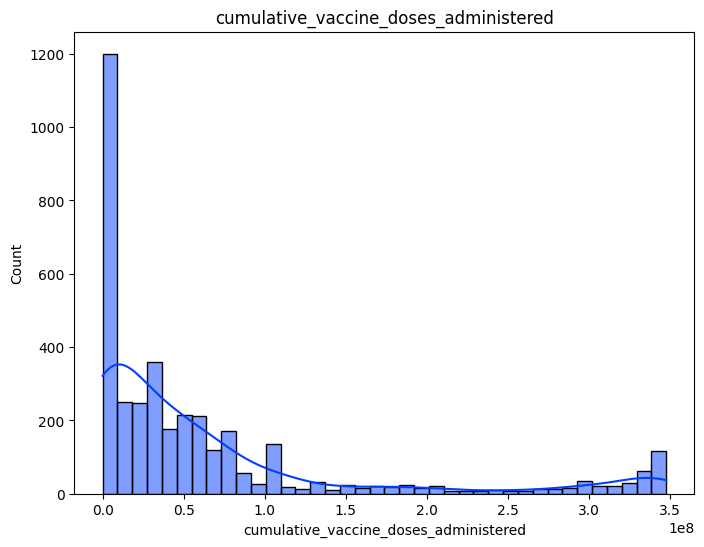

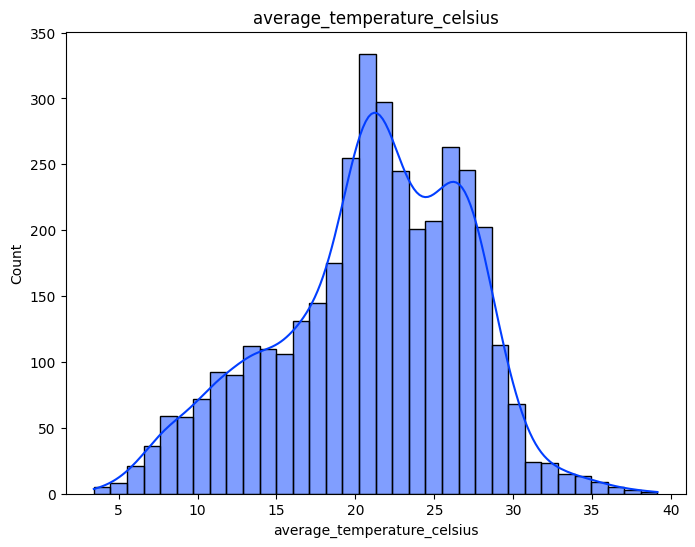

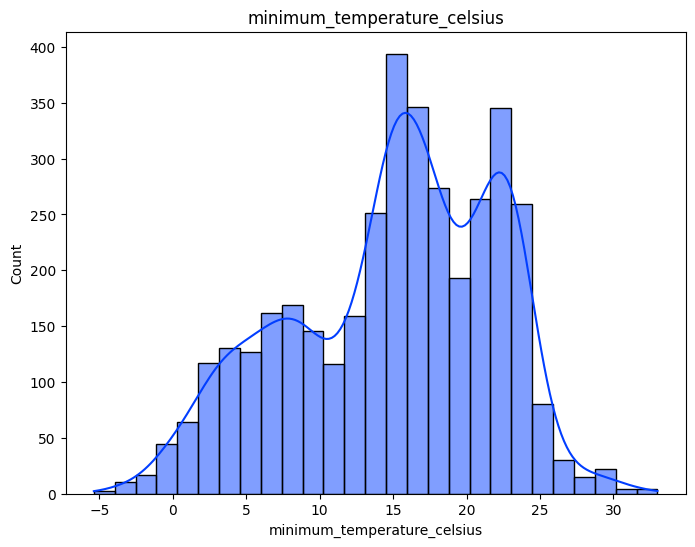

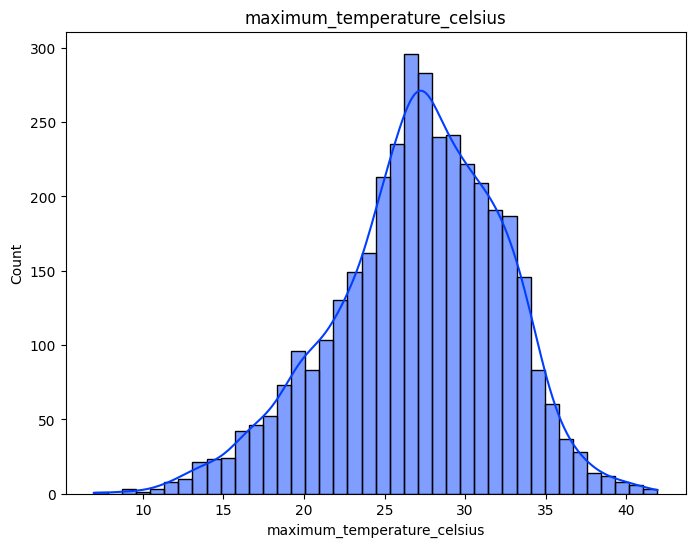

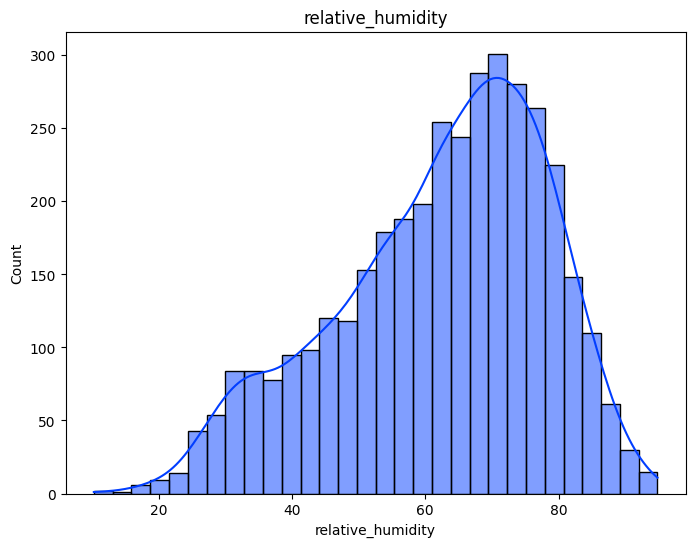

In [ ]:
# creo una lista de columnas
lista_columnas_6=["new_confirmed","new_deceased","cumulative_confirmed","cumulative_deceased",
                  "cumulative_vaccine_doses_administered","average_temperature_celsius","minimum_temperature_celsius",
                  "maximum_temperature_celsius","relative_humidity"]

#elijo la paleta
sns.set_palette= ('bright')


# Crear histogramas de las variables numéricas

for i in lista_columnas_6:
# recorre los nombres de las columnas

  fig, ax = plt.subplots(figsize=(8,6))
  #crea un grafico para cada variable de 8x6 pulgadas

  sns.histplot(data_latinoamerica_filtrada[i], kde=True)
  #  Genera un histograma de la columna i en data_latinoamerica_filtrada y añade una curva KDE (kde=True) que representa la estimación de la densidad.

  plt.title(i)
  # Añade el nombre de la variable como título del gráfico.

  plt.show()
  #muestra el grafico

Procederemos a realizar un analisis enfocados en la relación entre la temperatura promedio en grados Celsius (average_temperature_celsius) y los casos nuevos confirmados de COVID-19 (new_confirmed). Se busca identificar si en los países de América Latina, la temperatura tiene alguna influencia en el número de casos confirmados.

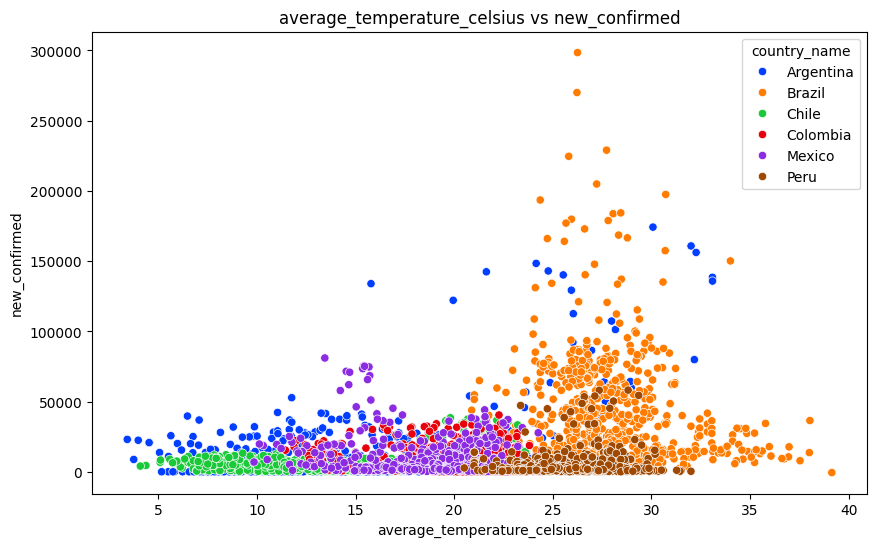

In [ ]:
# Creamos un diagrama de dispersión para visualizar la relación entre el promedio de temperatura en grados celsius y los nuevos confirmados

fig, ax = plt.subplots(figsize=(10, 6))
#crea una nueva figura y un eje

sns.scatterplot(x='average_temperature_celsius', y='new_confirmed', data=data_latinoamerica_filtrada, hue='country_name')
# utiliza seaborn para crear el diagrama de dispersion
# en el eje x = temperatura promedio
# en el eje y = nuevos confirmados
# data = toma el df data_latinoamerica_filtrada,
# hue = country name. separacion visual por color para cada pis. colorea los puntos de los datos por cada uno

plt.title('average_temperature_celsius vs new_confirmed')
# le da el titulo

plt.show()
# muestro el grafico

Se ha observado que, en algunos países, la temperatura no parece influir en el número de casos confirmados de COVID-19, mientras que en otros sí existe una relación entre la temperatura y la cantidad de casos confirmados.
Dado que hemos identificado una posible correlación entre la temperatura y los casos confirmados en ciertos contextos, ahora procederemos a analizar la relación entre la temperatura promedio y la cantidad de muertes relacionadas con COVID-19.

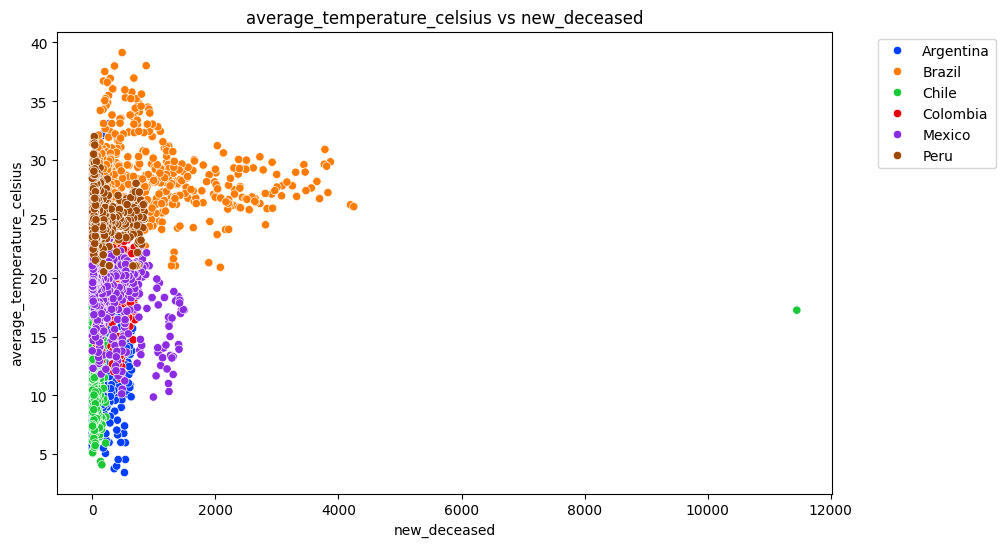

In [ ]:
# Grafica de average_temperature_celsius vs new_deceased


fig, ax = plt.subplots(figsize=(10, 6))
#crea la figura y un eje

sns.scatterplot(y='average_temperature_celsius', x='new_deceased', data=data_latinoamerica_filtrada, hue='country_name')
# crea grafico de dispersion pero ahora:
# y = promedio de temperatura
# x = nuevos muertos

plt.title('average_temperature_celsius vs new_deceased')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# ponemos la leyenda de explicacion por color afuera del grafico, ligeramente a la derecha (1.05,1) y en la esquina superior izquierda

plt.show()

En la gráfica anterior, se observa un comportamiento similar al de los casos confirmados: en algunos países, la temperatura no parece influir en la cantidad de muertes, mientras que en otros se puede apreciar una relación entre la temperatura y el número de fallecimientos.

A continuación, examinaremos cómo se comportan estas variables en un estudio longitudinal, es decir, a lo largo del tiempo. Para ello, realizaremos una primera aproximación observando **las dosis administradas por mes** en todos los países.

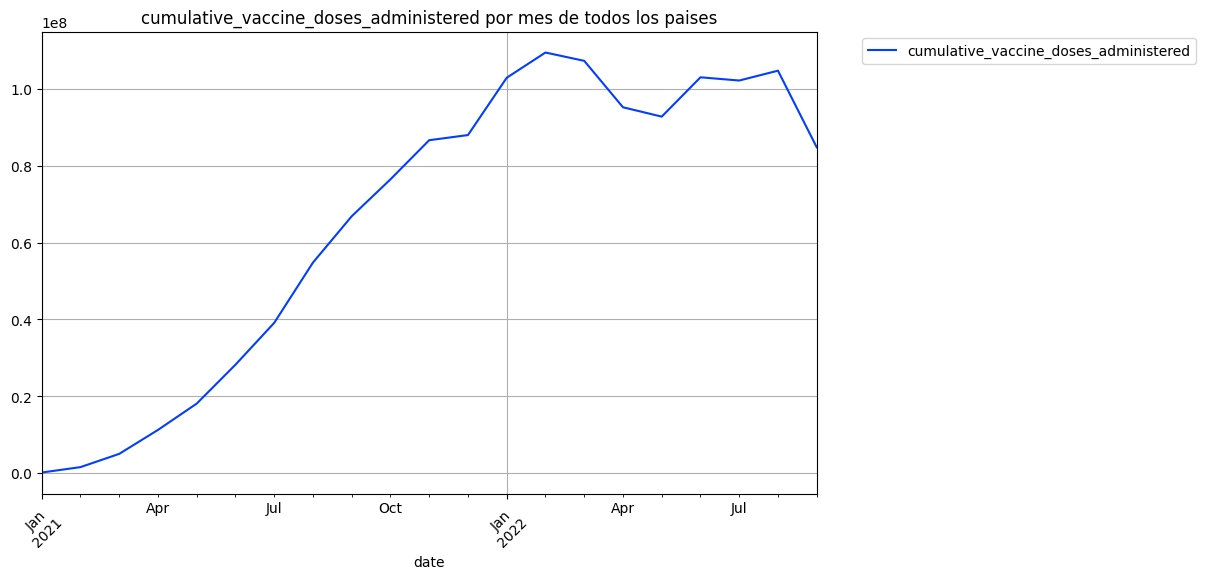

In [ ]:
# Grafica de valores medios de todos los paises - cumulative_vaccine_doses_administered

# creamos la figura de 10x6
fig, ax = plt.subplots(figsize=(10, 6))

# creamos un anueva serie de tiempor para agrupar los datos por mes y calculando el promedio de la columna. numeric only= solo las columnas numericas
data_resample = data_latinoamerica_filtrada.resample('M').mean(numeric_only=True)['cumulative_vaccine_doses_administered']

# crea un grafico de lineas utilizando los datos de data_resample
data_resample.plot(ax=ax)

# Encontrar el valor máximo de la serie de tiempo
max_value = data_resample.max()

# encontrar la fecha correspondiente al valor maximo
max_date = data_resample.idxmax()

# Añadimos cuadrícula
plt.grid(True)

# Personalizando las marcas del eje x
plt.xticks(rotation=45)

# ponemos la leyenda de explicacion por color afuera del grafico, ligeramente a la derecha (1.05,1) y en la esquina superior izquierda
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# titulo
plt.title('cumulative_vaccine_doses_administered por mes de todos los paises')

# mostramos el grafico
plt.show()

En la gráfica anterior, se representa la evolución mensual de las dosis acumulativas de vacunas administradas en todos los países de Latinoamérica. Se observa la **media mensual de las dosis administradas**, lo que permite analizar cómo se ha desarrollado la campaña de vacunación a lo largo del tiempo.

Se puede observar que la cantidad de dosis administradas en los países de Argentina, Brasil, Chile, Colombia, México y Perú ha ido aumentando a lo largo del tiempo, recordemos que es un análisis general y no se ha hecho un análisis detallado.

Como no nos da mucha información, vamos a realizar un análisis más detallado de las dosis administradas por mes en cada país.

In [ ]:
# lista con los paises elegidos
paises_seleccionados = ['Colombia', 'Argentina', 'Chile', 'Mexico', 'Peru', 'Brazil']

Debemos reagrupar (reducir mi columna a meses) (resample) los datos por mes ('ME'), y se calcula el promedio de las dosis administradas en cada mes.

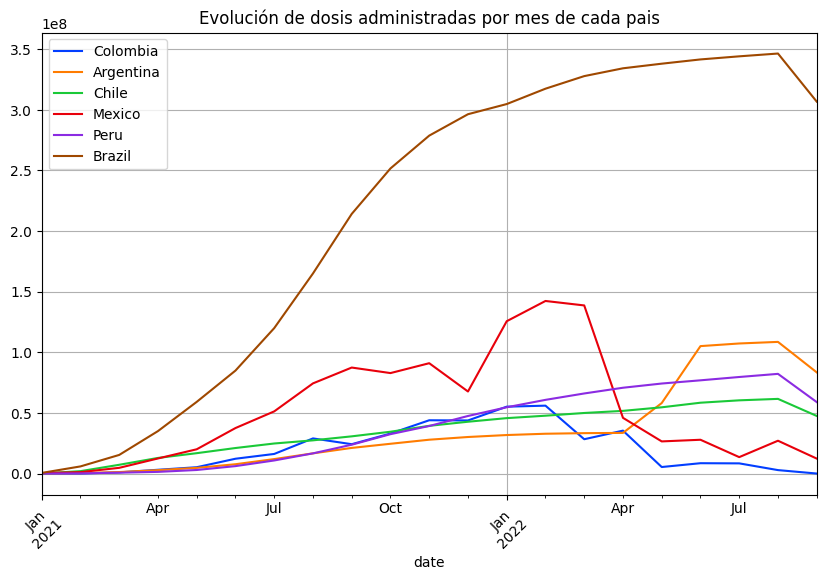

In [ ]:
# visualizar en un mismo grafico la evolucion de las dosis administradas por cada pais.

# creamos la figura de 10 pulgadas de ancho por 6 de alto
fig, ax = plt.subplots(figsize=(10, 6))

for pais in paises_seleccionados:
    data_latinoamerica_filtrada[data_latinoamerica_filtrada['country_name']==pais].resample('M').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()
    # selecciona los datos de cada país por separado, calcula el promedio de dosis de vacunas por mes y luego crea un gráfico donde se muestran estas tendencias para todos los países en una misma imagen.

#titulo
plt.title('Evolución de dosis administradas por mes de cada pais')

#leyenda (cajita)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # POR QUE LA PONE DEL OTRO LADO Y DENTRO DEL GRAFICO????
plt.legend (paises_seleccionados)

# Añadimos una cuadrícula
plt.grid(True)

# Perzonalizamoss las marcas del eje x
plt.xticks(rotation=45)

plt.show()

Al analizar la evolución de las dosis administradas por mes en cada país, se observan diferentes tendencias. En algunos países, la cantidad de dosis administradas ha seguido un patrón ascendente constante, lo que refleja un esfuerzo continuo de vacunación. Sin embargo, en otros países, la cantidad de dosis administradas ha mostrado una tendencia a la baja, lo cual podría deberse a varios factores, como la disminución de la población objetivo para la vacunación, problemas en la distribución de las dosis o la estabilización del ritmo de vacunación tras alcanzar un alto porcentaje de población inmunizada. Estos contrastes entre países resaltan las diversas realidades y desafíos que enfrenta cada uno en su estrategia de vacunación.

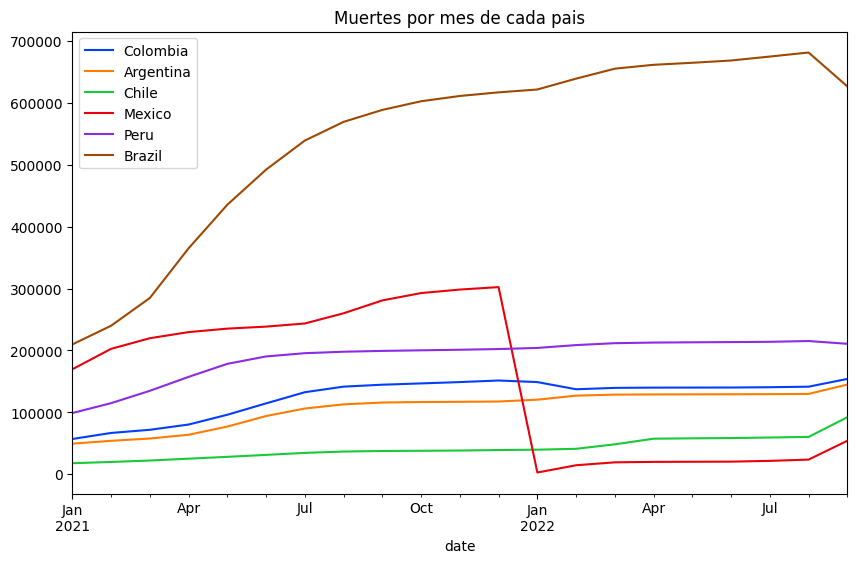

In [ ]:
# creamos la figura y el eje
fig, ax = plt.subplots(figsize=(10, 6))

# bucle for que itera sobre cada pais en la lista de paises seleccionados
for pais in paises_seleccionados:
    data_latinoamerica_filtrada[data_latinoamerica_filtrada['country_name']==pais].resample('M').mean(numeric_only=True)['cumulative_deceased'].plot()
#toma la columna country name del df data latinoamerica filtrada y analiza si la variable "pais" se encuentra alli. calcula el promedio de muertos acumulados por mes y luego crea un gráfico donde se muestran estas tendencias para todos los países en una misma imagen.

plt.title('Muertes por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

Los países con mayor número de muertes reportadas son: Brasil, seguido de México, Colombia, Argentina, Perú y Chile. Sin embargo, esto no implica necesariamente que estos países hayan gestionado mal la pandemia. Es esencial considerar la cantidad de habitantes en cada país, la densidad poblacional y otros factores, como la disponibilidad de servicios de salud y las medidas preventivas adoptadas. Además, la calidad y consistencia de los datos recopilados también juegan un papel importante en la evaluación. Por ejemplo, en México, la disminución de casos reportados podría deberse tanto a una verdadera reducción de contagios como a posibles lagunas en la recolección de datos, lo cual necesitaría un estudio más detallado para comprender su naturaleza.

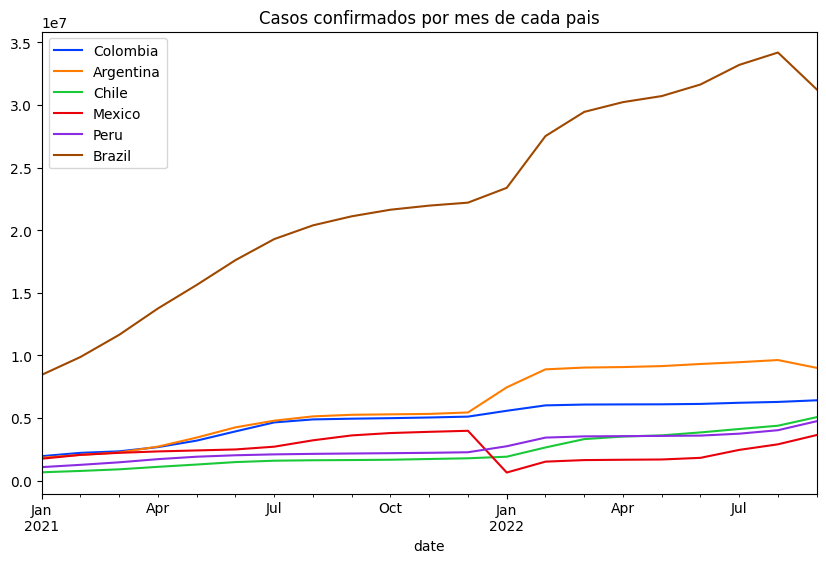

In [ ]:
# creamos la figura y el eje
fig, ax = plt.subplots(figsize=(10, 6))

# bucle for que itera sobre cada pais en la lista de paises seleccionados
for pais in paises_seleccionados:
    data_latinoamerica_filtrada[data_latinoamerica_filtrada['country_name']==pais].resample('M').mean(numeric_only=True)['cumulative_confirmed'].plot()
# toma la columna country name del df data latinoamerica filtrada y analiza si la variable "pais" se encuentra alli. calcula el promedio de confirmados acumulados por mes y luego crea un gráfico donde se muestran estas tendencias para todos los países en una misma imagen.

plt.title('Casos confirmados por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

Brasil también registró la mayor cantidad de casos confirmados por mes a lo largo de la pandemia. Sin embargo, al igual que con las muertes, este dato debe interpretarse en un contexto más amplio. La alta población de Brasil, sumada a factores como la capacidad de pruebas, la densidad poblacional y la implementación de medidas de contención, influyen en estos números. Es posible que otros países, con poblaciones más pequeñas, hayan tenido tasas de infección más altas proporcionalmente, pero en números absolutos, Brasil sobresale por su tamaño y volumen de reportes. Esto resalta la importancia de analizar los datos en relación con la población total para obtener una imagen más precisa del impacto de la pandemia.

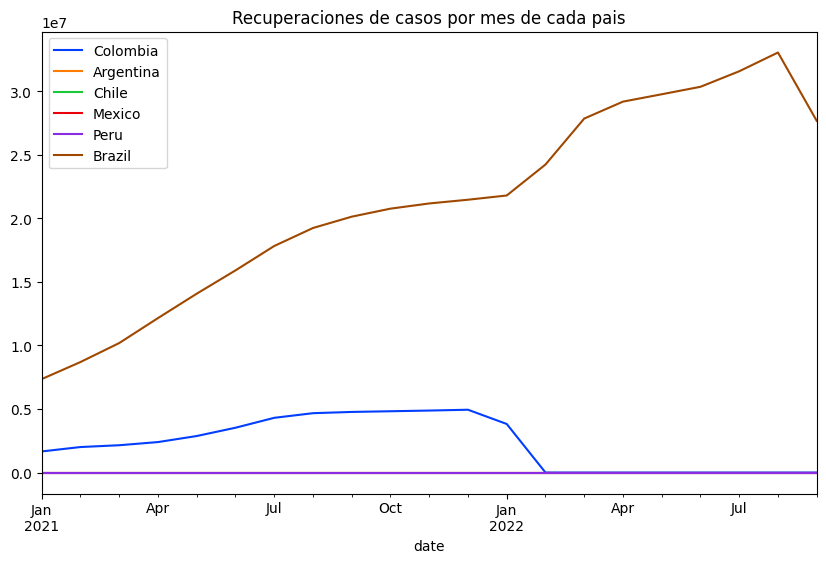

In [ ]:
# crea la figura y el eje
fig, ax = plt.subplots(figsize=(10, 6))

# el bucle for itera por pais sobre la lista paises seleccionados
for pais in paises_seleccionados:
    data_latinoamerica_filtrada[data_latinoamerica_filtrada['country_name']==pais].resample('M').mean(numeric_only=True)['cumulative_recovered'].plot()
# toma la columna country name del df data latinoamerica filtrada y analiza si la variable "pais" se encuentra alli. calcula el promedio de recuperados acumulados por mes y luego crea un gráfico donde se muestran estas tendencias para todos los países en una misma imagen.

plt.title('Recuperaciones de casos por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

Brasil ha sido el país que mejor se ha recuperado en términos de casos confirmados y mortalidad, mostrando una tendencia positiva en su recuperación. Sin embargo, como mencionamos anteriormente, esta recuperación está estrechamente relacionada con varios factores, como la cantidad de población y la disponibilidad de vacunas. A medida que Brasil fue avanzando en la distribución de dosis y alcanzando a un mayor porcentaje de su población, la curva de casos y muertes comenzó a descender. No obstante, es importante recordar que el éxito en la recuperación también depende de la efectividad de las campañas de vacunación, el acceso equitativo a las dosis y la implementación de medidas de salud pública a lo largo del tiempo.

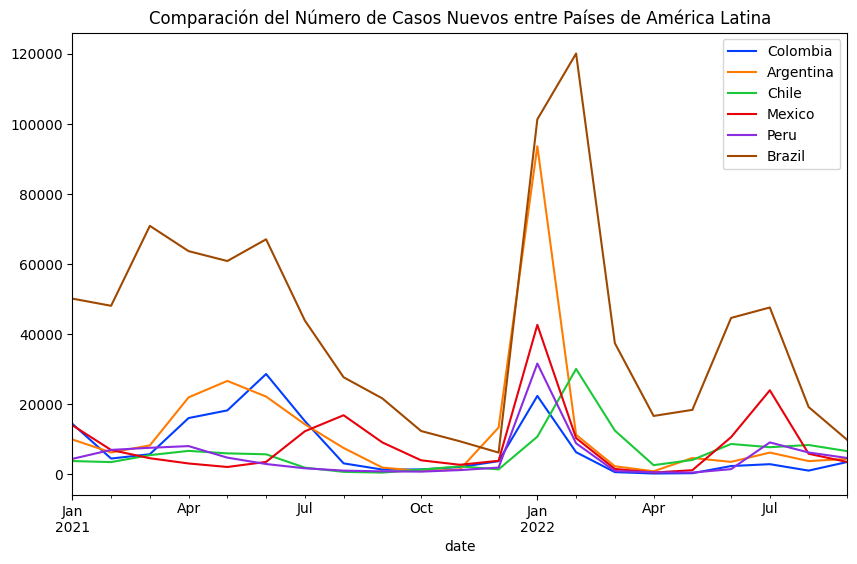

In [ ]:
## crea la figura y el eje
fig, ax = plt.subplots(figsize=(10, 6))

# el bucle for itera por pais sobre la lista paises seleccionados
for pais in paises_seleccionados:
    data_latinoamerica_filtrada[data_latinoamerica_filtrada['country_name']==pais].resample('M').mean(numeric_only=True)['new_confirmed'].plot()
# toma la columna country name del df data latinoamerica filtrada y analiza si la variable "pais" se encuentra alli. calcula el promedio de nuevos confirmados por mes y luego crea un gráfico donde se muestran estas tendencias para todos los países en una misma imagen.


plt.title('Comparación del Número de Casos Nuevos entre Países de América Latina')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

Uno de los países que mejor manejó la pandemia fue **Chile**, seguido de Perú, Argentina, Colombia, México y Brasil. Esto se refleja en la menor cantidad de muertes y casos confirmados en comparación con otros países, así como en una distribución de vacunas más equilibrada. Un ejemplo claro es el caso de Chile, que logró contener los contagios hasta febrero de 2022, alcanzando un pico máximo de alrededor de 30.000 casos. Mientras que en la mayoría de los otros países, el pico de contagios se registró en enero de 2022, Chile mantuvo un control más uniforme y estable a lo largo del período analizado. Este manejo permitió que los valores de contagios se mantuvieran relativamente bajos y constantes, destacando la eficacia de las medidas adoptadas por el país.

Text(0.5, 1.0, 'Distribución de dosis acumuladas por país')

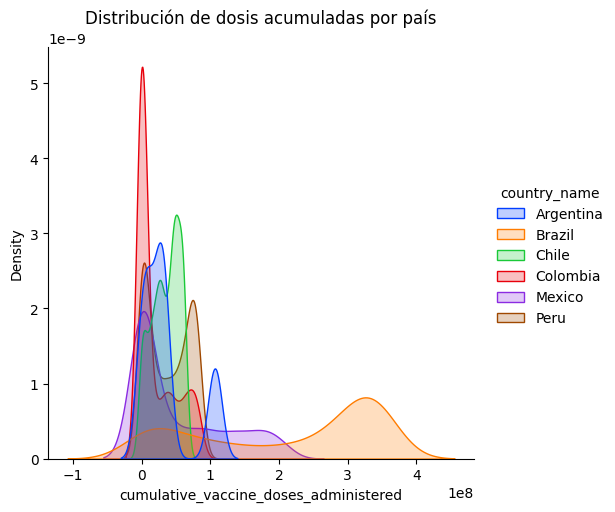

In [ ]:
# creamos un grafico de distribucion

sns.displot(data_latinoamerica_filtrada, x="cumulative_vaccine_doses_administered", hue="country_name", kind="kde", fill=True)
# queremos que el eje x represente el número acumulado de dosis de vacunas administradas.
# hue="country_name": agrupar los datos por el país y mostrar una distribución separada para cada país. Los diferentes países serán representados por diferentes colores.
# kind="kde": crear un gráfico de densidad de kernel (KDE). Un KDE es una estimación suave de la función de densidad de probabilidad de una variable continua. Esto nos dará una idea de la distribución de las dosis de vacunas para cada país.
# fill=True: Rellena el área bajo la curva KDE para crear un efecto de sombreado, lo que hace que la visualización sea más fácil de entender.

plt.title('Distribución de dosis acumuladas por país')


La curva baja y ancha de Brasil refleja una desproporción en el sentido de que, aunque administró muchas dosis, no lo hizo de manera tan eficiente o uniforme como los otros países. Es probable que esto también esté relacionado con los altos números de casos y muertes, lo que indicaría que, a pesar de haber administrado vacunas, la estrategia no fue lo suficientemente rápida o efectiva para contener la pandemia en las primeras fases.

En contraste, los países con curvas angostas y altas parecen haber logrado una mayor efectividad en la administración de vacunas en un corto período de tiempo, lo que probablemente contribuyó a controlar mejor los contagios y muertes.

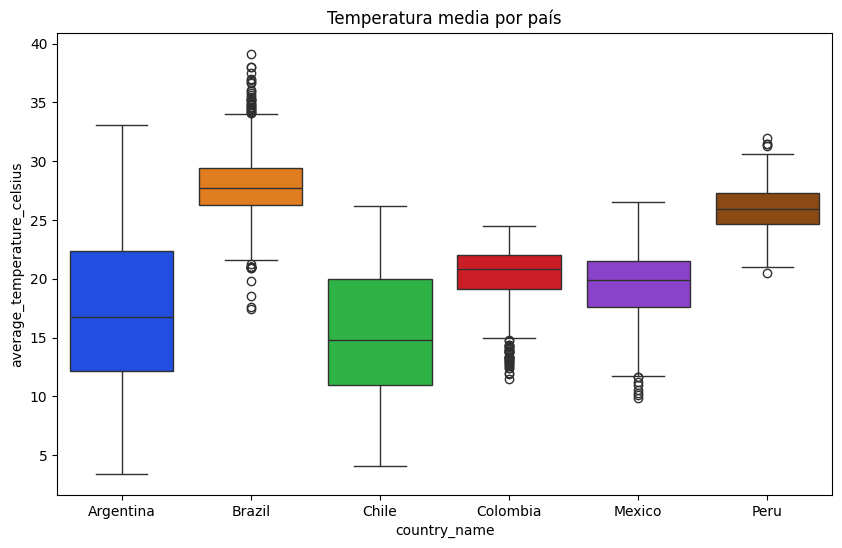

In [ ]:
#average_temperature_celsius vs new_confirmed por pais boxplot

# crea la figura con el eje
fig, ax = plt.subplots(figsize=(10, 6))

# grafica un diagrama de caja y bigotes
sns.boxplot(x='country_name', y='average_temperature_celsius', data=data_latinoamerica_filtrada, hue='country_name')

plt.title('Temperatura media por país')
plt.show()

Argentina: La temperatura media está centrada alrededor de los 15°C, con un rango intercuartílico (Q1 a Q3) entre aproximadamente 12°C y 20°C. Tiene algunos outliers, pero en general la temperatura se mantiene moderada.

Brazil: La temperatura media es mayor que en Argentina, centrada alrededor de los 25°C, con un rango más estrecho de entre 20°C y 30°C. Hay varios outliers en los valores más bajos, lo que podría representar zonas con climas más frescos.

Chile: Tiene temperaturas más bajas en general, con la mediana cercana a los 15°C y un rango intercuartílico entre 10°C y 20°C.

Colombia: Tiene temperaturas entre 15°C y 25°C, con algunos valores más bajos que son outliers. La mediana está cercana a los 20°C.

México: La mediana es de alrededor de 20°C, pero también tiene varios outliers en valores más bajos, lo que podría reflejar regiones con climas más frescos.

Perú: Similar a Brazil, con una mediana alrededor de 25°C, pero con un rango más amplio de valores. Tiene algunos outliers en los extremos más bajos, lo que podría estar asociado con zonas de altitud alta.

Conclusión:
Este gráfico muestra las diferencias en las distribuciones de temperatura promedio entre estos países de América Latina. En general, Brazil y Perú tienen las temperaturas medias más altas, mientras que Chile tiene las más bajas. Los países presentan diferentes rangos de temperaturas y algunas regiones con temperaturas atípicas (outliers), que pueden estar relacionadas con factores como la altitud o zonas geográficas específicas.

El gráfico de tipo boxplot es útil para visualizar la distribución de la temperatura media, comparándola entre los distintos países.

El gráfico permite observar cómo varía la temperatura en cada país. Chile, por su extensión geográfica, tiene una gran diversidad climática, lo que afecta a las temperaturas promedio en comparación con otros países de la región.

En este análisis se puede observr que, a pesar de las diferencias de temperatura en Chile, este país logró manejar mejor la pandemia que otros países. Esto puede interpretarse como que la temperatura no fue un factor determinante para la cantidad de casos confirmados y muertes, sino otros factores, como las políticas de salud y el ritmo de vacunación.

A medida que se avanza en el presente análisis, se observa que los países con mayor número de casos y muertes son los que más necesitan nuevos centros de atención o recursos. Sin embargo, aún no se ha hecho un análisis lo suficientemente detallado para tomar una decisión definitiva.

Los violinplots que se muestran a continuación añadirán información sobre la densidad de los datos.

In [ ]:
# Creamos una lista vacia que sera completada con las columnas que cumplan ciertas condiciones
columnas_mayores_6=[]

# el bucle for itera sobre cada columna de data_latinoamerica_filtrada.
for i in data_latinoamerica_filtrada.columns:
    # si i no se encuentra en las columnas que quiero excluir, entonces:
    if i not in ['location_key','date','country_code','latitude','longitude']:
        # si la cantidad de valores unicos en la serie (columna actual (i)) es mayor a 6:
        if data_latinoamerica_filtrada[i].nunique()>6:
            # en ese caso, agrega la columna actual a la lista vacia que cree anteriormente.
            columnas_mayores_6.append(i)

#agregar a columnas_mayores_6 la columna country_name para poder hacer analisis por país.
columnas_mayores_6.append('country_name')

# Se crea un dataframe con las columnas mayores a 6
data_latinoamerica_paises_mayores_6=data_latinoamerica_filtrada[columnas_mayores_6]

#imprimo el df
data_latinoamerica_paises_mayores_6



new_confirmed  new_deceased  cumulative_confirmed  \
date                                                            
2021-01-02    7767.000000    166.000000          1.670634e+06   
2021-01-03    4934.000000    157.000000          1.675568e+06   
2021-01-04   13953.000000    157.000000          1.689521e+06   
2021-01-05   14085.000000    160.000000          1.703606e+06   
2021-01-06   14496.000000    131.000000          1.718102e+06   
...                   ...           ...                   ...   
2022-09-13    1150.000000     22.000000          4.127612e+06   
2022-09-14   13936.279613    277.164115          6.784382e+06   
2022-09-15   13936.279613    277.164115          6.784382e+06   
2022-09-16   13936.279613    277.164115          6.784382e+06   
2022-09-17   13936.279613    277.164115          6.784382e+06   

            cumulative_deceased  cumulative_vaccine_doses_administered  \
date                                                                     
2021-01-02         46688.000000                                20334.0   
2021-01-03         46845.000000                                20529.0   
2021-01-04         47002.000000                                25164.0   
2021-01-05         47162.000000                                29852.0   
2021-01-06         47293.000000                                34162.0   
...                         ...                                    ...   
2022-09-13        216173.000000                                    0.0   
2022-09-14        193136.784045                                    0.0   
2022-09-15        193136.784045                                    0.0   
2022-09-16        193136.784045                                    0.0   
2022-09-17        193136.784045                                    0.0   

            average_temperature_celsius  minimum_temperature_celsius  \
date                                                                   
2021-01-02                    27.740741                    18.098765   
2021-01-03                    21.956790                    17.950617   
2021-01-04                    24.894444                    18.072222   
2021-01-05                    20.104938                    16.135802   
2021-01-06                    20.919753                    13.290123   
...                                 ...                          ...   
2022-09-13                    30.500000                    25.666667   
2022-09-14                    21.019222                    14.961197   
2022-09-15                    21.019222                    14.961197   
2022-09-16                    21.019222                    14.961197   
2022-09-17                    21.019222                    14.961197   

            maximum_temperature_celsius  rainfall_mm  relative_humidity  \
date                                                                      
2021-01-02                    33.962963     0.000000          43.581350   
2021-01-03                    33.456790    13.144500          74.880846   
2021-01-04                    30.244444     1.498600          60.805923   
2021-01-05                    30.685185     8.286750          72.972595   
2021-01-06                    26.580247     5.108222          52.241997   
...                                 ...          ...                ...   
2022-09-13                    34.666667     0.000000          60.851205   
2022-09-14                    27.060858     1.445042          62.306435   
2022-09-15                    27.060858     1.445042          62.306435   
2022-09-16                    27.060858     1.445042          62.306435   
2022-09-17                    27.060858     1.445042          62.306435   

            new_recovered  cumulative_recovered country_name  
date                                                          
2021-01-02            0.0                   0.0    Argentina  
2021-01-03            0.0                   0.0    Argentina  
2021-01-04            0.0             

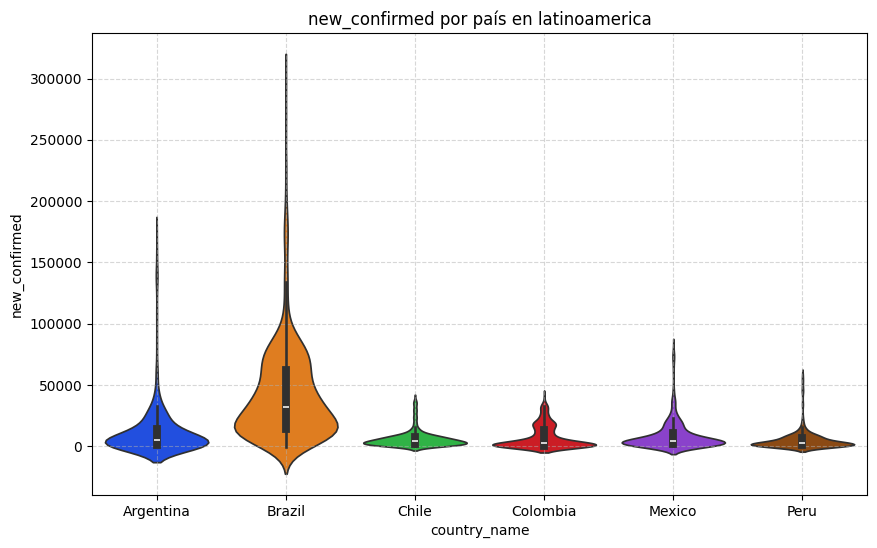

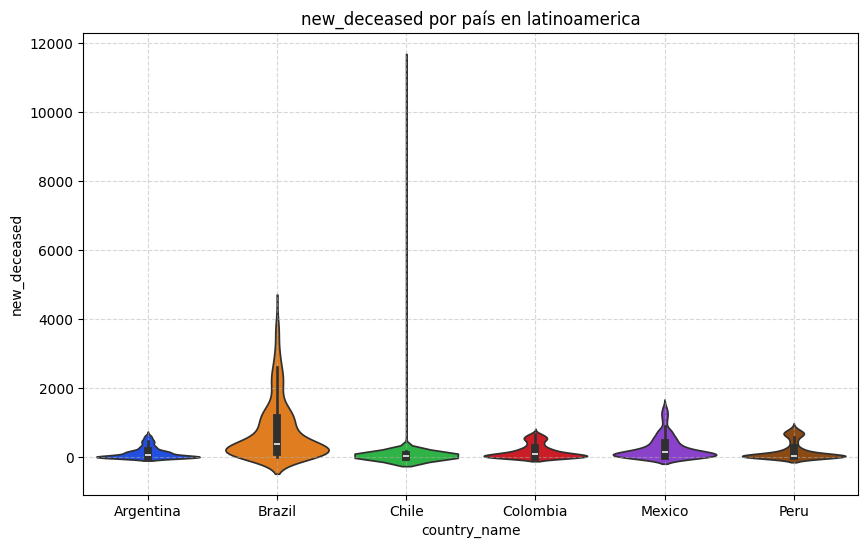

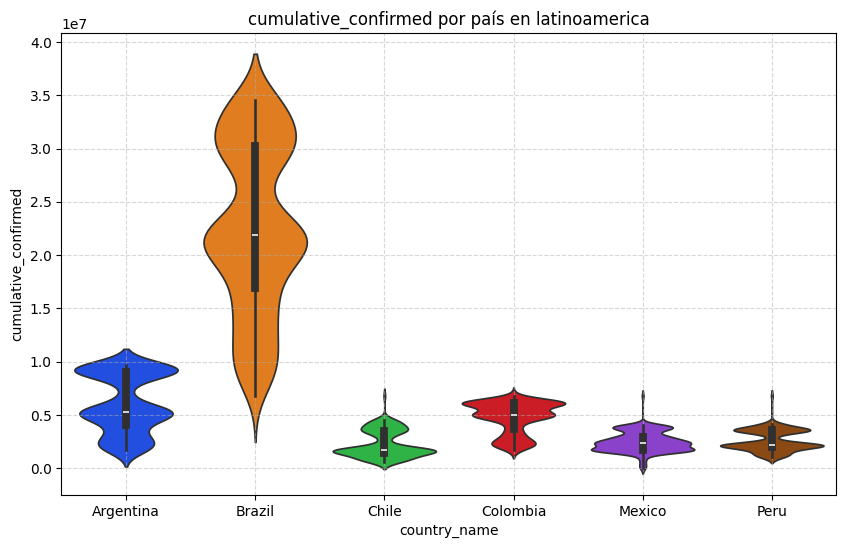

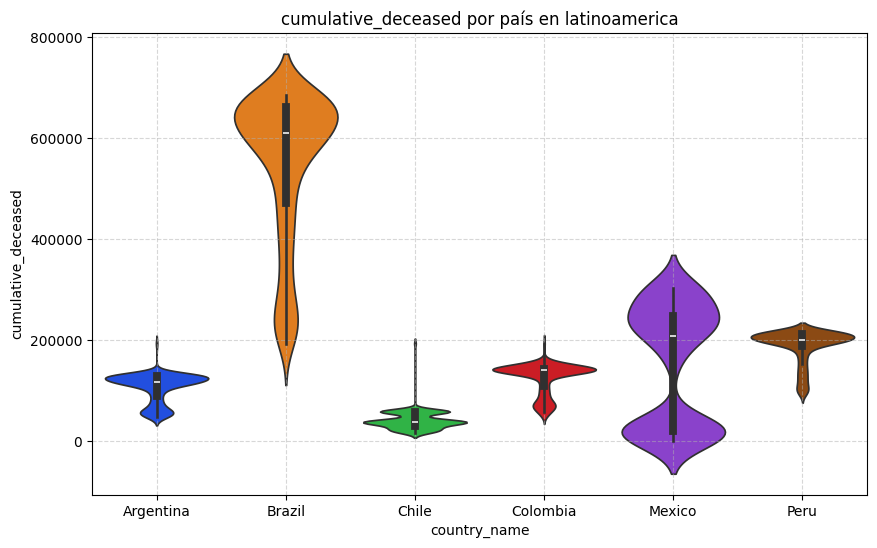

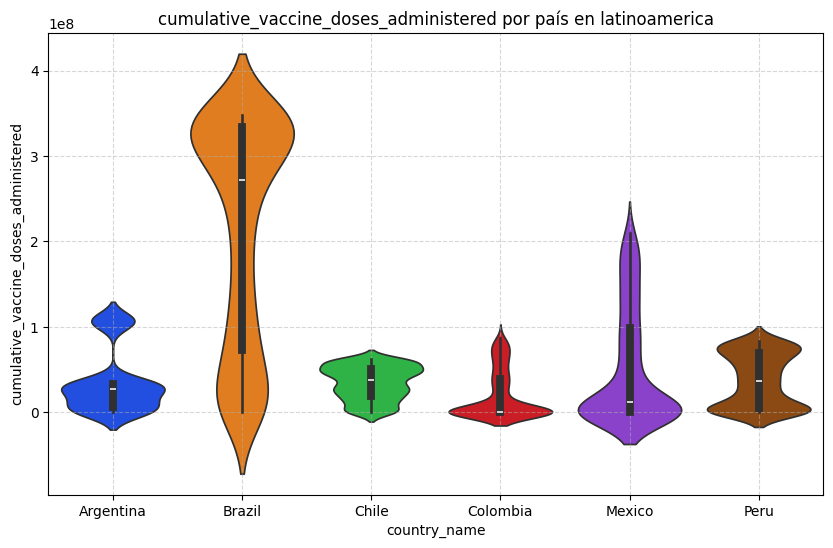

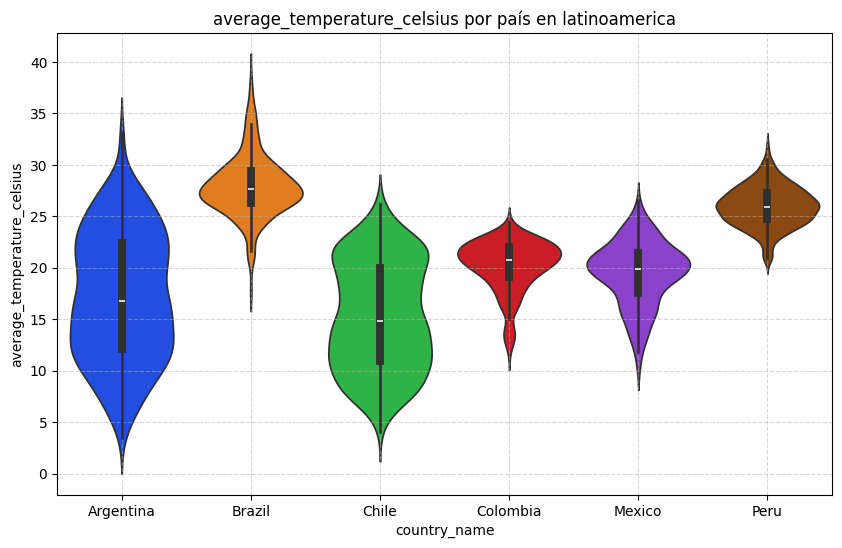

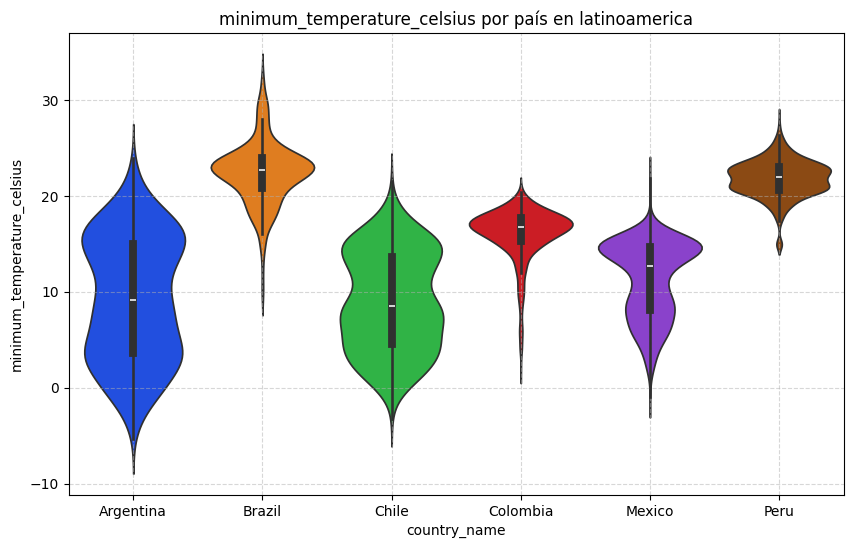

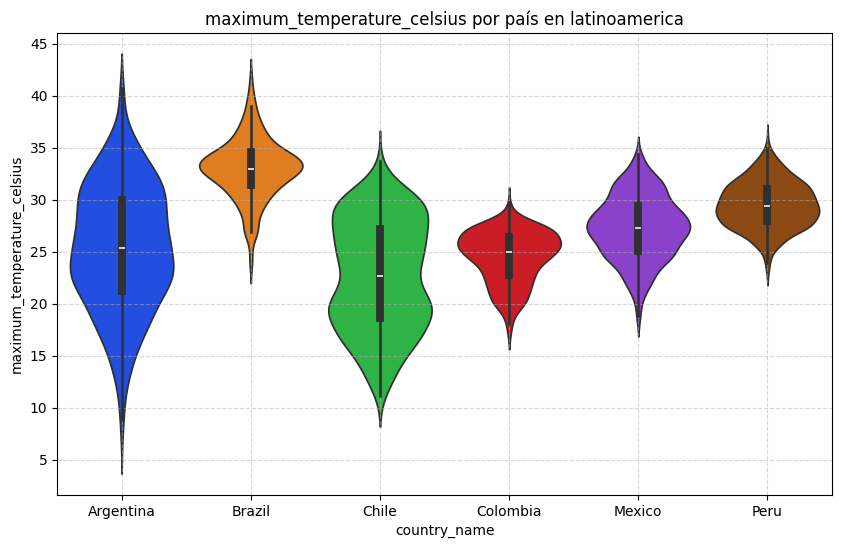

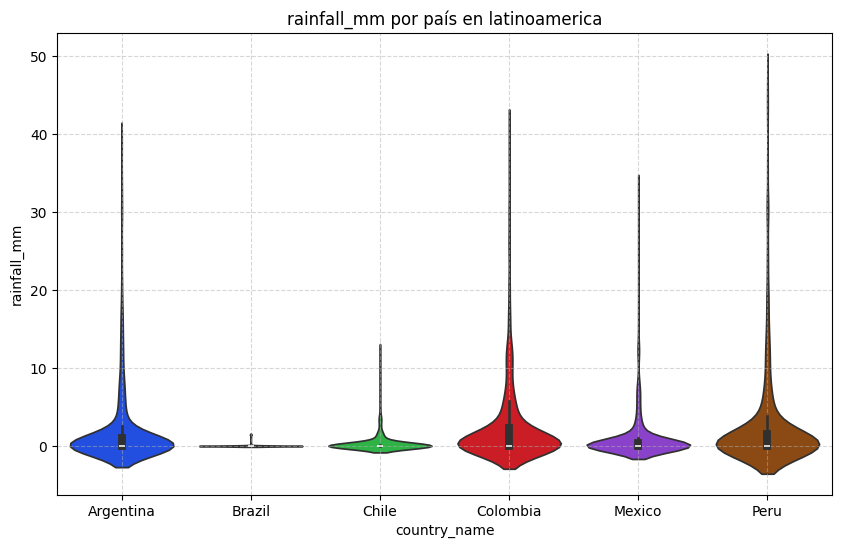

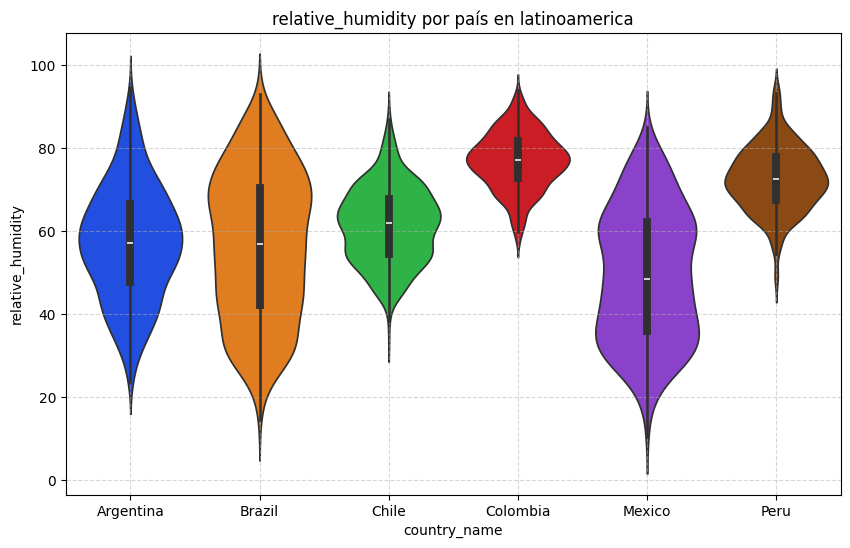

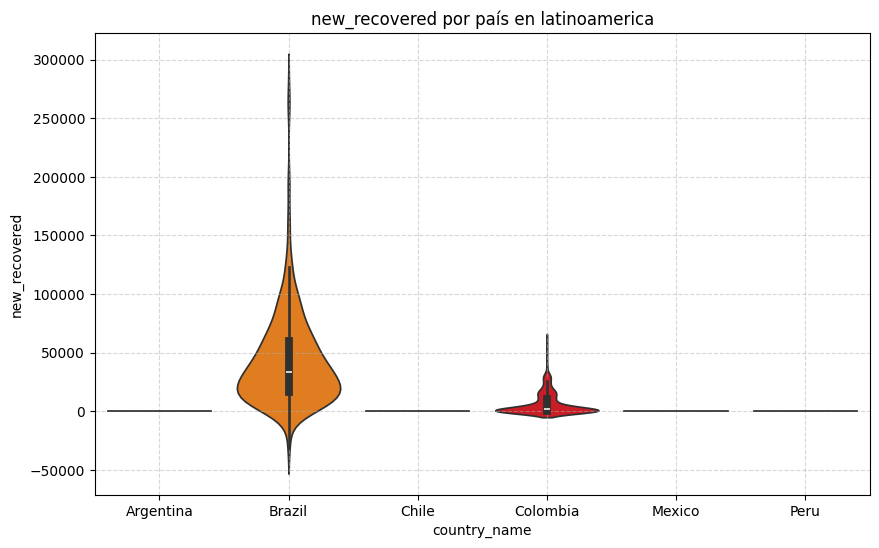

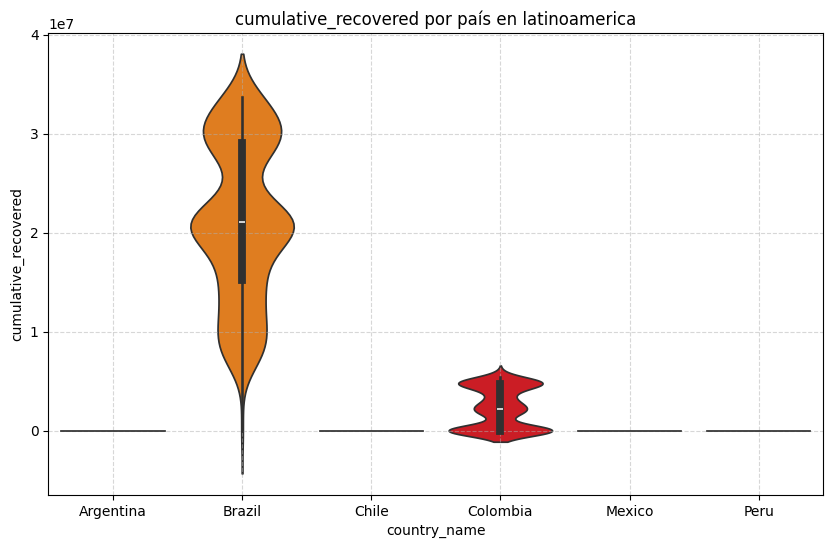

In [ ]:
# violinplot en todos los paises para variables numericas

# el bucle for itera sobre cada columna del df creado anteriormente
for i in data_latinoamerica_paises_mayores_6.columns:

    # establezco como excepciones las columnas que no quiero graficar
    if i not in ['location_key','date','country_code','latitude','longitude','country_name']:

        # entonces, creo la figura (una por cada columna) y el eje
        fig, ax = plt.subplots(figsize=(10, 6))

        # grafico una figura violinplot
        sns.violinplot(x='country_name', y=i, data=data_latinoamerica_paises_mayores_6,hue='country_name')
        plt.title(f'{i} por país en latinoamerica')
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.show()

Procedamos a analizar la distribución de la población por grupos de edad en los paises seleccionados, para tratar de entender como se comporta la población en cada país y en un futuro poder tomar decisiones más acertadas.

In [ ]:
# elegimos las columnas seleccionadas y creamos una lista
cut_columns = ['country_name','population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']

# creamos un df que, dentro del df data_latinoamerica_filtrada toma solo la lista de columnas seleccionadas y las agrupa por pais.
# luego, toma el ultimo registro de cada grupo y ordena los resultados por la población en el rango de 0-9 años de menor a mayor.
last_cases = data_latinoamerica_filtrada[cut_columns].groupby('country_name').last().sort_values(by='population_age_00_09')

# se crea una lista con las columnas de edad
age_columns = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']

# Se seleccionan solo las columnas de edad de los datos filtrados y agrupados, y se suma cada columna, obteniendo el total de personas en cada rango de edad a nivel latinoamericano.
age_distribution = last_cases[age_columns].sum()

# print df
age_distribution

population_age_00_09           72354498.0
population_age_10_19           75821668.0
population_age_20_29           75953404.0
population_age_30_39           72153175.0
population_age_40_49           59596656.0
population_age_50_59           47961620.0
population_age_60_69           32654396.0
population_age_70_79           17789478.0
population_age_80_and_older     8711719.0
dtype: float64

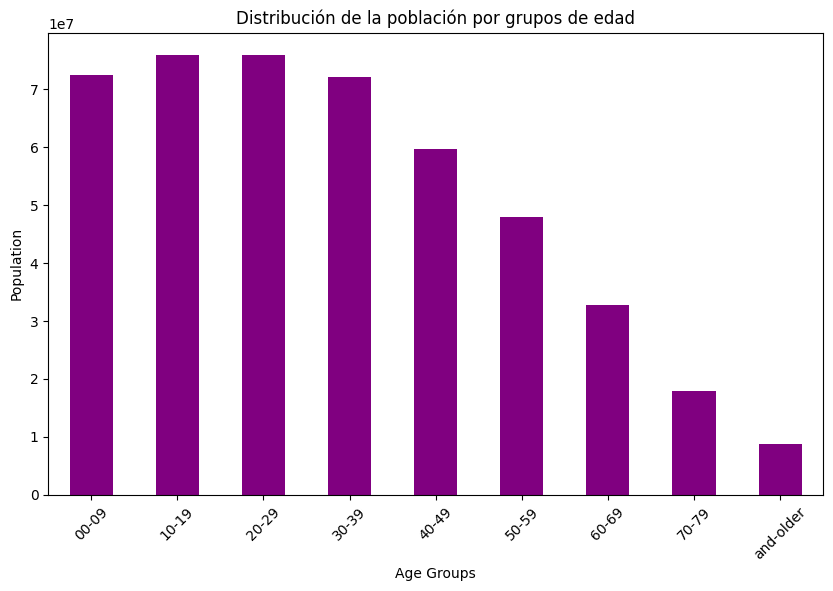

In [ ]:
# Calculamos la distribucion de la poblacion por grupos de edad

# se crea una figura de tamaño 10x6 pulgadas
plt.figure(figsize=(10, 6))

# se crea el grafico de barras sobre la figura
age_distribution.plot(kind='bar', color= 'purple')
plt.xlabel('Age Groups')
plt.ylabel('Population')
plt.title('Distribución de la población por grupos de edad')




#plt.xticks: establecer las etiquetas del eje x
# range(len(age_columns)) obtiene el número de elementos (grupos de edad) en la lista age_columns y crea una lista de números enteros desde 0 hasta el número de grupos de edad menos 1. Esto se utiliza para especificar las posiciones de las etiquetas en el eje x.
# [col.split('_')[-2] + '-' + col.split('_')[-1] for col in age_columns: crea una nueva lista de etiquetas personalizadas
# col.split('_') divide cada nombre de columna en una lista de palabras separadas por guiones bajos.
# [-2] y [-1] acceden a los dos últimos elementos de esta lista, que corresponden a los números del grupo de edad.
# col.split('_')[-2] + '-' + col.split('_')[-1] concatena estos dos números con un guión, creando una etiqueta legible como '00-09'.
# El bucle for col in age_columns itera sobre cada nombre de columna en la lista age_columns y aplica esta operación para crear una etiqueta personalizada para cada grupo de edad.
# rotation=45: las etiquetas del eje x deben rotarse 45 grados para evitar que se superpongan.

plt.xticks(range(len(age_columns)), [col.split('_')[-2] + '-' + col.split('_')[-1] for col in age_columns], rotation=45)

plt.show()

Esta gráfica es interesante porque nos permite ver la población por grupos de edad en cada país, lo que nos puede ayudar a entender cómo se comporta la población y también nos genera la idea de que podríamos graficar la cantidad de vacunas por cada grupo etario.

A continuación se genera un análisis detallado de la cantidad de personas vacunadas por grupo etario.  El objetivo es identificar qué grupos de edad han recibido más dosis de la vacuna a lo largo del tiempo, permitiendo una comparación entre diferentes países y rangos de edad.

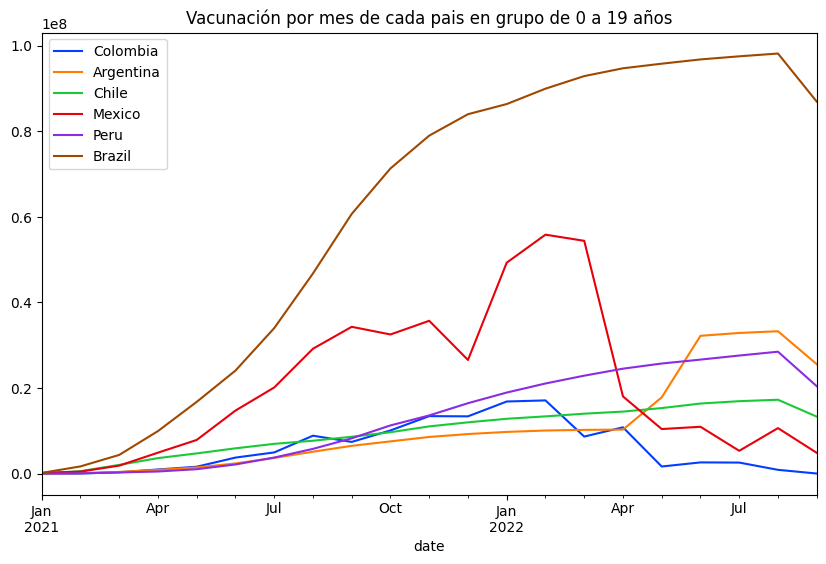

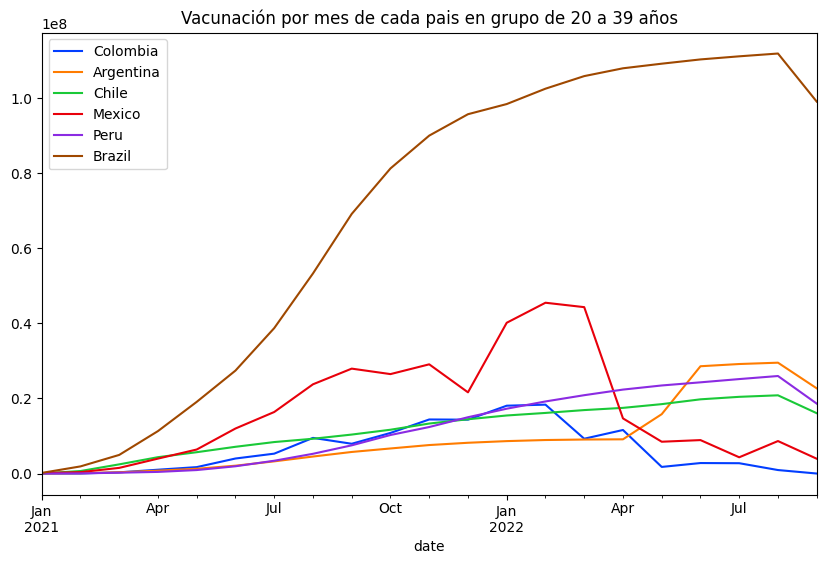

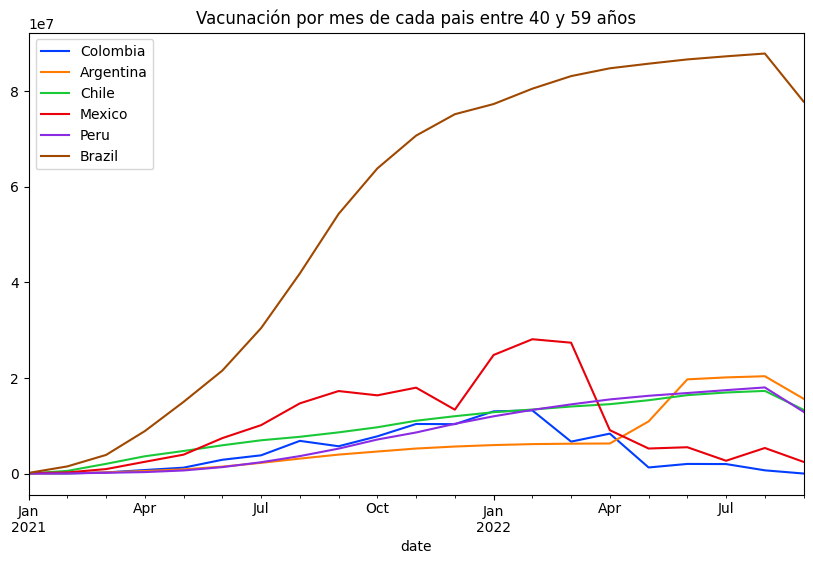

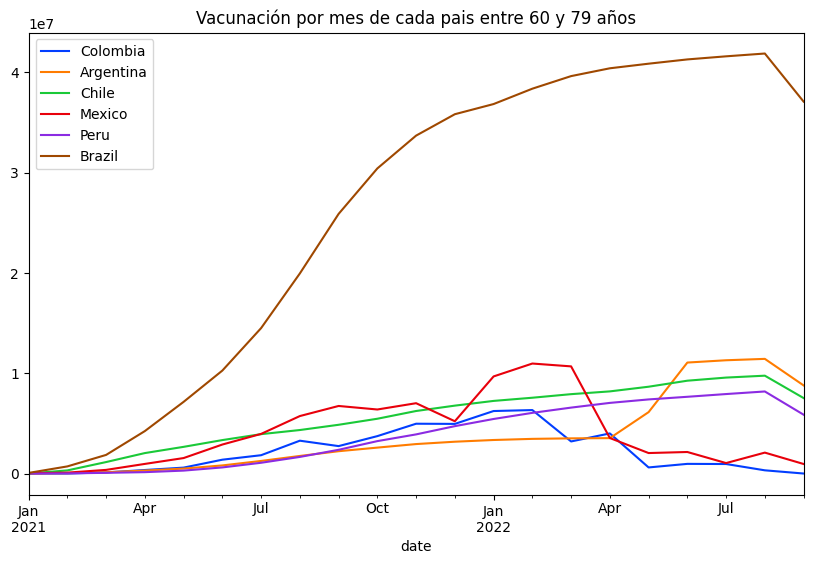

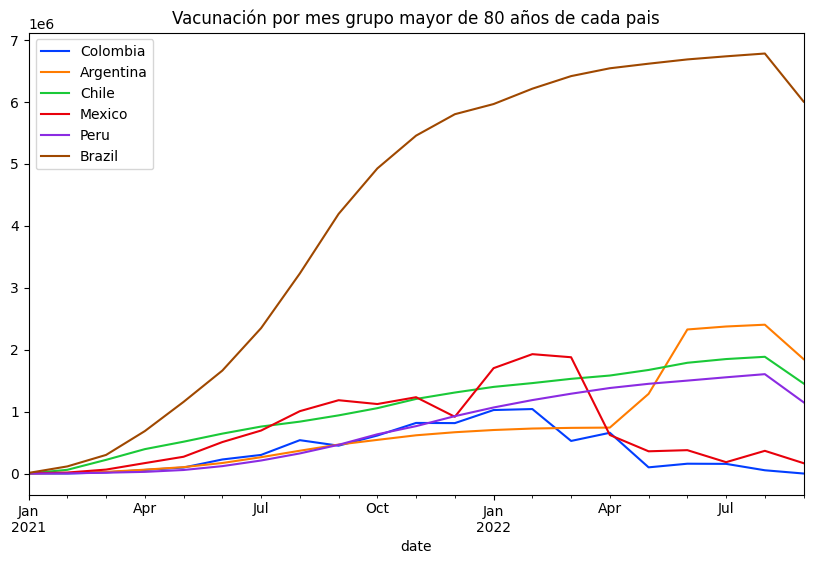

In [ ]:
# Grupo etario mas vacunado

# CREACION DE NUEVOS RANGOS ETARIOS

#creamos nuevas columnas que combinen dos grupos para reducir rangos
data_latinoamerica_filtrada['population_age_00_19']=data_latinoamerica_filtrada['population_age_00_09']+data_latinoamerica_filtrada['population_age_10_19']
data_latinoamerica_filtrada['population_age_20_39']=data_latinoamerica_filtrada['population_age_20_29']+data_latinoamerica_filtrada['population_age_30_39']
data_latinoamerica_filtrada['population_age_40_59']=data_latinoamerica_filtrada['population_age_40_49']+data_latinoamerica_filtrada['population_age_50_59']
data_latinoamerica_filtrada['population_age_60_79']=data_latinoamerica_filtrada['population_age_60_69']+data_latinoamerica_filtrada['population_age_70_79']
data_latinoamerica_filtrada['population_age_80_and_older']=data_latinoamerica_filtrada['population_age_80_and_older']


# CALCULO DE LA CANTIDAD DE VACUNADOS POR GRUPO ETARIO (PROPORCION SOBRE LA CANTIDAD TOTAL DE POBLACUIN)
data_latinoamerica_filtrada['population_age_00_19_vacunados']=data_latinoamerica_filtrada['cumulative_vaccine_doses_administered']*data_latinoamerica_filtrada['population_age_00_19']/data_latinoamerica_filtrada['population']
data_latinoamerica_filtrada['population_age_20_39_vacunados']=data_latinoamerica_filtrada['cumulative_vaccine_doses_administered']*data_latinoamerica_filtrada['population_age_20_39']/data_latinoamerica_filtrada['population']
data_latinoamerica_filtrada['population_age_40_59_vacunados']=data_latinoamerica_filtrada['cumulative_vaccine_doses_administered']*data_latinoamerica_filtrada['population_age_40_59']/data_latinoamerica_filtrada['population']
data_latinoamerica_filtrada['population_age_60_79_vacunados']=data_latinoamerica_filtrada['cumulative_vaccine_doses_administered']*data_latinoamerica_filtrada['population_age_60_79']/data_latinoamerica_filtrada['population']
data_latinoamerica_filtrada['population_age_80_and_older_vacunados']=data_latinoamerica_filtrada['cumulative_vaccine_doses_administered']*data_latinoamerica_filtrada['population_age_80_and_older']/data_latinoamerica_filtrada['population']

# RELLENO VALORES FALTANTES CON 0 PARA EVITAR PROBLEMAS DURANTE EL ANALISIS
data_latinoamerica_filtrada['population_age_00_19_vacunados']=data_latinoamerica_filtrada['population_age_00_19_vacunados'].fillna(0)
data_latinoamerica_filtrada['population_age_20_39_vacunados']=data_latinoamerica_filtrada['population_age_20_39_vacunados'].fillna(0)
data_latinoamerica_filtrada['population_age_40_59_vacunados']=data_latinoamerica_filtrada['population_age_40_59_vacunados'].fillna(0)
data_latinoamerica_filtrada['population_age_60_79_vacunados']=data_latinoamerica_filtrada['population_age_60_79_vacunados'].fillna(0)
data_latinoamerica_filtrada['population_age_80_and_older_vacunados']=data_latinoamerica_filtrada['population_age_80_and_older_vacunados'].fillna(0)


# CONVIERTO A ENTEROS PORQUE SON PERSONAS
data_latinoamerica_filtrada['population_age_00_19_vacunados']=data_latinoamerica_filtrada['population_age_00_19_vacunados'].astype(int)
data_latinoamerica_filtrada['population_age_20_39_vacunados']=data_latinoamerica_filtrada['population_age_20_39_vacunados'].astype(int)
data_latinoamerica_filtrada['population_age_40_59_vacunados']=data_latinoamerica_filtrada['population_age_40_59_vacunados'].astype(int)
data_latinoamerica_filtrada['population_age_60_79_vacunados']=data_latinoamerica_filtrada['population_age_60_79_vacunados'].astype(int)
data_latinoamerica_filtrada['population_age_80_and_older_vacunados']=data_latinoamerica_filtrada['population_age_80_and_older_vacunados'].astype(int)

#SUMA POR COLUMNA
data_latinoamerica_filtrada['population_age_00_19_vacunados'].sum()
data_latinoamerica_filtrada['population_age_20_39_vacunados'].sum()
data_latinoamerica_filtrada['population_age_40_59_vacunados'].sum()
data_latinoamerica_filtrada['population_age_60_79_vacunados'].sum()
data_latinoamerica_filtrada['population_age_80_and_older_vacunados'].sum()

# Grafica de valores medios de todos los paises cumulative_vaccine_doses_administered

fig, ax = plt.subplots(figsize=(10, 6))

for pais in paises_seleccionados:

    # creamos un gráfico de línea que muestra la evolución del promedio de personas vacunadas en el grupo de edad para cada país, agrupados por mes.
    data_latinoamerica_filtrada[data_latinoamerica_filtrada['country_name']==pais].resample('M').mean(numeric_only=True)['population_age_00_19_vacunados'].plot()

plt.title('Vacunación por mes de cada pais en grupo de 0 a 19 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
     # creamos un gráfico de línea que muestra la evolución del promedio de personas vacunadas en el grupo de edad para cada país, agrupados por mes.
    data_latinoamerica_filtrada[data_latinoamerica_filtrada['country_name']==pais].resample('M').mean(numeric_only=True)['population_age_20_39_vacunados'].plot()

plt.title('Vacunación por mes de cada pais en grupo de 20 a 39 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
     # creamos un gráfico de línea que muestra la evolución del promedio de personas vacunadas en el grupo de edad para cada país, agrupados por mes.
    data_latinoamerica_filtrada[data_latinoamerica_filtrada['country_name']==pais].resample('M').mean(numeric_only=True)['population_age_40_59_vacunados'].plot()

plt.title('Vacunación por mes de cada pais entre 40 y 59 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
     # creamos un gráfico de línea que muestra la evolución del promedio de personas vacunadas en el grupo de edad para cada país, agrupados por mes.
    data_latinoamerica_filtrada[data_latinoamerica_filtrada['country_name']==pais].resample('M').mean(numeric_only=True)['population_age_60_79_vacunados'].plot()

plt.title('Vacunación por mes de cada pais entre 60 y 79 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
     # creamos un gráfico de línea que muestra la evolución del promedio de personas vacunadas en el grupo de edad para cada país, agrupados por mes.
    data_latinoamerica_filtrada[data_latinoamerica_filtrada['country_name']==pais].resample('M').mean(numeric_only=True)['population_age_80_and_older_vacunados'].plot()

plt.title('Vacunación por mes grupo mayor de 80 años de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

Utilizamos gráficos de líneas para visualizar las tendencias de vacunación mensual en cada grupo etario, permitiendo identificar los picos de vacunación y cómo varía la administración entre países y períodos de tiempo.
Se puede observar que Chile presenta una tendencia más lineal en la administración de vacunas, con un crecimiento constante y sostenido en todos los grupos etarios. A diferencia de otros países, donde las campañas de vacunación han mostrado fluctuaciones, en Chile se evidencia una continuidad en las dosis administradas a lo largo del tiempo. Esta estabilidad en la campaña de vacunación podría ser una de las razones por las cuales Chile ha logrado manejar mejor la pandemia en comparación con otros países de la región, minimizando los picos de mortalidad y reduciendo el impacto en el sistema de salud.

Revisemos la mortalidad por genero para identificar la población más vulnerable en cada país, con esto ya podriamos tener una idea de cuál serían la población a vacunar primero.

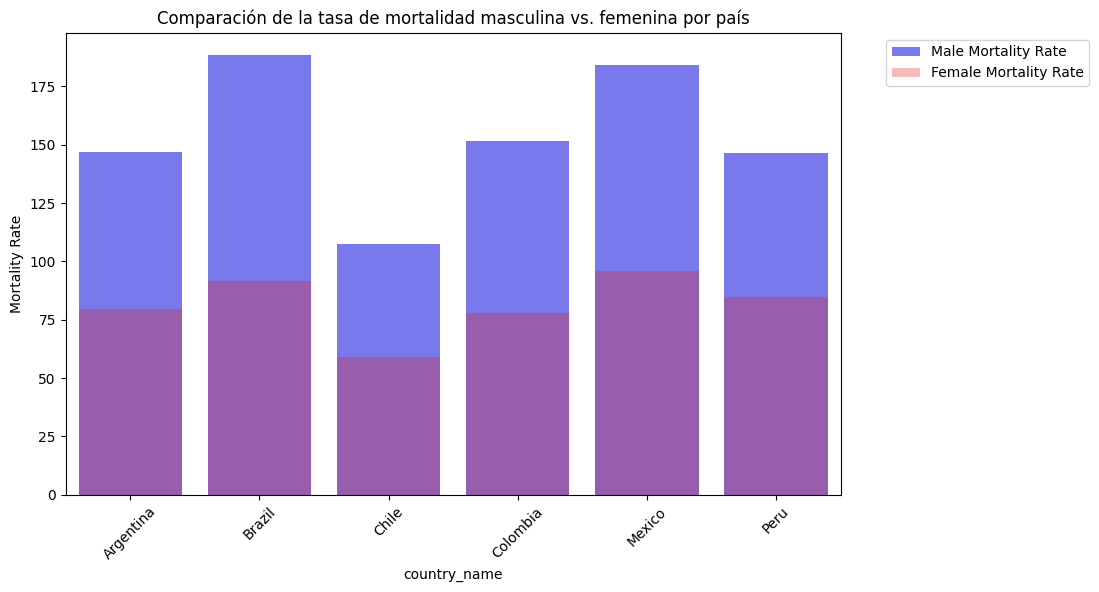

In [ ]:
# Grafica de mortalidad por genero. Tasa de Mortalidad entendida en Cantidad de muertes cada 1.000.000 de habitantes

# CREAMOS LA FIGURA
plt.figure(figsize=(10, 6))

# GRAFICO DE BARRAS QUE PERMITE COMPARAR LAS TASAS MASCULINA Y FEMENINA
sns.barplot(data=data_latinoamerica_filtrada, x='country_name', y='adult_male_mortality_rate', color='blue', alpha=0.6, label='Male Mortality Rate')
sns.barplot(data=data_latinoamerica_filtrada, x='country_name', y='adult_female_mortality_rate', color='red', alpha=0.3, label='Female Mortality Rate')
plt.xticks(rotation=45)
plt.ylabel('Mortality Rate')
plt.title('Comparación de la tasa de mortalidad masculina vs. femenina por país')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

De acuerdo a la gráfica de mortalidad, se puede observar que en todos los paises la cantidad de muertes es **mayor en los hombres** que en las mujeres, por lo que se podría decir que los hombres son más vulnerables a la enfermedad o están menos protegidos.

En muchos casos, las comorbilidades juegan un papel crucial en la vulnerabilidad de las personas al virus, agravando los síntomas y aumentando las probabilidades de fallecimiento.


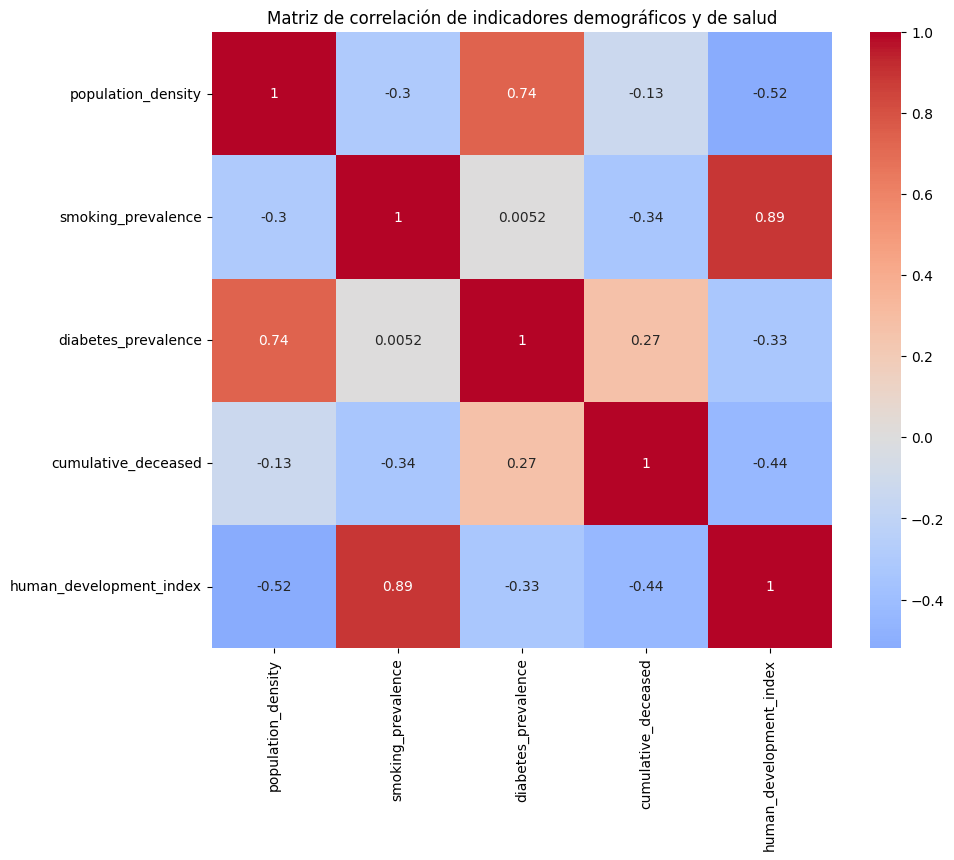

In [ ]:
# Selecciono las variables númericas que quiero correlacionar
columns = ['population_density', 'smoking_prevalence', 'diabetes_prevalence', 'cumulative_deceased', 'human_development_index']

# CREO LA MATRIZ DE CORRELACION
correlation_matrix = data_latinoamerica_filtrada[columns].corr()

# CREO LA FIGURA
plt.figure(figsize=(10, 8))

# CREO EL MAPA DE CALOR CON LA MATRIZ DE CORRELACION CREADA ANTERIORMENTE
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
# center=0: Indica que el color central del mapa de calor debe corresponder al valor 0 de correlación.

plt.title('Matriz de correlación de indicadores demográficos y de salud')
plt.show()

De esta matriz podemos observar que el fumar y tener diabetes son las enfermedades preexistentes que más afectan a la población en los paises seleccionados, por lo que se podría decir que estas enfermedades son las que más han causado muertes en los paises seleccionados, sin embargo esto no quiere decir que sean las únicas enfermedades que han causado muertes sino que son las más comúnes.
1. population_density tiene una correlación *positiva fuerte* con la prevalencia de diabetes (0.74), lo que sugiere que en áreas con mayor densidad poblacional también hay una mayor prevalencia de diabetes.
2. human_development_index tiene una correlación *positiva muy fuerte* con la prevalencia de tabaquismo (0.89).  
De acuerdo a esto veamos se comporta la mortalidad en los paises seleccionados por enfermedades preexistentes o comorbilidades.

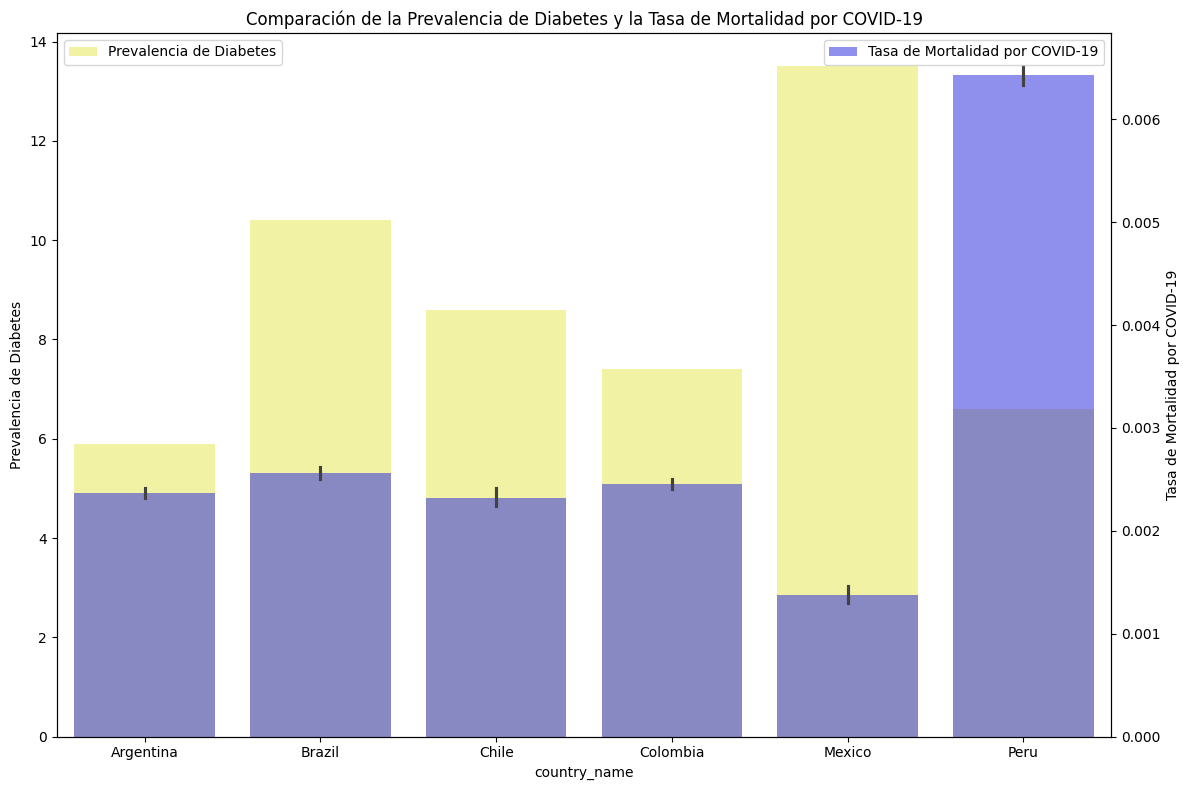

In [ ]:
# creamos UN grafico con .suplots usando dos ejes 'y' superpuestos, lo que permite mostrar ambas variables en el mismo gráfico aunque tengan escalas diferentes.

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

sns.barplot(data=data_latinoamerica_filtrada,
            x= data_latinoamerica_filtrada['country_name'],
            y= data_latinoamerica_filtrada['diabetes_prevalence'],
            color='yellow',
            label='Prevalencia de Diabetes',
            ax=ax, # Especifica que este gráfico se debe dibujar en el eje principal ax.
            alpha=0.4 # TRANSPARENCIA
)

ax2 = ax.twinx() # Crea un segundo eje y superpuesto al primero. Esto permite agregar otra variable en el gráfico con una escala distinta en el eje y, mientras que el eje x (los países) sigue siendo el mismo.

sns.barplot(data=data_latinoamerica_filtrada,
            x= data_latinoamerica_filtrada['country_name'],
            y= data_latinoamerica_filtrada['cumulative_deceased'] / data_latinoamerica_filtrada['population'],
            color='Blue',
            label='Tasa de Mortalidad por COVID-19',
            ax=ax2,
            alpha=0.5)

plt.xticks(rotation=90)
ax.set_ylabel('Prevalencia de Diabetes')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')
plt.title('Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad por COVID-19')
plt.tight_layout() # Ajusta los elementos del gráfico para evitar que se solapen o corten, asegurando que todo el contenido sea visible y esté bien organizado.
plt.show()

1. *Prevalencia de diabetes (amarillo)*:
   - *México* tiene la prevalencia más alta de diabetes, seguido de *Brasil* y *Chile*.
   - *Argentina* tiene la prevalencia de diabetes más baja en este conjunto de países.

2. *Tasa de mortalidad por COVID-19 (azul)*:
   - *Perú* muestra la tasa de mortalidad por COVID-19 más alta en comparación con otros países, a pesar de no tener la prevalencia de diabetes más alta
   -*México* tiene una alta prevalencia de diabetes, pero su tasa de mortalidad por COVID-19 no es la más alta (en comparación con Perú).

- En general, no parece haber una relación directa entre la *prevalencia de diabetes* y la *tasa de mortalidad por COVID-19.


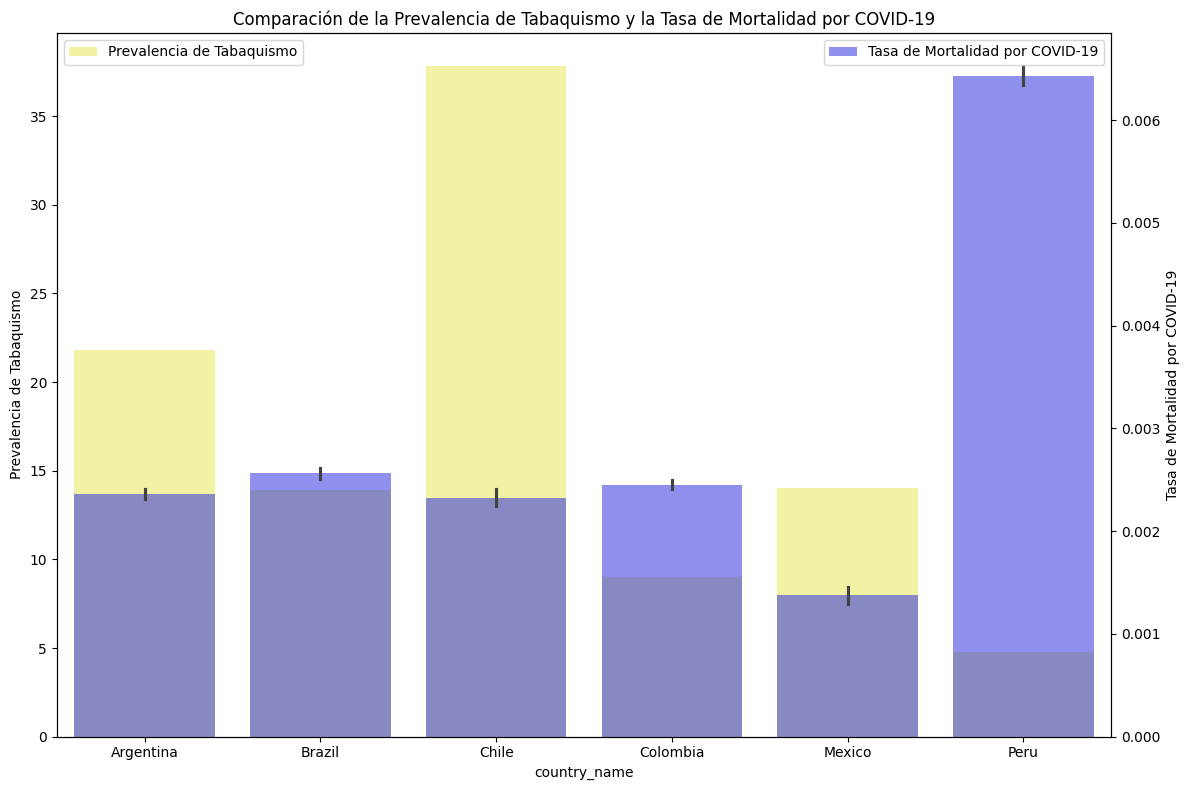

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

sns.barplot(data=data_latinoamerica_filtrada,
            x= data_latinoamerica_filtrada['country_name'],
            y= data_latinoamerica_filtrada['smoking_prevalence'],
            color='yellow',
            label='Prevalencia de Tabaquismo',
            ax=ax,
            alpha=0.4)

ax2 = ax.twinx()
# Crea un segundo eje y superpuesto al primero. Esto permite agregar otra variable en el gráfico con una escala distinta en el eje y, mientras que el eje x (los países) sigue siendo el mismo.

sns.barplot(data=data_latinoamerica_filtrada,
            x= data_latinoamerica_filtrada['country_name'],
            y= data_latinoamerica_filtrada['cumulative_deceased'] / data_latinoamerica_filtrada['population'],
            color='Blue',
            label='Tasa de Mortalidad por COVID-19',
            ax=ax2,
            alpha=0.5)

plt.xticks(rotation=90)
ax.set_ylabel('Prevalencia de Tabaquismo')
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Comparación de la Prevalencia de Tabaquismo y la Tasa de Mortalidad por COVID-19')
plt.tight_layout()
plt.show()

El análisis muestra que las dos enfermedades preexistentes consideradas, diabetes y tabaquismo, presentan un comportamiento similar en los países seleccionados. Sin embargo, se observa que la diabetes ha sido la comorbilidad más relacionada con las muertes en estos países, seguida del tabaquismo.

Como conclusión preliminar, podemos afirmar que Brasil, México y Colombia son los países que requieren mayor atención. Estos países han registrado el mayor número de casos confirmados y decesos relacionados con COVID-19, además de ser los que han administrado menos dosis de vacunas en relación con su población.

Entre las enfermedades preexistentes que más han afectado a la población, destacan el tabaquismo y la diabetes, lo que sugiere que estas condiciones han contribuido de manera significativa a las tasas de mortalidad. No obstante, es importante aclarar que, aunque estos son los factores más comunes en los datos disponibles, no son las únicas enfermedades que han provocado muertes en la región.

# AVANCE 3

In [ ]:
import os

In [ ]:
data_latinoamerica_paises.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5946 entries, 0 to 10253876
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           5946 non-null   object 
 1   date                                   5946 non-null   object 
 2   country_code                           5946 non-null   object 
 3   country_name                           5946 non-null   object 
 4   new_confirmed                          5925 non-null   float64
 5   new_deceased                           5925 non-null   float64
 6   cumulative_confirmed                   5925 non-null   float64
 7   cumulative_deceased                    5925 non-null   float64
 8   cumulative_vaccine_doses_administered  3173 non-null   float64
 9   population                             5946 non-null   float64
 10  population_male                        5946 non-null   float64
 11  popul

In [ ]:
data_latinoamerica_paises["date"] = pd.to_datetime(data_latinoamerica_paises["date"])
data_latinoamerica_paises = data_latinoamerica_paises.set_index("date")
data_latinoamerica_paises

<ipython-input-51-7be7eddbbd89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises["date"] = pd.to_datetime(data_latinoamerica_paises["date"])


location_key country_code country_name  new_confirmed  \
date                                                               
2020-01-01           AR           AR    Argentina            3.0   
2020-01-02           AR           AR    Argentina           14.0   
2020-01-03           AR           AR    Argentina            3.0   
2020-01-04           AR           AR    Argentina            7.0   
2020-01-05           AR           AR    Argentina            5.0   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru         1150.0   
2022-09-14           PE           PE         Peru            NaN   
2022-09-15           PE           PE         Peru            NaN   
2022-09-16           PE           PE         Peru            NaN   
2022-09-17           PE           PE         Peru            NaN   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2020-01-01           0.0                   3.0                  0.0   
2020-01-02           0.0                  17.0                  0.0   
2020-01-03           0.0                  20.0                  0.0   
2020-01-04           0.0                  27.0                  0.0   
2020-01-05           0.0                  32.0                  0.0   
...                  ...                   ...                  ...   
2022-09-13          22.0             4127612.0             216173.0   
2022-09-14           NaN                   NaN                  NaN   
2022-09-15           NaN                   NaN                  NaN   
2022-09-16           NaN                   NaN                  NaN   
2022-09-17           NaN                   NaN                  NaN   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2020-01-01                                    NaN  44938712.0   
2020-01-02                                    NaN  44938712.0   
2020-01-03                                    NaN  44938712.0   
2020-01-04                                    NaN  44938712.0   
2020-01-05                                    NaN  44938712.0   
...                                           ...         ...   
2022-09-13                                    NaN  29381884.0   
2022-09-14                                    NaN  29381884.0   
2022-09-15                                    NaN  29381884.0   
2022-09-16                                    NaN  29381884.0   
2022-09-17                                    NaN  29381884.0   

            population_male  ...  population_largest_city  area_rural_sq_km  \
date                         ...                                              
2020-01-01       19523766.0  ...               15057273.0         2690269.0   
2020-01-02       19523766.0  ...               15057273.0         2690269.0   
2020-01-03       19523766.0  ...               15057273.0         2690269.0   
2020-01-04       19523766.0  ...               15057273.0         2690269.0   
2020-01-05       19523766.0  ...               15057273.0         2690269.0   
...                     ...  ...                      ...               ...   
2022-09-13       14450757.0  ...               10554712.0         1256339.0   
2022-09-14       14450757.0  ...               10554712.0         1256339.0   
2022-09-15       14450757.0  ...               10554712.0         1256339.0   
2022-09-16       14450757.0  ...               10554712.0         1256339.0   
2022-09-17       14450757.0  ...               10554712.0         1256339.0   

            area_urban_sq_km  life_expectancy  adult_male_mortality_rate  \
date                                                                       
2020-01-01           55032.0           76.520                    147.086   
2020-01-02           55032.0           76.520                    147.086   
2020-01-03           550

In [ ]:
#dentro del df data_latinoamerica_paises creo la columna week, accediendo al indice que estableci previamente (fecha) tomando solo el numero de semana del año
data_latinoamerica_paises['week'] = data_latinoamerica_paises.index.isocalendar().week
data_latinoamerica_paises

location_key country_code country_name  new_confirmed  \
date                                                               
2020-01-01           AR           AR    Argentina            3.0   
2020-01-02           AR           AR    Argentina           14.0   
2020-01-03           AR           AR    Argentina            3.0   
2020-01-04           AR           AR    Argentina            7.0   
2020-01-05           AR           AR    Argentina            5.0   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru         1150.0   
2022-09-14           PE           PE         Peru            NaN   
2022-09-15           PE           PE         Peru            NaN   
2022-09-16           PE           PE         Peru            NaN   
2022-09-17           PE           PE         Peru            NaN   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2020-01-01           0.0                   3.0                  0.0   
2020-01-02           0.0                  17.0                  0.0   
2020-01-03           0.0                  20.0                  0.0   
2020-01-04           0.0                  27.0                  0.0   
2020-01-05           0.0                  32.0                  0.0   
...                  ...                   ...                  ...   
2022-09-13          22.0             4127612.0             216173.0   
2022-09-14           NaN                   NaN                  NaN   
2022-09-15           NaN                   NaN                  NaN   
2022-09-16           NaN                   NaN                  NaN   
2022-09-17           NaN                   NaN                  NaN   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2020-01-01                                    NaN  44938712.0   
2020-01-02                                    NaN  44938712.0   
2020-01-03                                    NaN  44938712.0   
2020-01-04                                    NaN  44938712.0   
2020-01-05                                    NaN  44938712.0   
...                                           ...         ...   
2022-09-13                                    NaN  29381884.0   
2022-09-14                                    NaN  29381884.0   
2022-09-15                                    NaN  29381884.0   
2022-09-16                                    NaN  29381884.0   
2022-09-17                                    NaN  29381884.0   

            population_male  ...  area_rural_sq_km  area_urban_sq_km  \
date                         ...                                       
2020-01-01       19523766.0  ...         2690269.0           55032.0   
2020-01-02       19523766.0  ...         2690269.0           55032.0   
2020-01-03       19523766.0  ...         2690269.0           55032.0   
2020-01-04       19523766.0  ...         2690269.0           55032.0   
2020-01-05       19523766.0  ...         2690269.0           55032.0   
...                     ...  ...               ...               ...   
2022-09-13       14450757.0  ...         1256339.0           16425.0   
2022-09-14       14450757.0  ...         1256339.0           16425.0   
2022-09-15       14450757.0  ...         1256339.0           16425.0   
2022-09-16       14450757.0  ...         1256339.0           16425.0   
2022-09-17       14450757.0  ...         1256339.0           16425.0   

            life_expectancy  adult_male_mortality_rate  \
date                                                     
2020-01-01           76.520                    147.086   
2020-01-02           76.520                    147.086   
2020-01-03           76.520                    147.086   
2020-01-04           76.520                    147.086   
2020-01-05           76.520                    147.086   
...          

Como primera aproximación vamos a realizar un análisis del comportamiento de manera semanal y anual, para esto vamos a agrupar los datos por semana y por año.

.loc me permite filtrar datos por condiciones logicas

In [ ]:
# creamos un df con los datos SOLO de 2021
data_latinoamerica_paises_2021 = data_latinoamerica_paises.loc[
    (data_latinoamerica_paises.index >= '2021-01-01') &
    (data_latinoamerica_paises.index <= '2021-12-31')
]
data_latinoamerica_paises_2021

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-01           AR           AR    Argentina         2685.0   
2021-01-02           AR           AR    Argentina         7767.0   
2021-01-03           AR           AR    Argentina         4934.0   
2021-01-04           AR           AR    Argentina        13953.0   
2021-01-05           AR           AR    Argentina        14085.0   
...                 ...          ...          ...            ...   
2021-12-27           PE           PE         Peru         3261.0   
2021-12-28           PE           PE         Peru         4270.0   
2021-12-29           PE           PE         Peru         4340.0   
2021-12-30           PE           PE         Peru         5220.0   
2021-12-31           PE           PE         Peru         4290.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-01         140.0             1662867.0              46522.0   
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   
...                  ...                   ...                  ...   
2021-12-27          29.0             2285854.0             202515.0   
2021-12-28          37.0             2290124.0             202552.0   
2021-12-29          40.0             2294464.0             202592.0   
2021-12-30          45.0             2299684.0             202637.0   
2021-12-31          37.0             2303974.0             202674.0   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-01                                18849.0  44938712.0   
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
...                                           ...         ...   
2021-12-27                             50186253.0  29381884.0   
2021-12-28                             50515554.0  29381884.0   
2021-12-29                             50800766.0  29381884.0   
2021-12-30                             51020490.0  29381884.0   
2021-12-31                             51092425.0  29381884.0   

            population_male  ...  area_rural_sq_km  area_urban_sq_km  \
date                         ...                                       
2021-01-01       19523766.0  ...         2690269.0           55032.0   
2021-01-02       19523766.0  ...         2690269.0           55032.0   
2021-01-03       19523766.0  ...         2690269.0           55032.0   
2021-01-04       19523766.0  ...         2690269.0           55032.0   
2021-01-05       19523766.0  ...         2690269.0           55032.0   
...                     ...  ...               ...               ...   
2021-12-27       14450757.0  ...         1256339.0           16425.0   
2021-12-28       14450757.0  ...         1256339.0           16425.0   
2021-12-29       14450757.0  ...         1256339.0           16425.0   
2021-12-30       14450757.0  ...         1256339.0           16425.0   
2021-12-31       14450757.0  ...         1256339.0           16425.0   

            life_expectancy  adult_male_mortality_rate  \
date                                                     
2021-01-01           76.520                    147.086   
2021-01-02           76.520                    147.086   
2021-01-03           76.520                    147.086   
2021-01-04           76.520                    147.086   
2021-01-05           76.520                    147.086   
...          

In [ ]:
# creamos un df en base al df filtrado por 2021, que agrupa por pais y por semana del año, seleccionado solo las columnas new confirmed y new deceased para calcular el numero total de nuevos casos confirmados y muertes
# Se restaura el índice para tener un DataFrame más manejable.
casos_semanales = data_latinoamerica_paises_2021.groupby(['country_name', 'week'])[['new_confirmed','new_deceased']].sum().reset_index()

casos_semanales

country_name  week  new_confirmed  new_deceased
0      Argentina     1        85321.0        1093.0
1      Argentina     2        76129.0        1191.0
2      Argentina     3        66250.0        1321.0
3      Argentina     4        58524.0        1199.0
4      Argentina     5        50576.0        1112.0
..           ...   ...            ...           ...
313         Peru    49        10004.0         272.0
314         Peru    50        10637.0         265.0
315         Peru    51        11306.0         257.0
316         Peru    52        21381.0         188.0
317         Peru    53         4082.0         529.0

[318 rows x 4 columns]

In [ ]:
# identifico los paises unicos presentes en el df
casos_semanales['country_name'].unique()

array(['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru'],
      dtype=object)

In [ ]:
import warnings

# Ignorar todos los warnings
warnings.filterwarnings("ignore")

Analizaremos cómo evolucionan los casos de COVID-19 en América Latina a lo largo del tiempo por semana

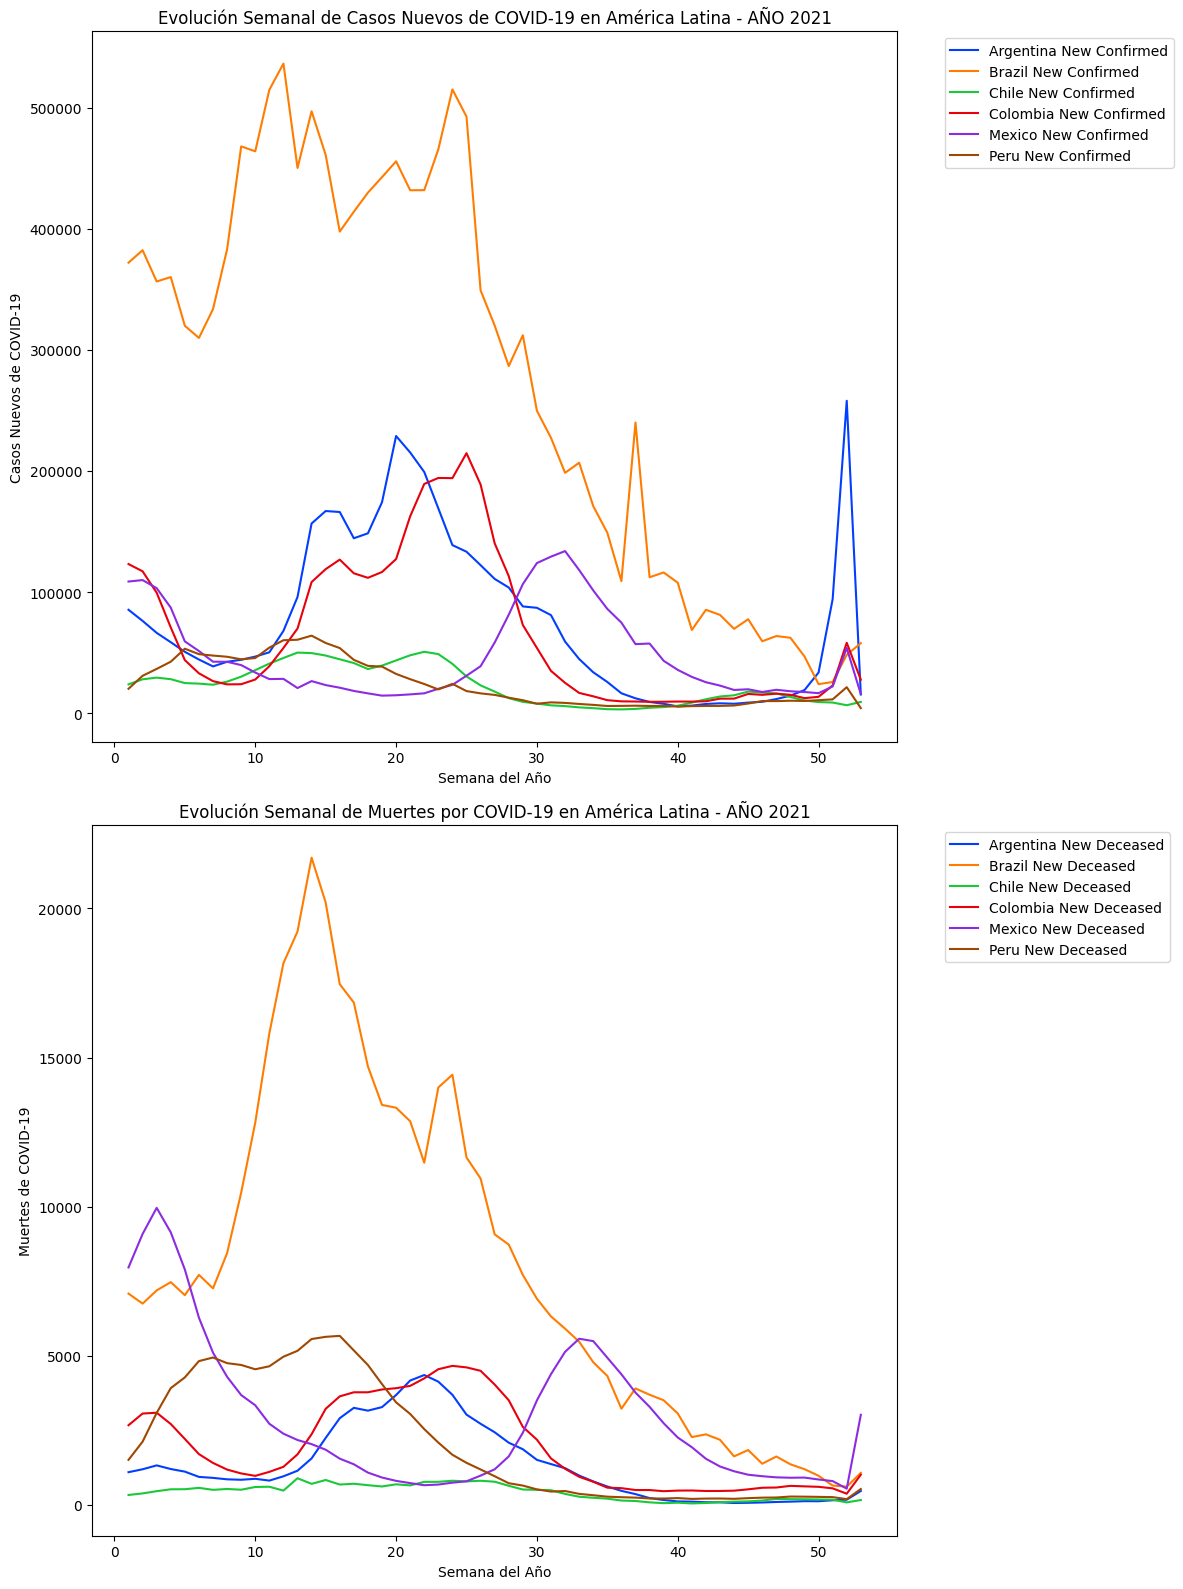

In [ ]:
# creo la figura con 1 columna y dos filas
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12, 16))

# el ciclo for itera por cada pais en la columna "pais" del df casos semanales, extrayendo los valores unicos de la columna
for country in casos_semanales['country_name'].unique():
    #
    casos_semanales_por_pais = casos_semanales[casos_semanales['country_name'] == country]
    ax[0].plot(casos_semanales_por_pais['week'], casos_semanales_por_pais['new_confirmed'], label=f'{country} New Confirmed')
    ax[1].plot(casos_semanales_por_pais['week'], casos_semanales_por_pais['new_deceased'], label=f'{country} New Deceased')

ax[0].set_xlabel("Semana del Año")
ax[0].set_ylabel("Casos Nuevos de COVID-19")
ax[0].set_title("Evolución Semanal de Casos Nuevos de COVID-19 en América Latina - AÑO 2021")
ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax[1].set_xlabel("Semana del Año")
ax[1].set_ylabel("Muertes de COVID-19")
ax[1].set_title("Evolución Semanal de Muertes por COVID-19 en América Latina - AÑO 2021")
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout() # ajusta automáticamente el espacio entre los elementos de una gráfica para que no se superpongan y queden bien alineados dentro de la figura.
plt.show()

En el análisis de los casos nuevos de COVID-19 en América Latina durante el año 2021, se observa una tendencia inicial de disminución en casi todos los países hasta la décima semana. Posteriormente, hacia la mitad del año, alrededor de la semana 20, casi todos los países experimentaron un aumento significativo en los contagios, con excepción de Brasil, que mostró una tendencia más gradual y, alrededor de la semana 30, comenzó a descender. Sin embargo, Brasil tuvo un nuevo incremento hacia el final del año, posiblemente vinculado a factores estacionales y sociales, como el clima y las festividades de fin de año.

En cuanto a las muertes, México muestra un comportamiento inusual, con un pico pronunciado en las primeras 10 semanas del año, seguido de un descenso continuo hasta la semana 30, para luego experimentar dos picos adicionales. En contraste, el resto de los países tuvieron, en su mayoría, un solo pico de mortalidad entre las semanas 20 y 30. Brasil y Perú presentaron las tasas de mortalidad más altas en el periodo, con un pico muy marcado al inicio del año. Esto podría deberse a una combinación de factores como la disponibilidad de vacunas, las variantes del virus y las medidas implementadas en cada país.


Seguidamente, realizaremos un análisis mensual

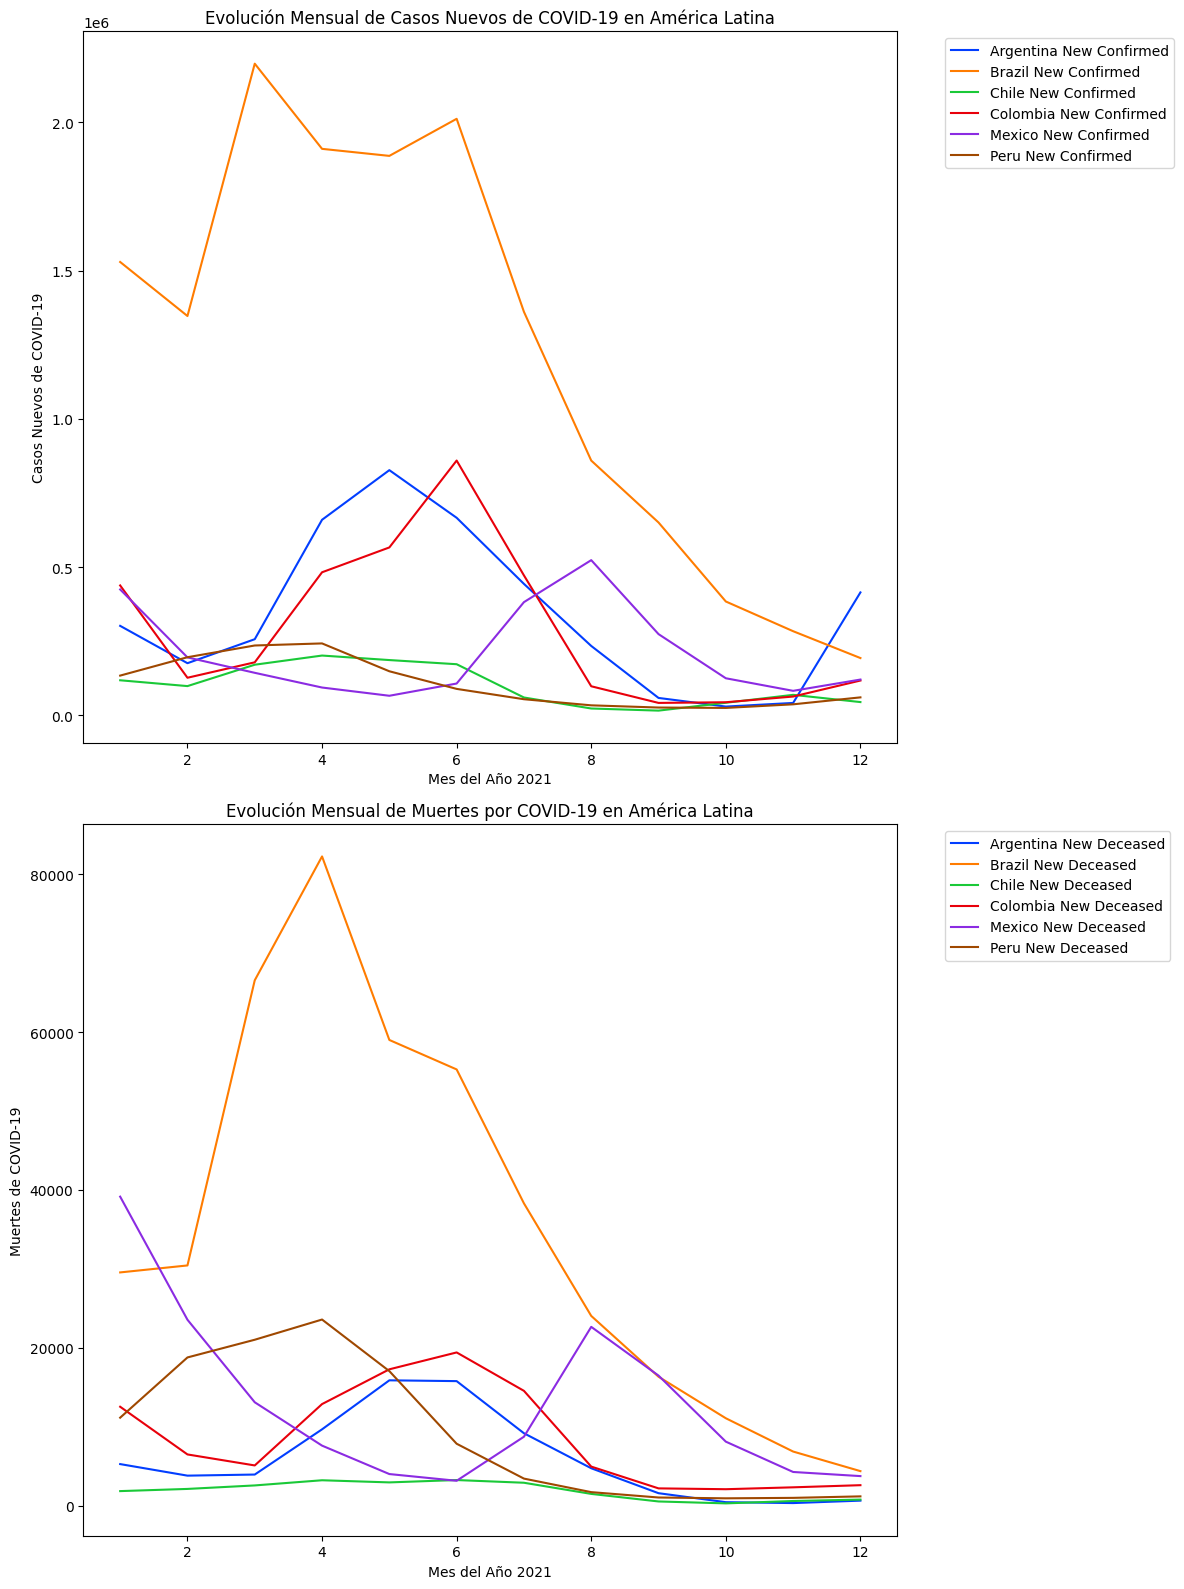

In [ ]:
#  Se agrega una nueva columna al df. El valor de esta columna se obtiene del índice del df, asumiendo que el índice representa meses. Esta línea permite agrupar los datos por país y mes posteriormente.
data_latinoamerica_paises_2021['month'] = data_latinoamerica_paises_2021.index.month

# agrupamos los datos por pais y mes y se suman los nuevos confirmados y las nuevas muertes, reseteando el indice
casos_anuales = data_latinoamerica_paises_2021.groupby(['country_name', 'month'])[['new_confirmed','new_deceased']].sum().reset_index()

# creamos una figura con 1 columna y dos filas, de tamaño 12x16 pulgadas
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12, 16))

# el ciclo for itera sobre cada pais dentro de la columna country name en el df casos anuales, tomando los valores unicos.
for country in casos_anuales['country_name'].unique():
    # crea otro df de casos anuales por pais, donde toma la columna de pais y el valor de cada pais que va iterando y crea la figura con los 2 graficos
    casos_anuales_por_pais = casos_anuales[casos_anuales ['country_name'] == country]
    ax[0].plot(casos_anuales_por_pais['month'], casos_anuales_por_pais['new_confirmed'], label=f'{country} New Confirmed')
    ax[1].plot(casos_anuales_por_pais['month'], casos_anuales_por_pais['new_deceased'], label=f'{country} New Deceased')

ax[0].set_xlabel("Mes del Año 2021")
ax[0].set_ylabel("Casos Nuevos de COVID-19")
ax[0].set_title("Evolución Mensual de Casos Nuevos de COVID-19 en América Latina")
ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax[1].set_xlabel("Mes del Año 2021")
ax[1].set_ylabel("Muertes de COVID-19")
ax[1].set_title("Evolución Mensual de Muertes por COVID-19 en América Latina")
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# ajuste automatico del espacio
plt.tight_layout()
plt.show()

### Análisis de Casos Nuevos:
Se observa un descenso generalizado hasta el mes 2 por parte de todos los países en análisis.

Luego hay una pequeña meseta que se empieza a elevar nuevamente a partir del mes 4, cuando comienzan los picos de contagio.

Los picos más altos de contagios ocurren entre los meses 5 y 8, siendo este el periodo más crítico para la mayoría de los países.

A partir del mes 8, casi todos los países entran en una meseta, aunque Argentina experimenta un nuevo pico pronunciado en el mes 11, lo cual puede estar relacionado con factores climáticos o sociales hacia fin de año.

### Análisis de Muertes:
Perú experimenta un crecimiento abrupto en las muertes hasta alcanzar su pico más alto en abril (mes 4), seguido por un descenso sostenido.

Colombia y Argentina presentan comportamientos similares, con picos de muertes alrededor del mes 6.

Chile mantiene un comportamiento constante sin grandes picos, tanto en contagios como en muertes, lo que podría sugerir **un mejor manejo de la pandemia, lo cual podría atribuirse a un buen plan de vacunación o una infraestructura sanitaria eficiente**.

México muestra un comportamiento particular, con una caida inicial de muertes, pero un repunte importante en la segunda mitad del año, lo que puede reflejar **nuevas olas o variantes del virus**.

Brasil, por su parte, muestra el mayor número de muertes en abril y comienza a subir drásticamente a partir del mes 2, lo que puede estar relacionado con su situación epidemiológica particular.

## EVOLUCIÓN DE CASOS ACTIVOS vs. CASOS RECUPERADOS EN AMERICA LATINA

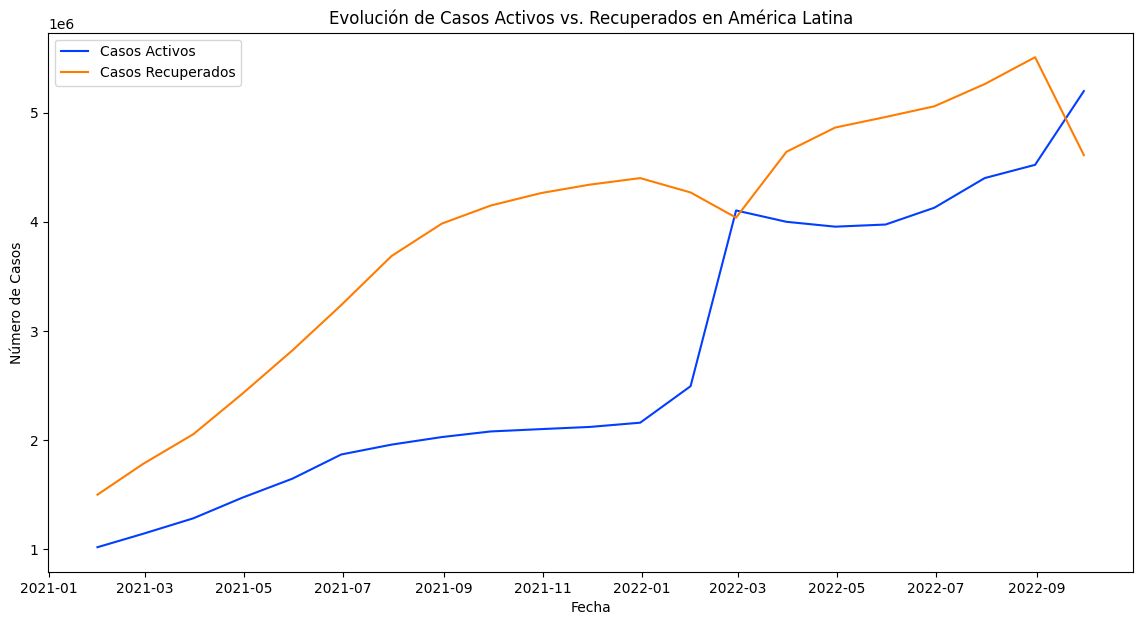

In [ ]:
## Creo la columna active cases dentro del df data latinoamerica filtrada. saca el valor restandole a la columna de confirmados, los muertos y recuperados.
data_latinoamerica_filtrada ['active_cases'] = data_latinoamerica_filtrada ['cumulative_confirmed'] - data_latinoamerica_filtrada ['cumulative_deceased'] - data_latinoamerica_filtrada ['cumulative_recovered']


# Grafico dos lineas sobre el mismo eje:
plt.figure(figsize=(14, 7))

## creamos un gráfico de línea que muestra la evolución del promedio de casos activos y recuperados, agrupados por mes.
sns.lineplot(data=data_latinoamerica_filtrada.resample('M').mean(numeric_only=True), x='date', y='active_cases', label='Casos Activos')
sns.lineplot(data=data_latinoamerica_filtrada.resample('M').mean(numeric_only=True), x='date', y='cumulative_recovered', label='Casos Recuperados')

plt.xlabel('Fecha')
plt.ylabel('Número de Casos')
plt.title('Evolución de Casos Activos vs. Recuperados en América Latina')
plt.legend()
plt.show()

La disminución observada en el número de casos recuperados, junto con el crecimiento simultáneo en los casos activos, podría explicarse por la aparición de un *nuevo brote* de la pandemia de COVID-19. A lo largo de la crisis sanitaria, se han identificado al menos tres olas diferenciadas del virus, siendo la última de ellas marcada por un fuerte aumento de casos a principios de 2022, en gran parte asociado a la rápida propagación de la variante Ómicron. Esta variante, conocida por su alta capacidad de contagio, provocó un incremento significativo en los contagios a nivel mundial, lo que podría haber afectado la capacidad de recuperación en ese período.

Esto, sumado a posibles reinfecciones, cambios en los criterios de recuperación o un incremento en los fallecimientos, podría haber contribuido a la reducción temporal en el número de casos recuperados.

## Relación entre la cobertura de vacunación y la reducción de casos

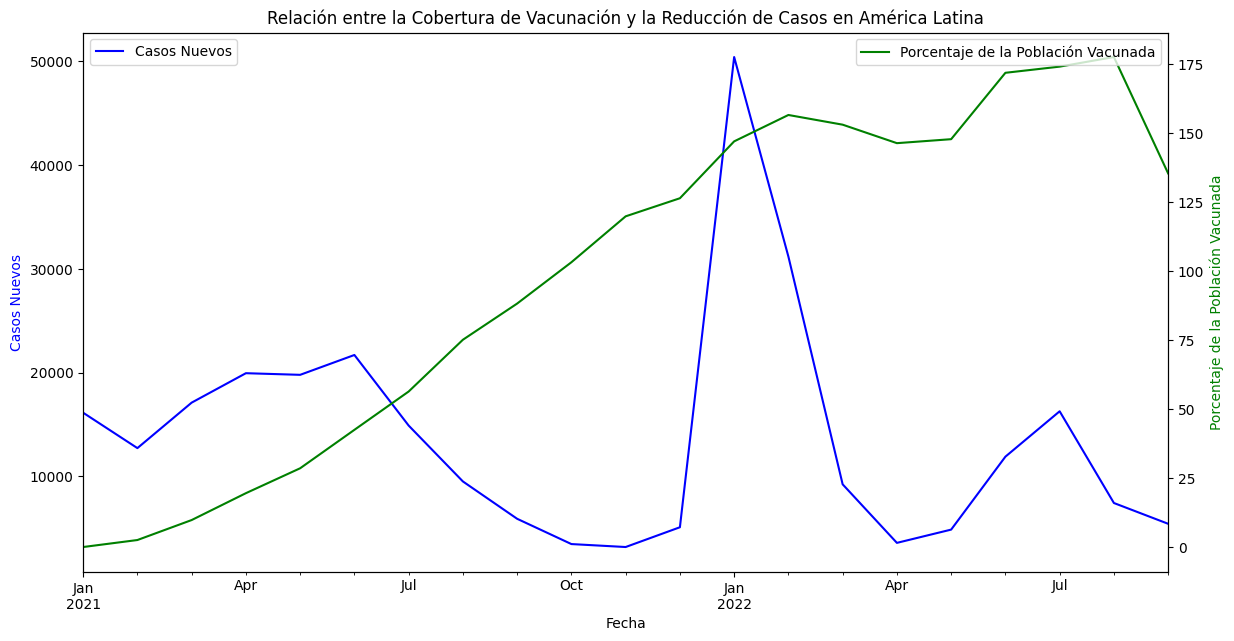

In [ ]:
# creamos la figura de 14 x 7 pulgas
plt.figure(figsize=(14, 7))

# con dos ejes que comparten el eje x
ax1 = plt.gca()
ax2 = ax1.twinx()

#crea porcentajes de vacunacion diviendo las dosis administradas entre la poblacion y multiplicando por 100 para que me de porcentaje
data_latinoamerica_filtrada['percentage_vaccinated'] = data_latinoamerica_filtrada['cumulative_vaccine_doses_administered'] / data_latinoamerica_filtrada['population'] * 100

# Gráfico mis dos lineplots que muestre el promedio de confirmados por mes y el porcentaje de la poblacion vacunada
data_latinoamerica_filtrada.resample('M').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='blue', label='Casos Nuevos')
data_latinoamerica_filtrada.resample('M').mean(numeric_only=True)['percentage_vaccinated'].plot(ax=ax2, color='green', label='Porcentaje de la Población Vacunada')


ax1.set_xlabel('Fecha')
ax1.set_ylabel('Casos Nuevos', color='blue')
ax2.set_ylabel('Porcentaje de la Población Vacunada', color='green')
ax1.set_title('Relación entre la Cobertura de Vacunación y la Reducción de Casos en América Latina')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

A principio de 2021 se observa un descenso en los casos nuevos en los primeros meses del año, mientras que la vacunación apenas comienza a subir lentamente.

Desde marzo a julio de 2021 los casos nuevos aumentan considerablemente, alcanzando un pico a mediados de año. Al mismo tiempo, el porcentaje de la población vacunada también empieza a crecer más rápidamente, lo que coincide con el inicio de la campaña de vacunación a gran escala en la región.

De julio de 2021 hasta noviembre de 2021 se observa una tendencia a la baja en los casos nuevos coincidiendo con el aumento constante de la vacunación.

Hacia el final de 2021 y principios de 2022, los casos nuevos caen abruptamente, mientras que la cobertura de vacunación sigue creciendo y se estabiliza en valores altos.

Los casos de COVID-19 disminuyen significativamente a principios de 2022, coincidiendo con el alto porcentaje de la población vacunada.
Hay algunos repuntes leves de nuevos casos en el segundo semestre de 2022, pero son mucho menores en comparación con los picos de 2021.

El gráfico sugiere una correlación inversa entre el porcentaje de población vacunada y el número de nuevos casos de COVID-19: conforme aumenta la cobertura de vacunación, los casos nuevos tienden a disminuir.
La vacunación parece tener un impacto positivo a partir de julio de 2021, cuando los casos comienzan a reducirse de manera más consistente.
Aunque la vacunación no elimina completamente los casos, el descenso significativo después de alcanzar una alta cobertura sugiere que la vacunación masiva fue crucial para controlar la pandemia en la región.

## Progreso de la vacunación por país

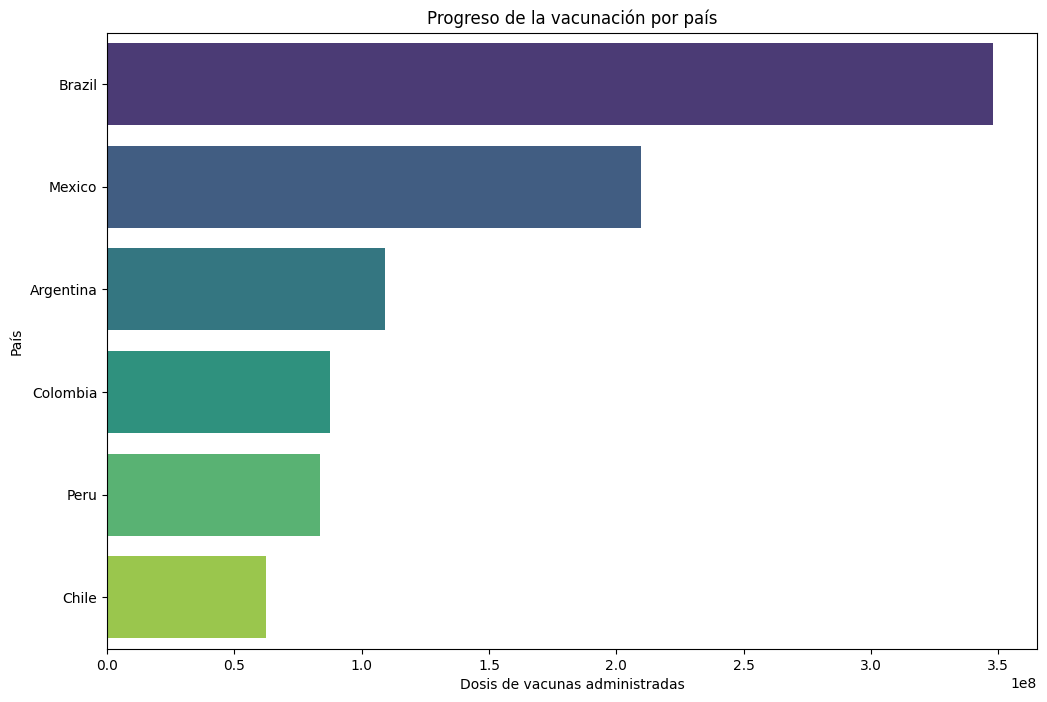

In [ ]:
# datos de vacunacion es la cantidad maxima de las dosis acumuladas por pais ordenadas descendentemente
datos_de_vacunacion = data_latinoamerica_filtrada.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False)

# creamos la figura
plt.figure(figsize=(12, 8))

# dibujamos el grafico de barras donde el eje x representa la cantidad de dosis y el eje y los paises, dando un color diferente a cada pais
sns.barplot(x=datos_de_vacunacion.values, y=datos_de_vacunacion.index, hue=datos_de_vacunacion.index, palette='viridis')
plt.xlabel('Dosis de vacunas administradas')
plt.ylabel('País')
plt.title('Progreso de la vacunación por país')

plt.show()

Aunque Brasil ha administrado la mayor cantidad de vacunas, esto debe ser interpretado con cautela. Comparar solo las cifras absolutas sin tener en cuenta la población total y la extensión geográfica puede llevar a conclusiones erróneas.

Al interpretar estos datos, es crucial considerar las particularidades de cada país, como las diferencias en la infraestructura sanitaria, los recursos disponibles y la efectividad de las campañas de vacunación. Brasil, por su tamaño, puede tener recursos más amplios, pero también enfrenta desafíos únicos.

Por el contrario, aunque Chile haya administrado menos dosis en comparación con otros países, su éxito en manejar la pandemia puede reflejar una alta eficiencia en la administración de vacunas. A veces, una cantidad menor de dosis administradas puede estar asociada con un enfoque muy dirigido y efectivo, que maximiza el impacto de cada dosis administrada.

Tal vez los resultados se deben a una planificación estratégica, buena gestión de recursos, campañas de comunicación efectiva y una infraestructura sanitaria eficiente.

## Nuevos casos y temperatura promedio

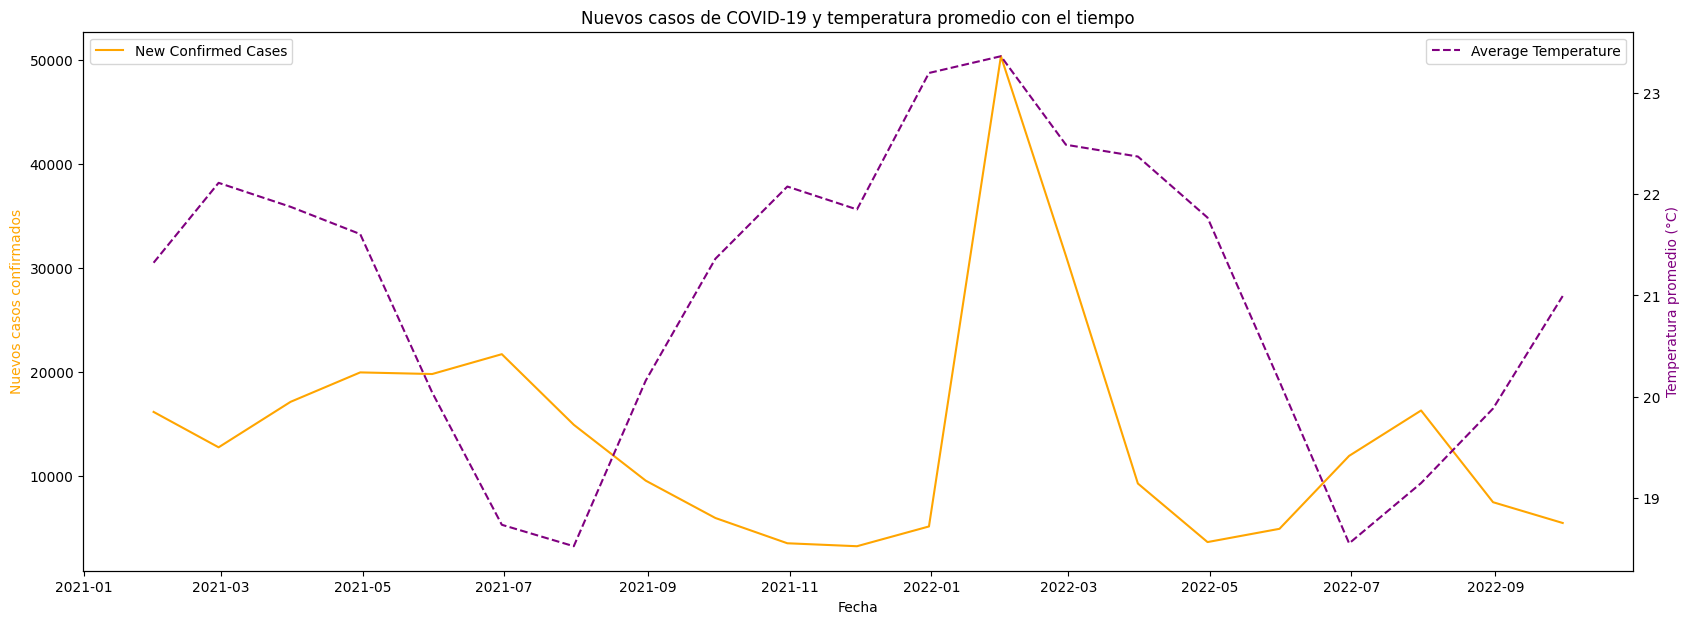

In [ ]:
# Graficamos la relación entre la temperatura promedio y los nuevos casos confirmados de COVID-19

# creamos la figura
plt.figure(figsize=(20, 7))

# con dos ejes que comparten el eje x
ax1 = plt.gca() # Obtiene el eje actual de la gráfica y lo asigna a ax1.
ax2 = ax1.twinx() # Crea un segundo eje ax2 que comparte el mismo eje x que ax1, permitiendo graficar dos conjuntos de datos con diferentes escalas y unidades en el mismo gráfico.

# genera los graficos que muestran el promedio mensual de los nuevos confirmados y de la temperatura
ax1.plot(data_latinoamerica_filtrada.resample('M').mean(numeric_only=True).index, data_latinoamerica_filtrada.resample('M').mean(numeric_only=True)['new_confirmed'], color='orange', label='New Confirmed Cases')
ax2.plot(data_latinoamerica_filtrada.resample('M').mean(numeric_only=True).index, data_latinoamerica_filtrada.resample('M').mean(numeric_only=True)['average_temperature_celsius'], color='purple', label='Average Temperature', linestyle='--')

ax1.set_xlabel('Fecha')
ax1.set_ylabel('Nuevos casos confirmados', color='orange')
ax2.set_ylabel('Temperatura promedio (°C)', color='purple')
plt.title('Nuevos casos de COVID-19 y temperatura promedio con el tiempo')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

No se observa una correlación directa y clara entre el aumento de los casos de COVID-19 y la temperatura promedio. Es decir, los picos de casos no coinciden necesariamente con los picos de temperatura.

## Impacto de la urbanización en la propagación del COVID-19

In [ ]:
# creamos una nueva columna que muestra el porcentaje de poblacion urbana y otra que muesrta el porcentaje de poblacion confirmada
data_latinoamerica_filtrada['urban_population_percentage'] = data_latinoamerica_filtrada['population_urban'] / data_latinoamerica_filtrada['population']
data_latinoamerica_filtrada['confirmed_population_percentage'] = data_latinoamerica_filtrada['cumulative_confirmed'] / data_latinoamerica_filtrada['population']

# casos urbanos agrupa por pais y muestra el ultimo registro ordenado por el porcentaje de poblacion urbana
casos_urbanos = data_latinoamerica_filtrada.groupby('country_name').last().sort_values(by='urban_population_percentage')
casos_urbanos

location_key country_code  new_confirmed  new_deceased  \
country_name                                                          
Colombia               CO           CO   13936.279613    277.164115   
Brazil                 BR           BR   13936.279613    277.164115   
Peru                   PE           PE   13936.279613    277.164115   
Argentina              AR           AR   13936.279613    277.164115   
Mexico                 MX           MX   13936.279613    277.164115   
Chile                  CL           CL   13936.279613    277.164115   

              cumulative_confirmed  cumulative_deceased  \
country_name                                              
Colombia              6.784382e+06        193136.784045   
Brazil                6.784382e+06        193136.784045   
Peru                  6.784382e+06        193136.784045   
Argentina             6.784382e+06        193136.784045   
Mexico                6.784382e+06        193136.784045   
Chile                 6.784382e+06        193136.784045   

              cumulative_vaccine_doses_administered   population  \
country_name                                                       
Colombia                                        0.0   50882884.0   
Brazil                                          0.0  212559409.0   
Peru                                            0.0   29381884.0   
Argentina                                       0.0   44938712.0   
Mexico                                          0.0  110991953.0   
Chile                                           0.0   17574003.0   

              population_male  population_female  ...  population_age_60_79  \
country_name                                      ...                         
Colombia           24984564.0         25898320.0  ...             5751119.0   
Brazil            104435783.0        108123626.0  ...            25698413.0   
Peru               14450757.0         14931127.0  ...             2924473.0   
Argentina          19523766.0         20593330.0  ...             4731808.0   
Mexico             54855231.0         57481307.0  ...             8553148.0   
Chile               8972014.0          8601989.0  ...             2784913.0   

              population_age_00_19_vacunados  population_age_20_39_vacunados  \
country_name                                                                   
Colombia                                   0                               0   
Brazil                                     0                               0   
Peru                                       0                               0   
Argentina                                  0                               0   
Mexico                                     0                               0   
Chile                                      0                               0   

              population_age_40_59_vacunados  population_age_60_79_vacunados  \
country_name                                                                   
Colombia                                   0                               0   
Brazil                                     0                               0   
Peru                                       0                               0   
Argentina                                  0                               0   
Mexico                                     0                               0   
Chile                                      0                               0   

              population_age_80_and_older_vacunados  active_cases  \
country_name                                                        
Colombia                                          0  6.591245e+06   
Brazil                                            0  6.591245e+06   
Peru                                              0  6.591245e+06   
Argentina                                         0  6.591245e+06   
Mexico                                            0  6.591245e+06   
Chile                       

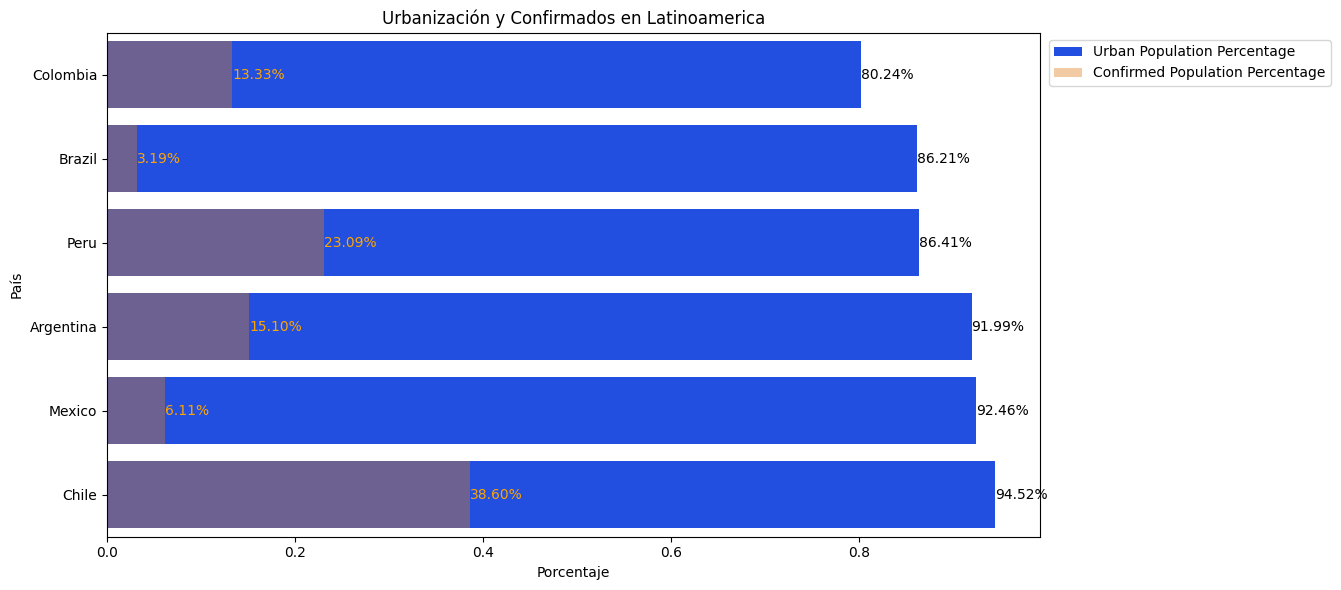

In [ ]:
# creamos la figura
plt.figure(figsize=(14, 6))

# genera un grafico de barras del pocentaje de poblacion urbana
ax = sns.barplot(x='urban_population_percentage', y=casos_urbanos.index, data=casos_urbanos, label='Urban Population Percentage')

# Añadir etiquetas a cada barra para urban_population_percentage
# El ciclo for itera sobre los valores de la columna urban_population_percentage del DataFrame casos_urbanos. En cada iteración, la variable value almacena el valor del porcentaje de población urbana del país actual. La variable index almacena la posición (índice) del país en el DataFrame.
for index, value in enumerate(casos_urbanos['urban_population_percentage']):

    # Posicionamiento de la etiqueta: coloca la etiqueta en la posición (value, index) del eje x e y del gráfico ax. El valor de la coordenada x se obtiene directamente de value, que representa el porcentaje de población urbana. El valor de la coordenada y se obtiene de index, que indica la posición del país en el orden del DataFrame.
    ax.text(value, index, f'{value*100:.2f}%', color='black', ha="left", va="center")

# Superponer la segunda barra para confirmed_population_percentage
ax2 = sns.barplot(x='confirmed_population_percentage', y=casos_urbanos.index, data=casos_urbanos, alpha=0.4, label='Confirmed Population Percentage')

# Añadir etiquetas a cada barra para confirmed_population_percentage
for index, value in enumerate(casos_urbanos['confirmed_population_percentage']):
    ax2.text(value, index, f'{value*100:.2f}%', color='orange', ha="left", va="center")

plt.xlabel('Porcentaje')
plt.ylabel('País')
plt.title('Urbanización y Confirmados en Latinoamerica')
plt.legend(bbox_to_anchor=(1.32, 1), loc="upper right")
plt.tight_layout()
plt.show()

Los países con un mayor porcentaje de población urbana también tienden a tener un mayor porcentaje de población con casos confirmados de COVID-19. Esto sugiere una posible relación entre la urbanización y la propagación del virus y puede deberse a que las ciudades suelen tener una mayor densidad de población, lo que facilita la transmisión de enfermedades infecciosas.

## MORTALIDAD

In [ ]:
# creamos columna porcentaje de mortalidad
data_latinoamerica_filtrada['porcentaje_de_mortalidad'] = data_latinoamerica_filtrada['cumulative_deceased'] / data_latinoamerica_filtrada['population']
data_latinoamerica_filtrada

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina    7767.000000   
2021-01-03           AR           AR    Argentina    4934.000000   
2021-01-04           AR           AR    Argentina   13953.000000   
2021-01-05           AR           AR    Argentina   14085.000000   
2021-01-06           AR           AR    Argentina   14496.000000   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru    1150.000000   
2022-09-14           PE           PE         Peru   13936.279613   
2022-09-15           PE           PE         Peru   13936.279613   
2022-09-16           PE           PE         Peru   13936.279613   
2022-09-17           PE           PE         Peru   13936.279613   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02    166.000000          1.670634e+06         46688.000000   
2021-01-03    157.000000          1.675568e+06         46845.000000   
2021-01-04    157.000000          1.689521e+06         47002.000000   
2021-01-05    160.000000          1.703606e+06         47162.000000   
2021-01-06    131.000000          1.718102e+06         47293.000000   
...                  ...                   ...                  ...   
2022-09-13     22.000000          4.127612e+06        216173.000000   
2022-09-14    277.164115          6.784382e+06        193136.784045   
2022-09-15    277.164115          6.784382e+06        193136.784045   
2022-09-16    277.164115          6.784382e+06        193136.784045   
2022-09-17    277.164115          6.784382e+06        193136.784045   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   
...                                           ...         ...   
2022-09-13                                    0.0  29381884.0   
2022-09-14                                    0.0  29381884.0   
2022-09-15                                    0.0  29381884.0   
2022-09-16                                    0.0  29381884.0   
2022-09-17                                    0.0  29381884.0   

            population_male  ...  population_age_00_19_vacunados  \
date                         ...                                   
2021-01-02       19523766.0  ...                            6228   
2021-01-03       19523766.0  ...                            6287   
2021-01-04       19523766.0  ...                            7707   
2021-01-05       19523766.0  ...                            9143   
2021-01-06       19523766.0  ...                           10463   
...                     ...  ...                             ...   
2022-09-13       14450757.0  ...                               0   
2022-09-14       14450757.0  ...                               0   
2022-09-15       14450757.0  ...                               0   
2022-09-16       14450757.0  ...                               0   
2022-09-17       14450757.0  ...                               0   

            population_age_20_39_vacunados  population_age_40_59_vacunados  \
date                                                                         
2021-01-02                            5523                            3809   
2021-01-03                            5576                            3846   
2021-01-04                            6835                            4714   
2021-01-05                            8109                            5592   
202

In [ ]:
# creamos df de paises con alta mortalidad tomando el df data latinoamerica filtrada agrupando por pais. Para cada grupo se calcula el valor máximo del porcentaje de mortalidad, ordenando los resultados de mayor a menor, colocando en la primera posición al país con la tasa de mortalidad más alta y seleccionando los primeros 5 registros, es decir, los 5 países con las tasas de mortalidad más altas.
paises_con_alta_mortalidad = data_latinoamerica_filtrada.groupby('country_name')['porcentaje_de_mortalidad'].max().sort_values(ascending=False).head(5).index
paises_con_alta_mortalidad

Index(['Chile', 'Peru', 'Argentina', 'Colombia', 'Brazil'], dtype='object', name='country_name')

In [ ]:
data_latinoamerica_filtrada.columns

Index(['location_key', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_sq_km', 

## Distribución por edad

In [ ]:
# creamos un alista y seleccionamos las columnas de edad para formar grupos
grupos_de_edad = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
data_latinoamerica_paises[grupos_de_edad]

population_age_00_09  population_age_10_19  population_age_20_29  \
date                                                                           
2020-01-01             6718871.0             7045513.0             6430658.0   
2020-01-02             6718871.0             7045513.0             6430658.0   
2020-01-03             6718871.0             7045513.0             6430658.0   
2020-01-04             6718871.0             7045513.0             6430658.0   
2020-01-05             6718871.0             7045513.0             6430658.0   
...                          ...                   ...                   ...   
2022-09-13             5140624.0             5035905.0             4895056.0   
2022-09-14             5140624.0             5035905.0             4895056.0   
2022-09-15             5140624.0             5035905.0             4895056.0   
2022-09-16             5140624.0             5035905.0             4895056.0   
2022-09-17             5140624.0             5035905.0             4895056.0   

            population_age_30_39  population_age_40_49  population_age_50_59  \
date                                                                           
2020-01-01             5777148.0             4507125.0             3911943.0   
2020-01-02             5777148.0             4507125.0             3911943.0   
2020-01-03             5777148.0             4507125.0             3911943.0   
2020-01-04             5777148.0             4507125.0             3911943.0   
2020-01-05             5777148.0             4507125.0             3911943.0   
...                          ...                   ...                   ...   
2022-09-13             4379777.0             3660378.0             2772568.0   
2022-09-14             4379777.0             3660378.0             2772568.0   
2022-09-15             4379777.0             3660378.0             2772568.0   
2022-09-16             4379777.0             3660378.0             2772568.0   
2022-09-17             4379777.0             3660378.0             2772568.0   

            population_age_60_69  population_age_70_79  \
date                                                     
2020-01-01             2914251.0             1817557.0   
2020-01-02             2914251.0             1817557.0   
2020-01-03             2914251.0             1817557.0   
2020-01-04             2914251.0             1817557.0   
2020-01-05             2914251.0             1817557.0   
...                          ...                   ...   
2022-09-13             1846407.0             1078066.0   
2022-09-14             1846407.0             1078066.0   
2022-09-15             1846407.0             1078066.0   
2022-09-16             1846407.0             1078066.0   
2022-09-17             1846407.0             1078066.0   

            population_age_80_and_older  
date                                     
2020-01-01                     994030.0  
2020-01-02                     994030.0  
2020-01-03                     994030.0  
2020-01-04                     994030.0  
2020-01-05                     994030.0  
...                                 ...  
2022-09-13                     573103.0  
2022-09-14                     573103.0  
2022-09-15                     573103.0  
2022-09-16                     573103.0  
2022-09-17                     573103.0  

[5946 rows x 9 columns]

In [ ]:
# creamos un nuevo df filtrando el DataFrame original para incluir solo los registros correspondientes a los países con altas tasas de mortalidad, que fueron previamente identificados y almacenados en la lista de alta mortalidad y los agrupa por pais calculando el promedio por grupos de eadad
distribucion_por_edades = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(paises_con_alta_mortalidad)].groupby('country_name')[grupos_de_edad].mean()
distribucion_por_edades

population_age_00_09  population_age_10_19  \
country_name                                               
Argentina                6718871.0             7045513.0   
Brazil                  29076910.0            31160446.0   
Chile                    2428079.0             2493879.0   
Colombia                 7414155.0             8119876.0   
Peru                     5140624.0             5035905.0   

              population_age_20_29  population_age_30_39  \
country_name                                               
Argentina                6430658.0             5777148.0   
Brazil                  34104643.0            34476762.0   
Chile                    2995538.0             2945404.0   
Colombia                 8847061.0             7810299.0   
Peru                     4895056.0             4379777.0   

              population_age_40_49  population_age_50_59  \
country_name                                               
Argentina                4507125.0             3911943.0   
Brazil                  29462006.0            24421202.0   
Chile                    2578404.0             2352271.0   
Colombia                 6450787.0             5543980.0   
Peru                     3660378.0             2772568.0   

              population_age_60_69  population_age_70_79  \
country_name                                               
Argentina                2914251.0             1817557.0   
Brazil                  16896862.0             8801551.0   
Chile                    1791787.0              993126.0   
Colombia                 3771358.0             1979761.0   
Peru                     1846407.0             1078066.0   

              population_age_80_and_older  
country_name                               
Argentina                        994030.0  
Brazil                          4159027.0  
Chile                            537721.0  
Colombia                         945607.0  
Peru                             573103.0

In [ ]:
# nos enfocamos en argentina
distribucion_edad_argentina = distribucion_por_edades[distribucion_por_edades.index == 'Argentina']
distribucion_edad_argentina

population_age_00_09  population_age_10_19  \
country_name                                               
Argentina                6718871.0             7045513.0   

              population_age_20_29  population_age_30_39  \
country_name                                               
Argentina                6430658.0             5777148.0   

              population_age_40_49  population_age_50_59  \
country_name                                               
Argentina                4507125.0             3911943.0   

              population_age_60_69  population_age_70_79  \
country_name                                               
Argentina                2914251.0             1817557.0   

              population_age_80_and_older  
country_name                               
Argentina                        994030.0

In [ ]:
# que paises fueron incluidos en el df distribucion por edads?
distribucion_por_edades.index.unique()

Index(['Argentina', 'Brazil', 'Chile', 'Colombia', 'Peru'], dtype='object', name='country_name')

In [ ]:
# .loc se utiliza para seleccionar filas por etiquetas (el indice estaba configurado por el nombre de los paises)
distribucion_edad_argentina.loc["Argentina"]

population_age_00_09           6718871.0
population_age_10_19           7045513.0
population_age_20_29           6430658.0
population_age_30_39           5777148.0
population_age_40_49           4507125.0
population_age_50_59           3911943.0
population_age_60_69           2914251.0
population_age_70_79           1817557.0
population_age_80_and_older     994030.0
Name: Argentina, dtype: float64

In [ ]:
distribucion_por_edades.loc["Argentina"].index

Index(['population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older'],
      dtype='object')

In [ ]:
distribucion_por_edades.loc["Argentina"].values

array([6718871., 7045513., 6430658., 5777148., 4507125., 3911943.,
       2914251., 1817557.,  994030.])

In [ ]:
distribucion_edad_argentina.index

Index(['Argentina'], dtype='object', name='country_name')

In [ ]:
distribucion_edad_argentina.columns

Index(['population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older'],
      dtype='object')

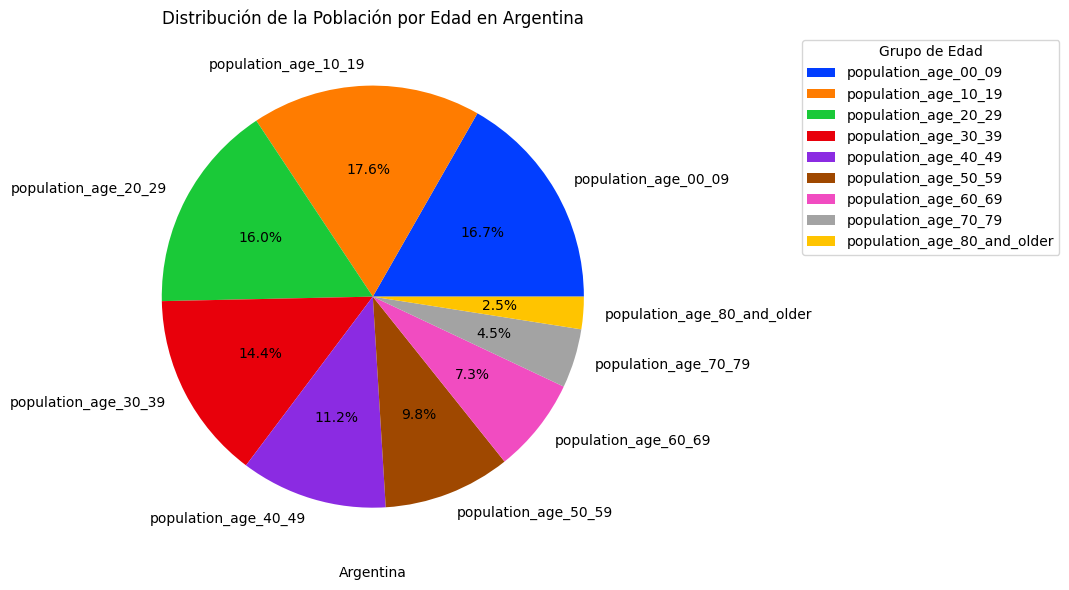

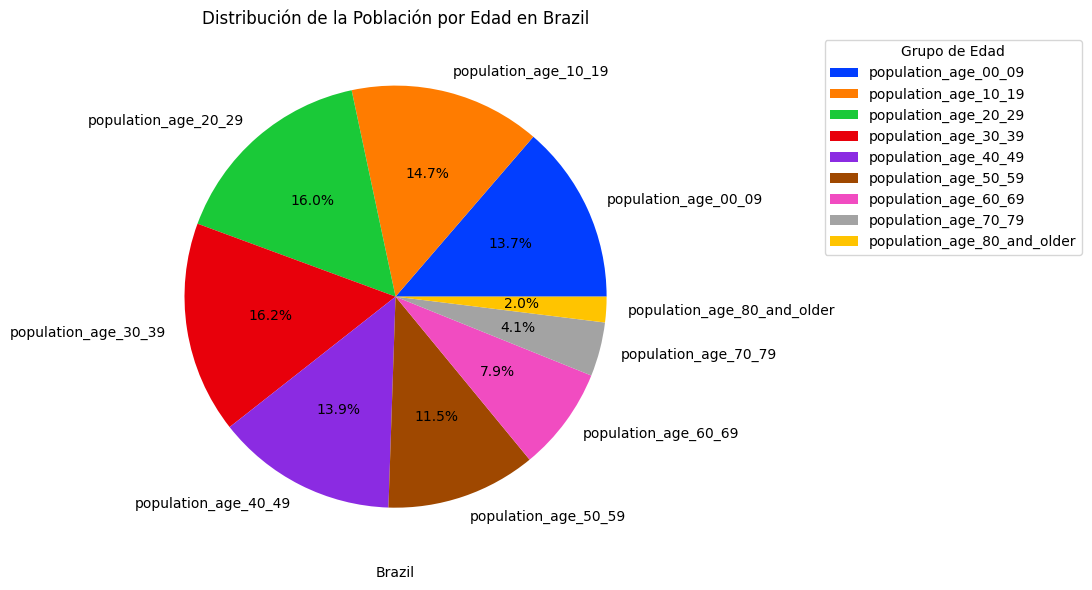

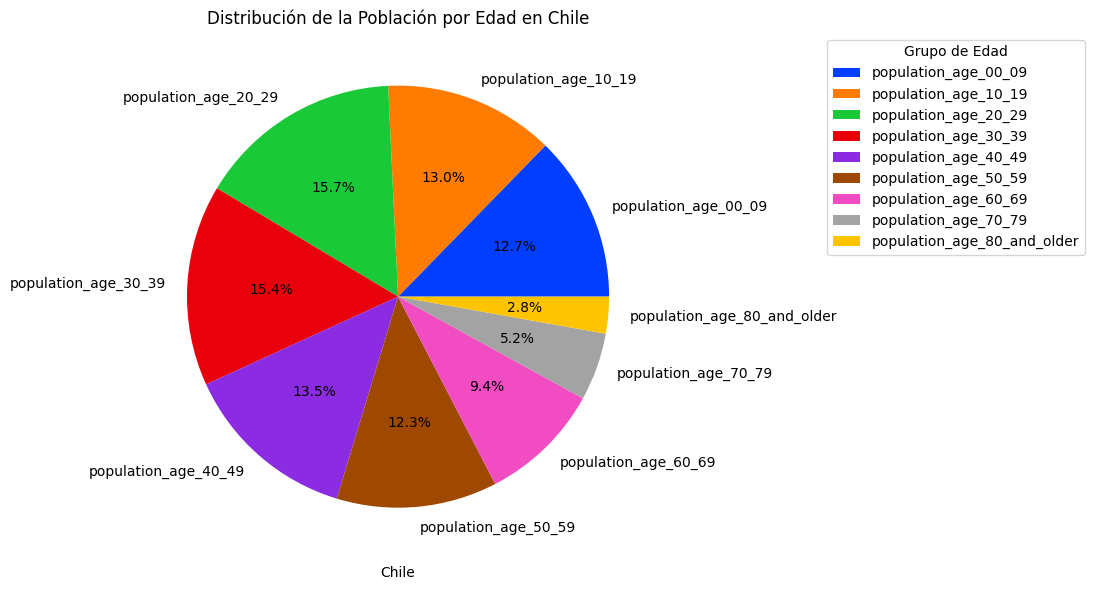

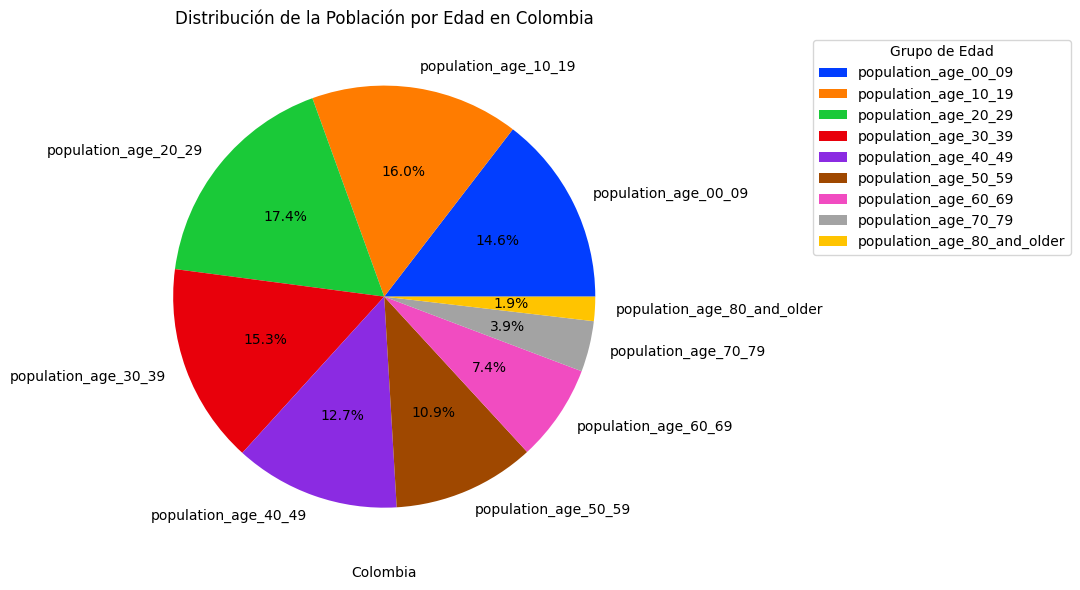

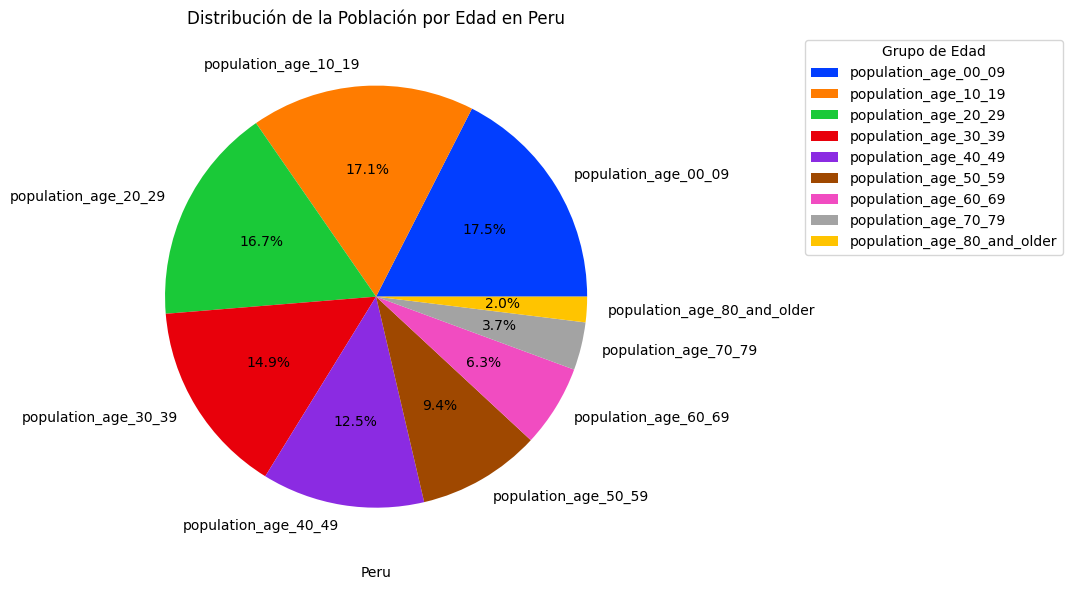

In [ ]:
# Densidad de población por grupos de edad

# creamos un df con los paises de alta mortalidad, agrupando por pais y por el maximo pocentaje de mortalidad ordenados de manera descendente, mostrando solo los 5 primeros registros
paises_con_alta_mortalidad = data_latinoamerica_filtrada.groupby('country_name')['porcentaje_de_mortalidad'].max().sort_values(ascending=False).head(5).index

# selecciono las columnas para formar los grupos de edad
grupos_de_edad = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']

# creamos df con distribucion por edades tomando el df original si el pais se encuentra en paises con alta mortalidad los agrupa por pais, calculando el promedio para cada grupo de edad
distribucion_por_edades = data_latinoamerica_filtrada[data_latinoamerica_filtrada['country_name'].isin(paises_con_alta_mortalidad)].groupby('country_name')[grupos_de_edad].mean()

# el índice corresponde a los nombres de los países. Se extraen los valores únicos del índice, eliminando duplicados. Esto nos da una lista con los nombres únicos de los países que cumplen con el criterio de alta mortalidad.
paises = distribucion_por_edades.index.unique()

# ciclo for para cada pais en la lista de paises
for pais in paises:
    plt.figure(figsize=(12,6))
    plt.pie(
        distribucion_por_edades.loc[pais].values,
        labels=distribucion_por_edades.loc[pais].index,
        autopct='%1.1f%%'
    )

    # distribucion_por_edades.plot(kind='pie', stacked=True, figsize=(12, 8))
    plt.xlabel(f'{pais}')
    plt.title(f'Distribución de la Población por Edad en {pais}')
    plt.legend(bbox_to_anchor=(1.3, 1), loc='upper left', title='Grupo de Edad')
    plt.tight_layout()
    plt.show()

In [ ]:
data_latinoamerica_filtrada

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina    7767.000000   
2021-01-03           AR           AR    Argentina    4934.000000   
2021-01-04           AR           AR    Argentina   13953.000000   
2021-01-05           AR           AR    Argentina   14085.000000   
2021-01-06           AR           AR    Argentina   14496.000000   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru    1150.000000   
2022-09-14           PE           PE         Peru   13936.279613   
2022-09-15           PE           PE         Peru   13936.279613   
2022-09-16           PE           PE         Peru   13936.279613   
2022-09-17           PE           PE         Peru   13936.279613   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02    166.000000          1.670634e+06         46688.000000   
2021-01-03    157.000000          1.675568e+06         46845.000000   
2021-01-04    157.000000          1.689521e+06         47002.000000   
2021-01-05    160.000000          1.703606e+06         47162.000000   
2021-01-06    131.000000          1.718102e+06         47293.000000   
...                  ...                   ...                  ...   
2022-09-13     22.000000          4.127612e+06        216173.000000   
2022-09-14    277.164115          6.784382e+06        193136.784045   
2022-09-15    277.164115          6.784382e+06        193136.784045   
2022-09-16    277.164115          6.784382e+06        193136.784045   
2022-09-17    277.164115          6.784382e+06        193136.784045   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   
...                                           ...         ...   
2022-09-13                                    0.0  29381884.0   
2022-09-14                                    0.0  29381884.0   
2022-09-15                                    0.0  29381884.0   
2022-09-16                                    0.0  29381884.0   
2022-09-17                                    0.0  29381884.0   

            population_male  ...  population_age_00_19_vacunados  \
date                         ...                                   
2021-01-02       19523766.0  ...                            6228   
2021-01-03       19523766.0  ...                            6287   
2021-01-04       19523766.0  ...                            7707   
2021-01-05       19523766.0  ...                            9143   
2021-01-06       19523766.0  ...                           10463   
...                     ...  ...                             ...   
2022-09-13       14450757.0  ...                               0   
2022-09-14       14450757.0  ...                               0   
2022-09-15       14450757.0  ...                               0   
2022-09-16       14450757.0  ...                               0   
2022-09-17       14450757.0  ...                               0   

            population_age_20_39_vacunados  population_age_40_59_vacunados  \
date                                                                         
2021-01-02                            5523                            3809   
2021-01-03                            5576                            3846   
2021-01-04                            6835                            4714   
2021-01-05                            8109                            5592   
202

La presencia de una población mayoritariamente joven/ adulta es una realidad que se refleja en todos los países en analisis y puede ser un factor **doblemente influyente** en la propagación del COVID-19. Por un lado, los jóvenes *suelen presentar formas más leves de la enfermedad o incluso ser asintomáticos*, lo que dificulta su detección y aislamiento. Esto puede contribuir a una mayor transmisión del virus en la comunidad. Por otro lado, *la mayor movilidad y actividad social* características de los jóvenes pueden acelerar la propagación, especialmente si no se adhieren estrictamente a las medidas de prevención. Es importante destacar que, aunque los jóvenes pueden ser menos vulnerables a las complicaciones graves, pueden actuar como vectores de transmisión, poniendo en riesgo a poblaciones más vulnerables como los adultos mayores

## Comparación de estrategias de vacunación

In [ ]:
# agrupar por pais el maximo de dosis acumuladas adminitradas
data_latinoamerica_filtrada.groupby('country_name')['cumulative_vaccine_doses_administered'].max()

country_name
Argentina    109204825.0
Brazil       347868481.0
Chile         62204235.0
Colombia      87566541.0
Mexico       209673612.0
Peru          83624934.0
Name: cumulative_vaccine_doses_administered, dtype: float64

In [ ]:
# agrupa por el promedio de poblacion
data_latinoamerica_filtrada.groupby('country_name')['population'].mean()

country_name
Argentina     44938712.0
Brazil       212559409.0
Chile         17574003.0
Colombia      50882884.0
Mexico       110991953.0
Peru          29381884.0
Name: population, dtype: float64

In [ ]:
# calculamos el porcentaje maximo de dosis acumuladas adminitradas por cada pais
data_latinoamerica_filtrada.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / data_latinoamerica_filtrada.groupby('country_name')['population'].mean()

country_name
Argentina    2.430084
Brazil       1.636571
Chile        3.539560
Colombia     1.720943
Mexico       1.889088
Peru         2.846139
dtype: float64

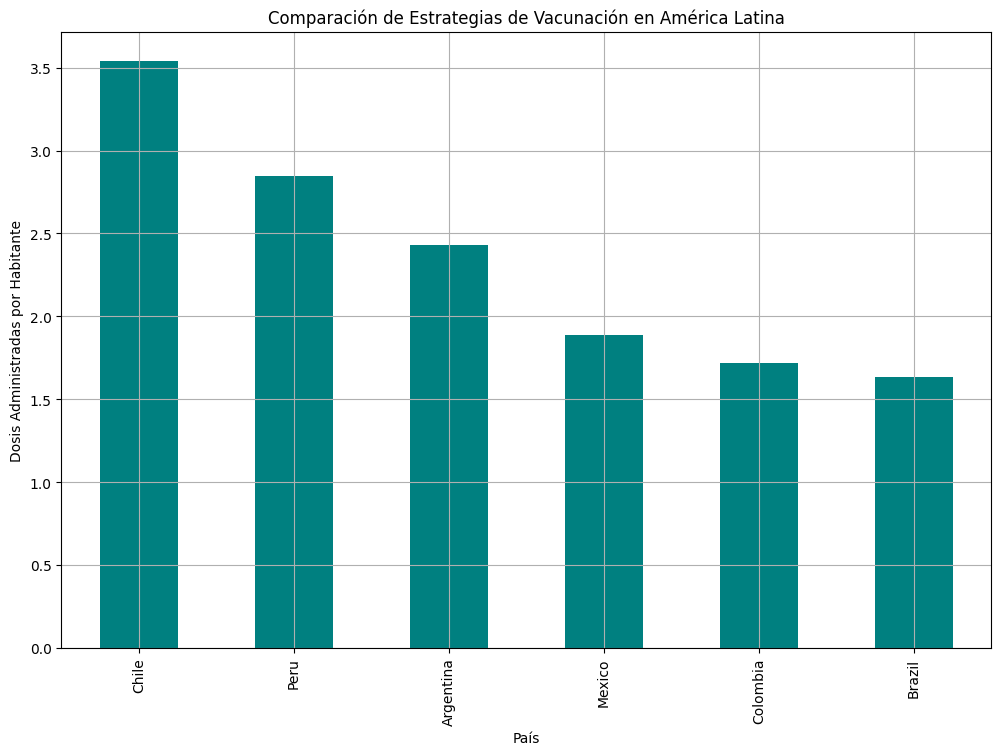

In [ ]:
# Agrupa los datos por país, calculando el máximo número de dosis de vacuna administradas por país, la poblacion promedio, y dividiendo el número máximo de dosis entre la población promedio para obtener el porcentaje de vacunación.
estrategia_de_vacunacion = data_latinoamerica_filtrada.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / data_latinoamerica_filtrada.groupby('country_name')['population'].mean()

# ordena los países de mayor a menor según el porcentaje de vacunación y lo grafica.
estrategia_de_vacunacion.sort_values(ascending=False).plot(kind='bar', figsize=(12, 8), color='teal', grid=True)

plt.xlabel('País')
plt.ylabel('Dosis Administradas por Habitante')
plt.title('Comparación de Estrategias de Vacunación en América Latina')
plt.show()

Los datos de vacunación en América Latina revelan un panorama heterogéneo, con Chile a la vanguardia y otros países mostrando un ritmo de vacunación más lento. Esta disparidad subraya la necesidad de acelerar los esfuerzos de inmunización en naciones como México, Colombia y Brasil. La industria farmacéutica puede desempeñar un papel fundamental en cerrar esta brecha, proporcionando un suministro estable de vacunas y apoyando la implementación de programas de vacunación más eficientes

## Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad

In [ ]:
data_latinoamerica_paises.columns

Index(['location_key', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_sq_km', 

PAISES MAYOR CANTIDAD DE MUERTES

In [ ]:
data_latinoamerica_paises ['porcentaje_mortalidad'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['population']
data_latinoamerica_paises

location_key country_code country_name  new_confirmed  \
date                                                               
2020-01-01           AR           AR    Argentina            3.0   
2020-01-02           AR           AR    Argentina           14.0   
2020-01-03           AR           AR    Argentina            3.0   
2020-01-04           AR           AR    Argentina            7.0   
2020-01-05           AR           AR    Argentina            5.0   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru         1150.0   
2022-09-14           PE           PE         Peru            NaN   
2022-09-15           PE           PE         Peru            NaN   
2022-09-16           PE           PE         Peru            NaN   
2022-09-17           PE           PE         Peru            NaN   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2020-01-01           0.0                   3.0                  0.0   
2020-01-02           0.0                  17.0                  0.0   
2020-01-03           0.0                  20.0                  0.0   
2020-01-04           0.0                  27.0                  0.0   
2020-01-05           0.0                  32.0                  0.0   
...                  ...                   ...                  ...   
2022-09-13          22.0             4127612.0             216173.0   
2022-09-14           NaN                   NaN                  NaN   
2022-09-15           NaN                   NaN                  NaN   
2022-09-16           NaN                   NaN                  NaN   
2022-09-17           NaN                   NaN                  NaN   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2020-01-01                                    NaN  44938712.0   
2020-01-02                                    NaN  44938712.0   
2020-01-03                                    NaN  44938712.0   
2020-01-04                                    NaN  44938712.0   
2020-01-05                                    NaN  44938712.0   
...                                           ...         ...   
2022-09-13                                    NaN  29381884.0   
2022-09-14                                    NaN  29381884.0   
2022-09-15                                    NaN  29381884.0   
2022-09-16                                    NaN  29381884.0   
2022-09-17                                    NaN  29381884.0   

            population_male  ...  area_urban_sq_km  life_expectancy  \
date                         ...                                      
2020-01-01       19523766.0  ...           55032.0           76.520   
2020-01-02       19523766.0  ...           55032.0           76.520   
2020-01-03       19523766.0  ...           55032.0           76.520   
2020-01-04       19523766.0  ...           55032.0           76.520   
2020-01-05       19523766.0  ...           55032.0           76.520   
...                     ...  ...               ...              ...   
2022-09-13       14450757.0  ...           16425.0           76.516   
2022-09-14       14450757.0  ...           16425.0           76.516   
2022-09-15       14450757.0  ...           16425.0           76.516   
2022-09-16       14450757.0  ...           16425.0           76.516   
2022-09-17       14450757.0  ...           16425.0           76.516   

            adult_male_mortality_rate  adult_female_mortality_rate  \
date                                                                 
2020-01-01                    147.086                       79.483   
2020-01-02                    147.086                       79.483   
2020-01-03                    147.086                       79.483   
2020-01-04                    147.086                       79.483   
2020-01-05  

In [ ]:
# identificar los tres países de Latinoamérica con el mayor porcentaje de mortalidad
paises_mayor_cantidad_muertes = data_latinoamerica_paises.groupby('country_name')['porcentaje_mortalidad'].max().nlargest(3).index
paises_mayor_cantidad_muertes

Index(['Peru', 'Chile', 'Brazil'], dtype='object', name='country_name')

PAISES CON MENOR CANTIDAD DE MUERTES

In [ ]:
# identificar los tres países de Latinoamérica con el menor porcentaje de mortalidad
paises_menor_cantidad_muertes = data_latinoamerica_paises.groupby('country_name')['porcentaje_mortalidad'].max().nsmallest(3).index
paises_menor_cantidad_muertes

Index(['Mexico', 'Argentina', 'Colombia'], dtype='object', name='country_name')

RANKING PAISES

In [ ]:
# Para cada grupo determina el porcentaje de mortalidad más alto y ordena los resultados de mayor a menor, mostrando primero los países con el porcentaje de mortalidad más elevado.
todos_los_paises = data_latinoamerica_paises.groupby('country_name')['porcentaje_mortalidad'].max().sort_values(ascending=False)
todos_los_paises

country_name
Peru         0.007357
Chile        0.003461
Brazil       0.003224
Colombia     0.003061
Argentina    0.002889
Mexico       0.002739
Name: porcentaje_mortalidad, dtype: float64

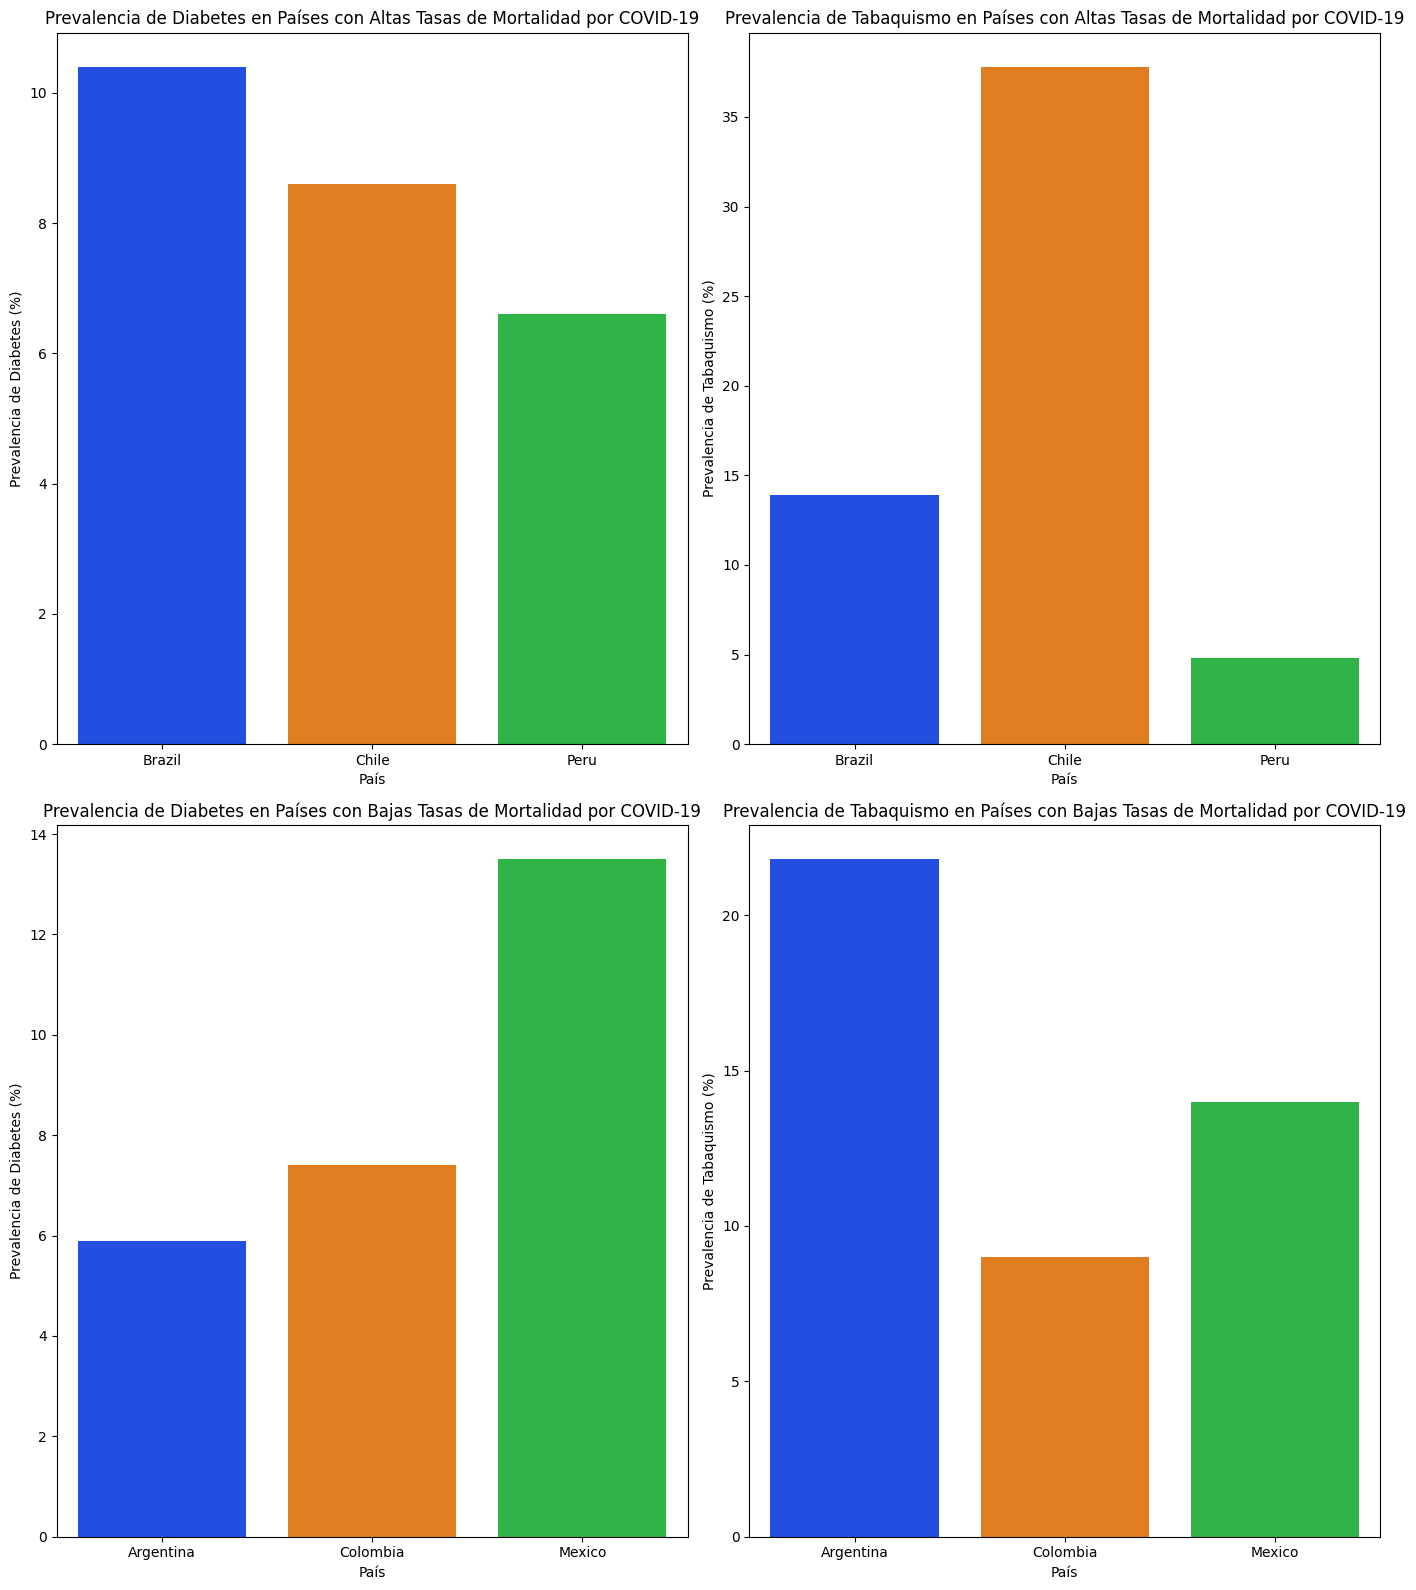

In [ ]:
# Identificar los países con mayor y menor mortalidad agrupando los datos por país. Calcula el porcentaje de mortalidad máximo para cada país y selecciona los 3 países con el porcentaje más alto y los 3 con el porcentaje más bajo.
paises_mayor_cantidad_muertes = data_latinoamerica_paises.groupby('country_name')['porcentaje_mortalidad'].max().nlargest(3).index
paises_menor_cantidad_muertes = data_latinoamerica_paises.groupby('country_name')['porcentaje_mortalidad'].max().nsmallest(3).index

# Filtramos el DataFrame original para obtener los registros correspondientes a los países con mayor y menor mortalidad.
condiciones_mayor_data = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(paises_mayor_cantidad_muertes)]
condiciones_menor_data = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(paises_menor_cantidad_muertes)]

# creamos la figura con dos columnas y dos filas
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
    ncols=2,
    nrows=2,
    figsize=(14, 16)
)

# Prevalencia de diabetes en top
sns.barplot(data=condiciones_mayor_data, x='country_name', y='diabetes_prevalence', hue='country_name', ax=ax1)
ax1.set_xlabel('País')
ax1.set_ylabel('Prevalencia de Diabetes (%)')
ax1.set_title('Prevalencia de Diabetes en Países con Altas Tasas de Mortalidad por COVID-19')

# Prevalencia de fumar en top
sns.barplot(data=condiciones_mayor_data, x='country_name', y='smoking_prevalence', hue='country_name', ax=ax2)
ax2.set_xlabel('País')
ax2.set_ylabel('Prevalencia de Tabaquismo (%)')
ax2.set_title('Prevalencia de Tabaquismo en Países con Altas Tasas de Mortalidad por COVID-19')

# Prevalencia de diabetes en top
sns.barplot(data=condiciones_menor_data, x='country_name', y='diabetes_prevalence', hue='country_name', ax=ax3)
ax3.set_xlabel('País')
ax3.set_ylabel('Prevalencia de Diabetes (%)')
ax3.set_title('Prevalencia de Diabetes en Países con Bajas Tasas de Mortalidad por COVID-19')

# Prevalencia de fumar en top
sns.barplot(data=condiciones_menor_data, x='country_name', y='smoking_prevalence', hue='country_name', ax=ax4)
ax4.set_xlabel('País')
ax4.set_ylabel('Prevalencia de Tabaquismo (%)')
ax4.set_title('Prevalencia de Tabaquismo en Países con Bajas Tasas de Mortalidad por COVID-19')

plt.tight_layout()

plt.show()

Los datos analizados revelan una clara correlación entre la prevalencia de diabetes y tabaquismo y las altas tasas de mortalidad por COVID-19 en varios países de América Latina. Esta evidencia representa una oportunidad estratégica para Biogenesys. Al desarrollar y comercializar soluciones terapéuticas y preventivas dirigidas a estas enfermedades crónicas, la compañía puede posicionarse como un líder en la atención de pacientes con mayor riesgo de complicaciones por COVID-19 y otras enfermedades infecciosas.

## FATALIDAD POR PAIS

In [ ]:
data_latinoamerica_paises['tasa_fatalidad'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed'] # Otro indice de fatalidad posible. Muertos sobre contagiados.
tasa_fatalidad = data_latinoamerica_paises.groupby('country_name')['tasa_fatalidad'].last().sort_values()
tasa_fatalidad

country_name
Mexico       0.008053
Chile        0.013313
Argentina    0.013388
Brazil       0.019821
Colombia     0.022478
Peru         0.052372
Name: tasa_fatalidad, dtype: float64

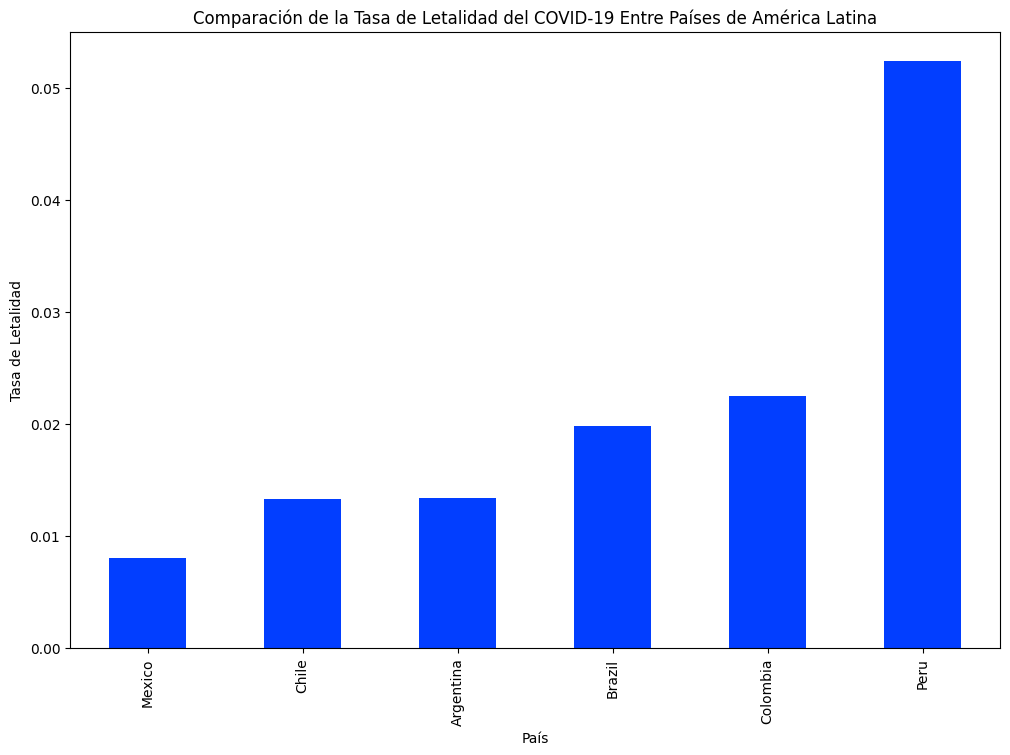

In [ ]:
data_latinoamerica_paises['tasa_fatalidad'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed']
tasa_fatalidad = data_latinoamerica_paises.groupby('country_name')['tasa_fatalidad'].last().sort_values()


plt.figure(figsize=(12, 8))
tasa_fatalidad.plot(kind='bar')
plt.xlabel('País')
plt.ylabel('Tasa de Letalidad')
plt.title('Comparación de la Tasa de Letalidad del COVID-19 Entre Países de América Latina')
plt.show()

Perú presenta la tasa de letalidad más alta. Esto indica que un mayor porcentaje de personas infectadas en Perú fallecieron a causa del virus.

Existe una considerable variabilidad en las tasas de letalidad entre los países. Mientras que Perú presenta la tasa más alta, México presenta la más baja.

A simple vista, podemos observar que Brasil, Colombia y Perú presentan tasas de letalidad superiores al promedio del grupo, mientras que México, Chile y Argentina muestran tasas inferiores.

## ¿Cómo evolucionó la mortalidad?

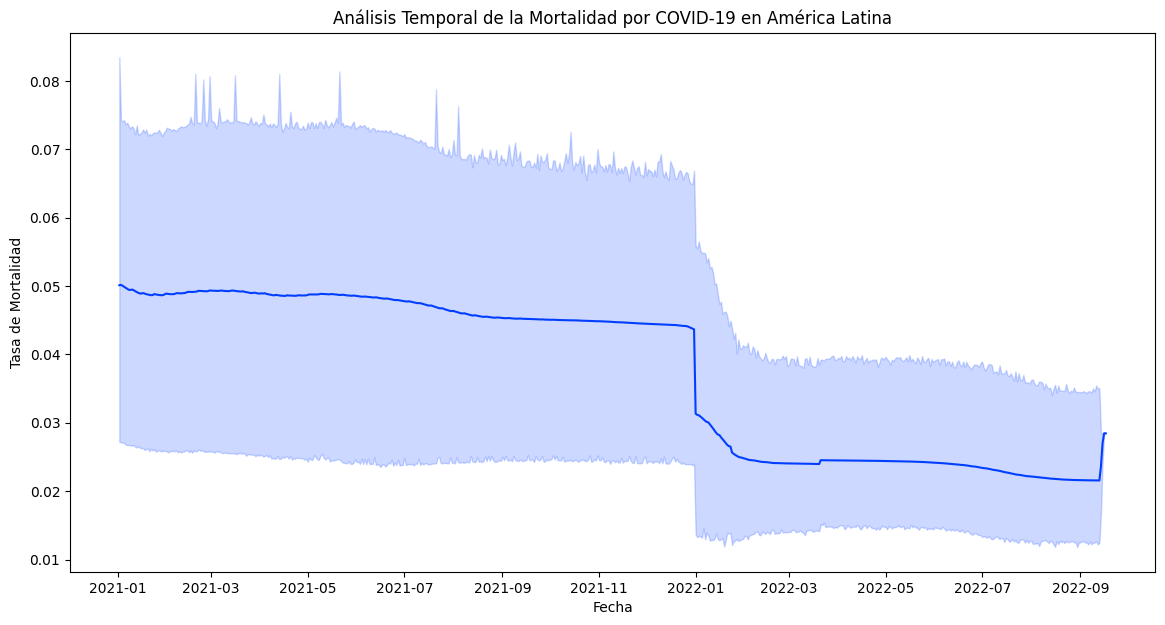

In [ ]:
# Divide el número acumulado de fallecidos entre el número acumulado de casos confirmados para cada fecha, creando una nueva columna 'tasa_mortalidad'.

data_latinoamerica_filtrada ['tasa_mortalidad'] = data_latinoamerica_filtrada['cumulative_deceased'] / data_latinoamerica_filtrada['cumulative_confirmed']

plt.figure(figsize=(14, 7))
sns.lineplot(
    data=data_latinoamerica_filtrada,
    x='date',
    y='tasa_mortalidad',
    estimator='mean'
)
#estimator='mean' muestra la tendencia promedio de la tasa de mortalidad a lo largo del tiempo, suavizando las fluctuaciones diarias y permitiendo identificar patrones más generales.

plt.title('Análisis Temporal de la Mortalidad por COVID-19 en América Latina')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Mortalidad')
plt.show()

El gráfico de series temporales revela una tendencia general a la baja en la tasa de mortalidad por COVID-19 en América Latina, lo que indica que las medidas implementadas, especialmente las campañas de vacunación, han sido efectivas en reducir el impacto de la pandemia. Sin embargo, es evidente una considerable variabilidad entre países y a lo largo del tiempo, lo que sugiere que otros factores, además de la vacunación, han influido en la evolución de la enfermedad, ya sean las medidas de salud pública, características demográficas, variantes del virus, sistemas de salud y/o desigualdades sociales.

In [ ]:
data_latinoamerica_filtrada ['active_cases'] = data_latinoamerica_filtrada ['cumulative_confirmed'] - data_latinoamerica_filtrada ['cumulative_deceased'] - data_latinoamerica_filtrada ['cumulative_recovered']

In [ ]:
situacion_actual = data_latinoamerica_filtrada.groupby('country_name')[['active_cases', 'cumulative_recovered', 'cumulative_deceased']].last().sort_values(by='active_cases')
situacion_actual

active_cases  cumulative_recovered  cumulative_deceased
country_name                                                         
Argentina     6.591245e+06                   0.0        193136.784045
Brazil        6.591245e+06                   0.0        193136.784045
Chile         6.591245e+06                   0.0        193136.784045
Colombia      6.591245e+06                   0.0        193136.784045
Mexico        6.591245e+06                   0.0        193136.784045
Peru          6.591245e+06                   0.0        193136.784045

In [ ]:
data_latinoamerica_filtrada [['country_name','active_cases', 'cumulative_recovered', 'cumulative_deceased']].loc[
    (data_latinoamerica_filtrada.index >= data_latinoamerica_filtrada.index.max())
]

country_name  active_cases  cumulative_recovered  \
date                                                          
2022-09-17    Argentina  6.591245e+06                   0.0   
2022-09-17       Brazil  6.591245e+06                   0.0   
2022-09-17        Chile  6.591245e+06                   0.0   
2022-09-17     Colombia  6.591245e+06                   0.0   
2022-09-17       Mexico  6.591245e+06                   0.0   
2022-09-17         Peru  6.591245e+06                   0.0   

            cumulative_deceased  
date                             
2022-09-17        193136.784045  
2022-09-17        193136.784045  
2022-09-17        193136.784045  
2022-09-17        193136.784045  
2022-09-17        193136.784045  
2022-09-17        193136.784045

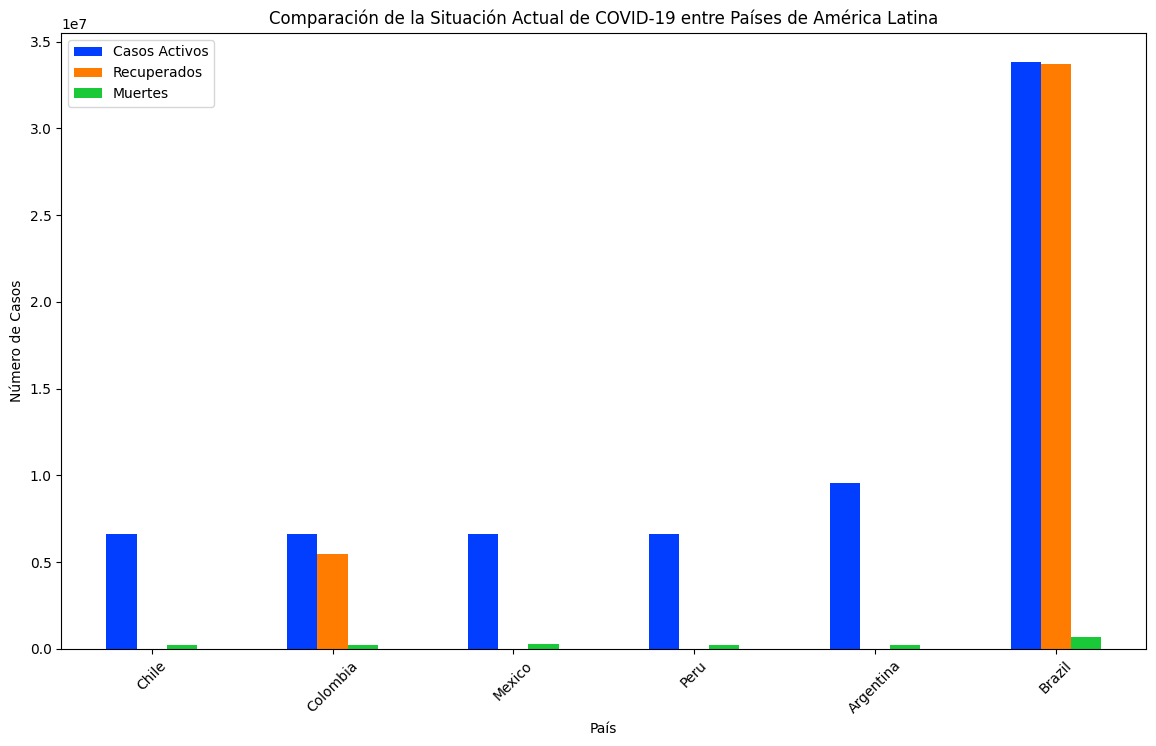

In [ ]:
# No se tienen dato pero hay datos de recuperados y muertes en algunos paises
situacion_actual = data_latinoamerica_filtrada.groupby('country_name')[['active_cases', 'cumulative_recovered', 'cumulative_deceased']].max().sort_values(by="active_cases")
situacion_actual.plot(kind='bar', stacked=False, figsize=(14, 8))
plt.title('Comparación de la Situación Actual de COVID-19 entre Países de América Latina')
plt.xlabel('País')
plt.ylabel('Número de Casos')
plt.legend(['Casos Activos', 'Recuperados', 'Muertes'])
plt.xticks(rotation=45)
plt.show()

Los datos de este gráfico podrían no reflejar la realidad de la situación epidemiológica en América Latina debido a la naturaleza dinámica de la pandemia y a las limitaciones en la recopilación de datos.

In [ ]:
# guardo el archivo para trabajarlo localmente
output_path = '/content/drive/My Drive/Proyecto_Integrador_4/data_latinoamerica_paises.csv'

# Guardar el DataFrame filtrado como un nuevo archivo CSV
data_latinoamerica_paises.to_csv(output_path, index=False)

print(f"Archivo guardado en: {output_path}")


Archivo guardado en: /content/drive/My Drive/Proyecto_Integrador_4/data_latinoamerica_paises.csv
